#### Dans notre jeu de données chaque individu présente les variables suivantes:

- <span style="color: purple;">Age</span>: Age of the gym member. 
- <span style="color: purple;">Gender</span>: Gender of the gym member (Male or Female).
- <span style="color: purple;">Weight (kg)</span>: Member’s weight in kilograms.
- <span style="color: purple;">Height (m)</span>: Member’s height in meters.
- <span style="color: purple;">Max_BPM</span>: Maximum heart rate (beats per minute) during workout sessions.
- <span style="color: purple;">Avg_BPM</span>: Average heart rate during workout sessions.
- <span style="color: purple;">Resting_BPM</span>: Heart rate at rest before workout.
- <span style="color: purple;">Session_Duration (hours)</span>: Duration of each workout session in hours.
- <span style="color: purple;">Calories_Burned</span>: Total calories burned during each session.
- <span style="color: purple;">Workout_Type</span>: Type of workout performed (e.g., Cardio, Strength, Yoga, HIIT).
- <span style="color: purple;">Fat_Percentage</span>: Body fat percentage of the member.
- <span style="color: purple;">Water_Intake (liters)</span>: Daily water intake during workouts.
- <span style="color: purple;">Workout_Frequency (days/week)</span>: Number of workout sessions per week.
- <span style="color: purple;">Experience_Level</span>: Level of experience, from beginner (1) to expert (3).
- <span style="color: purple;">BMI</span>: Body Mass Index, calculated from height and weight.


In [1]:
library(ggplot2)
library(tidyverse)
library(gridExtra)
library(GGally)
library(plotly)
library(corrplot)
library(reshape2)
library(MASS)
library(FactoMineR)
library(factoextra)
library(glmnet) 
library(ggfortify)
library(pROC)
library(ROCR)
library(gplots)
library(graphics)
library(scales)
library(dplyr)
library(patchwork)
library(Metrics)
library(rpart)
library(rpart.plot)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ lubridate 1.9.4     ✔ tibble    3.2.1
✔ purrr     1.0.2     ✔ tidyr     1.3.1
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attachement du package : ‘gridExtra’


L'objet suivant est masqué depuis ‘package:dplyr’:

    combine


Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2


Attachement du package : ‘plotly’


L'objet suivant est masqué depuis ‘package:ggplot2’:

    last_plot


L'objet suivant est masqué depuis ‘package:stats’:

    filter


L'objet suivant est masqué depuis ‘package:graphics’:

    layout


corrplot 0.95 loaded


Attachement du package : ‘reshape2’


L'objet sui

# Préparation de la Base

## Nature des variables

In [2]:

path <- ""
Gym <- read.table(paste(path, "Donnees_projet.csv", sep = ""),
                    sep = ",", header = TRUE)

Gym[,"Gender"]<- as.factor(Gym[,"Gender"])
Gym[,"Workout_Type"]<-as.factor(Gym[,"Workout_Type"])
Gym[,"Workout_Frequency"]<-as.factor(Gym[,"Workout_Frequency..days.week."])
Gym[,"Experience_Level"]<-as.factor(Gym[,"Experience_Level"])
Gym[,"Session_Duration"]<-Gym[,"Session_Duration..hours."]
Gym[,"Water_Intake"]<-Gym[,"Water_Intake..liters."]

Gym<-Gym[, c(1:7, 9:11,14:18)]

head(Gym)
summary(Gym)

Age Gender Weight..kg. Height..m. Max_BPM Avg_BPM Resting_BPM Calories_Burned
1 56  Male   88.3        1.71       180     157     60          1313           
2 46  Female 74.9        1.53       179     151     66           883           
3 32  Female 68.1        1.66       167     122     54           677           
4 25  Male   53.2        1.70       190     164     56           532           
5 38  Male   46.1        1.79       188     158     68           556           
6 56  Female 58.0        1.68       168     156     74          1116           
  Workout_Type Fat_Percentage Experience_Level BMI   Workout_Frequency
1 Yoga         12.6           3                30.20 4                
2 HIIT         33.9           2                32.00 4                
3 Cardio       33.4           2                24.71 4                
4 Strength     28.8           1                18.41 3                
5 Strength     29.2           1                14.39 3                
6 HIIT         15.5           3                20.55 5                
  Session_Duration Water_Intake
1 1.69             3.5         
2 1.30             2.1         
3 1.11             2.3         
4 0.59             2.1         
5 0.64             2.8         
6 1.59             2.7

      Age           Gender     Weight..kg.       Height..m.       Max_BPM     
 Min.   :18.00   Female:462   Min.   : 40.00   Min.   :1.500   Min.   :160.0  
 1st Qu.:28.00   Male  :511   1st Qu.: 58.10   1st Qu.:1.620   1st Qu.:170.0  
 Median :40.00                Median : 70.00   Median :1.710   Median :180.0  
 Mean   :38.68                Mean   : 73.85   Mean   :1.723   Mean   :179.9  
 3rd Qu.:49.00                3rd Qu.: 86.00   3rd Qu.:1.800   3rd Qu.:190.0  
 Max.   :59.00                Max.   :129.90   Max.   :2.000   Max.   :199.0  
    Avg_BPM       Resting_BPM    Calories_Burned    Workout_Type
 Min.   :120.0   Min.   :50.00   Min.   : 303.0   Cardio  :255  
 1st Qu.:131.0   1st Qu.:56.00   1st Qu.: 720.0   HIIT    :221  
 Median :143.0   Median :62.00   Median : 893.0   Strength:258  
 Mean   :143.8   Mean   :62.22   Mean   : 905.4   Yoga    :239  
 3rd Qu.:156.0   3rd Qu.:68.00   3rd Qu.:1076.0                 
 Max.   :169.0   Max.   :74.00   Max.   :1783.0          

Dans ce jeu de données on observe 11 variables quantitatives et 4 variables qualitatives. Pour traiter les données correctement nous avons passé les données qualitatives en facteur et nous avons renommé les colonnes dont le nom était trop long ou pas assez intuitif. 

## Analyse unidimensionnelle des variables

Warning message:
“The dot-dot notation (`..density..`) was deprecated in ggplot2 3.4.0.
ℹ Please use `after_stat(density)` instead.”
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


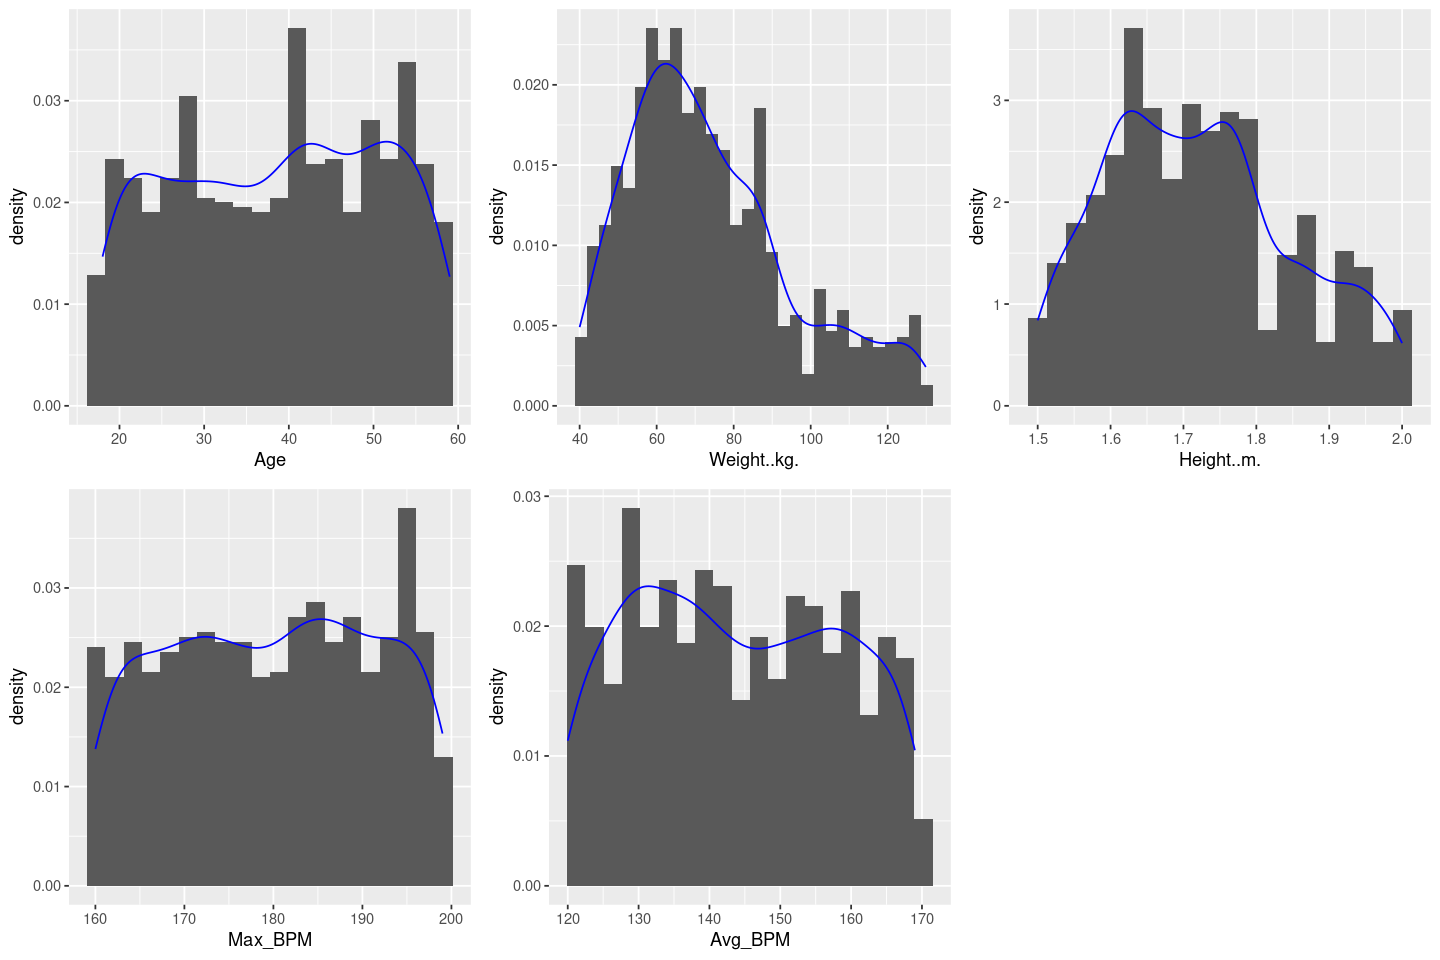

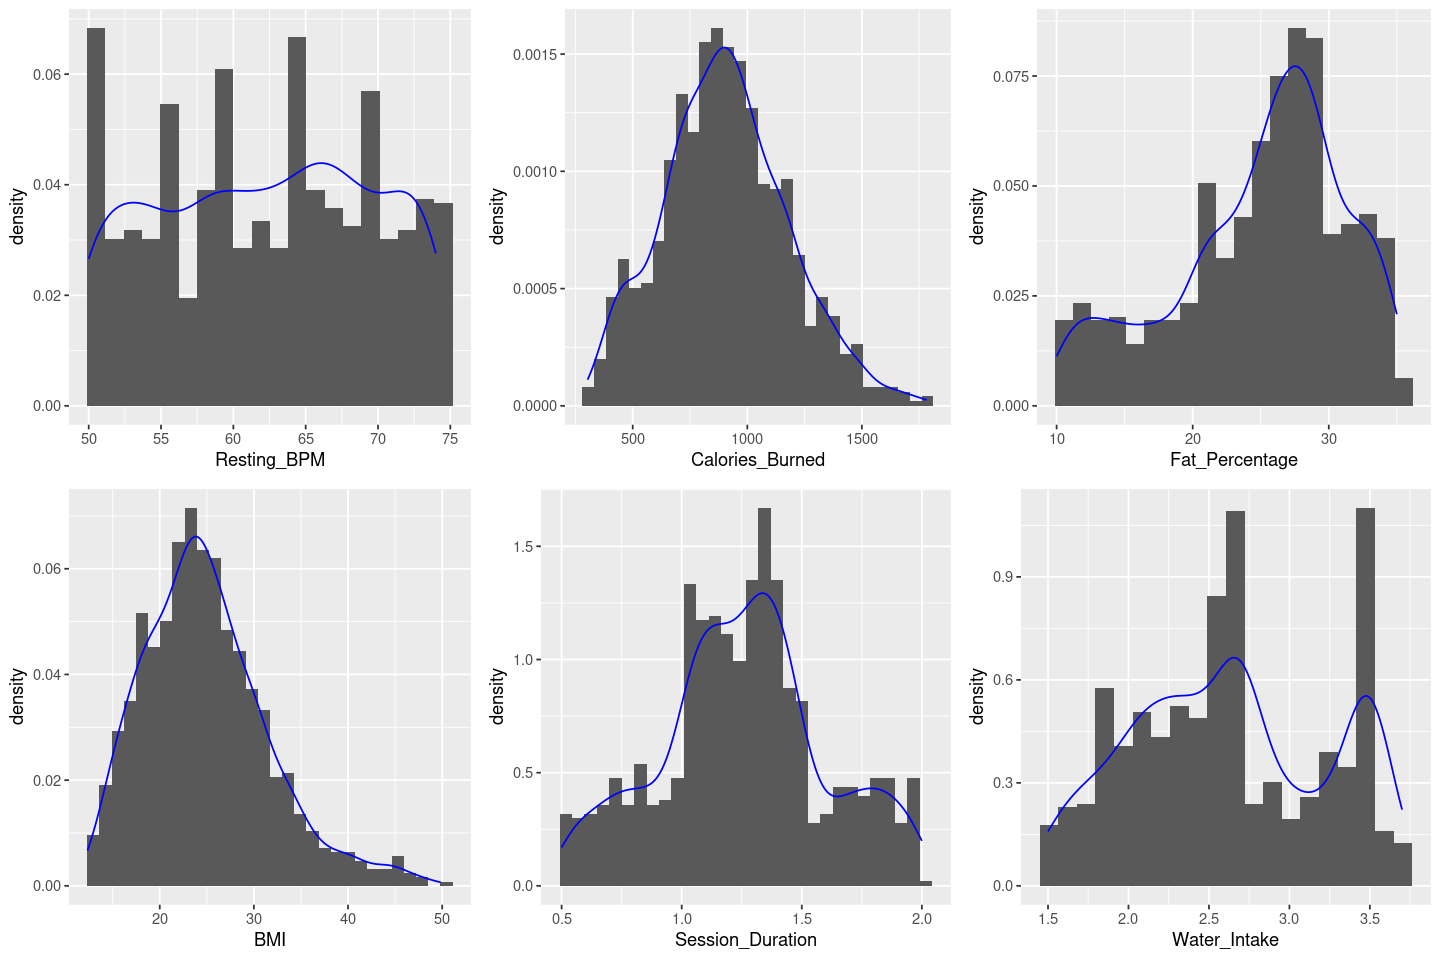

In [3]:
g1<-ggplot(Gym,aes(x=Age))+geom_histogram(aes(y=..density..),bins=20)+geom_density(alpha=.2, col="blue")
g2<-ggplot(Gym,aes(x=Weight..kg.))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue")
g3<-ggplot(Gym,aes(x=Height..m.))+geom_histogram(aes(y=..density..),bins=20)+geom_density(alpha=.2, col="blue") 
g4<-ggplot(Gym,aes(x=Max_BPM))+geom_histogram(aes(y=..density..),bins=20)+geom_density(alpha=.2, col="blue") 
g5<-ggplot(Gym,aes(x=Avg_BPM))+geom_histogram(aes(y=..density..),bins=20)+geom_density(alpha=.2, col="blue") 
g6<-ggplot(Gym,aes(x=Resting_BPM))+geom_histogram(aes(y=..density..),bins=20)+geom_density(alpha=.2, col="blue") 
g7<-ggplot(Gym,aes(x=Calories_Burned))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue") 
g8<-ggplot(Gym,aes(x=Fat_Percentage))+geom_histogram(aes(y=..density..),bins=20)+geom_density(alpha=.2, col="blue")
g9<-ggplot(Gym,aes(x=BMI))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue")
g10<-ggplot(Gym,aes(x=Session_Duration))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue")
g11<-ggplot(Gym,aes(x=Water_Intake))+geom_histogram(aes(y=..density..),bins=20)+geom_density(alpha=.2, col="blue")

options(repr.plot.width = 12, repr.plot.height = 8)
grid.arrange(g1,g2,g3,g4,g5,ncol=3)
grid.arrange(g6,g7,g8,g9,g10,g11,ncol=3)
rm(g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11)

Ici, nous analysons la distribution des variables numériques du jeu de données Gym. Pour cela, nous avons généré des histogrammes avec superposition de courbes de densité . Ces visualisations permettent d’examiner la forme de chaque distribution (normalité, asymétrie, présence de modes, etc.) ainsi que d’identifier d’éventuelles anomalies ou valeurs extrêmes. Nous avons testé plusieurs types de transformations sur différentes variables :
- Transformation logarithmique (si les données sont fortement asymétriques).
- Transformation racine carrée (si les données ne sont pas aussi étendues).
- Transformation Box-Cox (pour rechercher automatiquement la meilleure transformation).
- Transformation de puissance inverse (si tu veux réduire l'impact des grandes valeurs). 
- Transformation quantile.

Au vu des données nous avons décidé de transformer la variable "BMI" par une racine carrée pour étendre la plage de données.


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


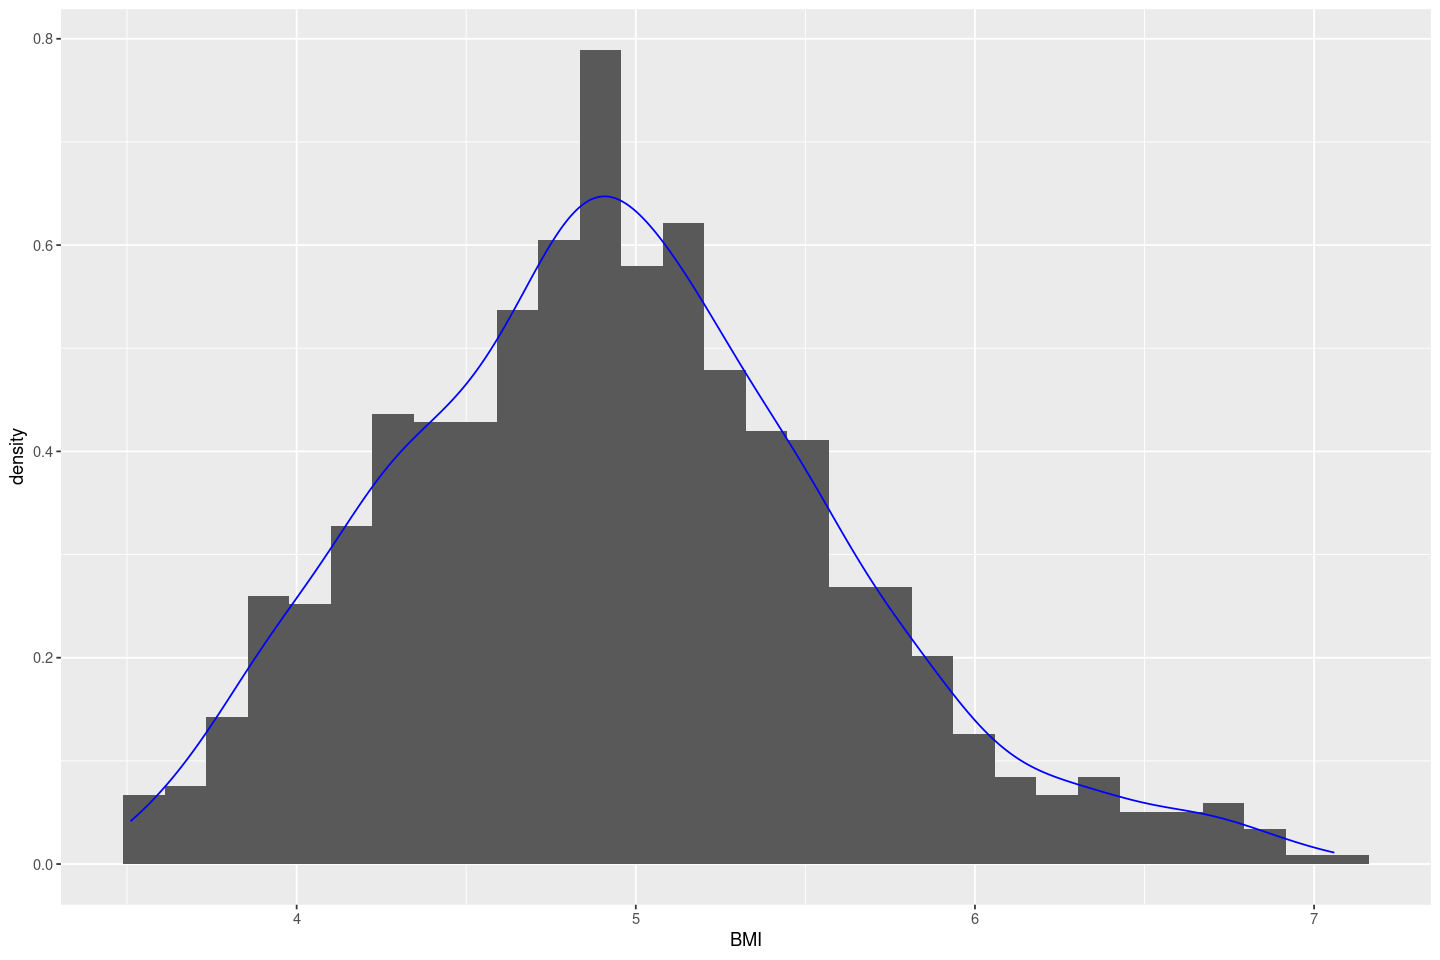

In [4]:
Gym[,"BMI"]<-sqrt(Gym[,"BMI"])

g9b<-ggplot(Gym,aes(x=BMI))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue")

grid.arrange(g9b,ncol=1)

En essayant des transformations des variables quantitatives on se rend compte qu'elles ne sont pas forcément pertinentes. Il faudrait se renseigner sur d'autres transformations pour des variables plus complexes et distribuées moins uniformément.

Pour mieux comprendre la composition de ce jeu de données nous allons représenter la distribution de toutes les modalités des variables qualitatives afin de mieux cerner de quels types d'individus est composée la base de données. 

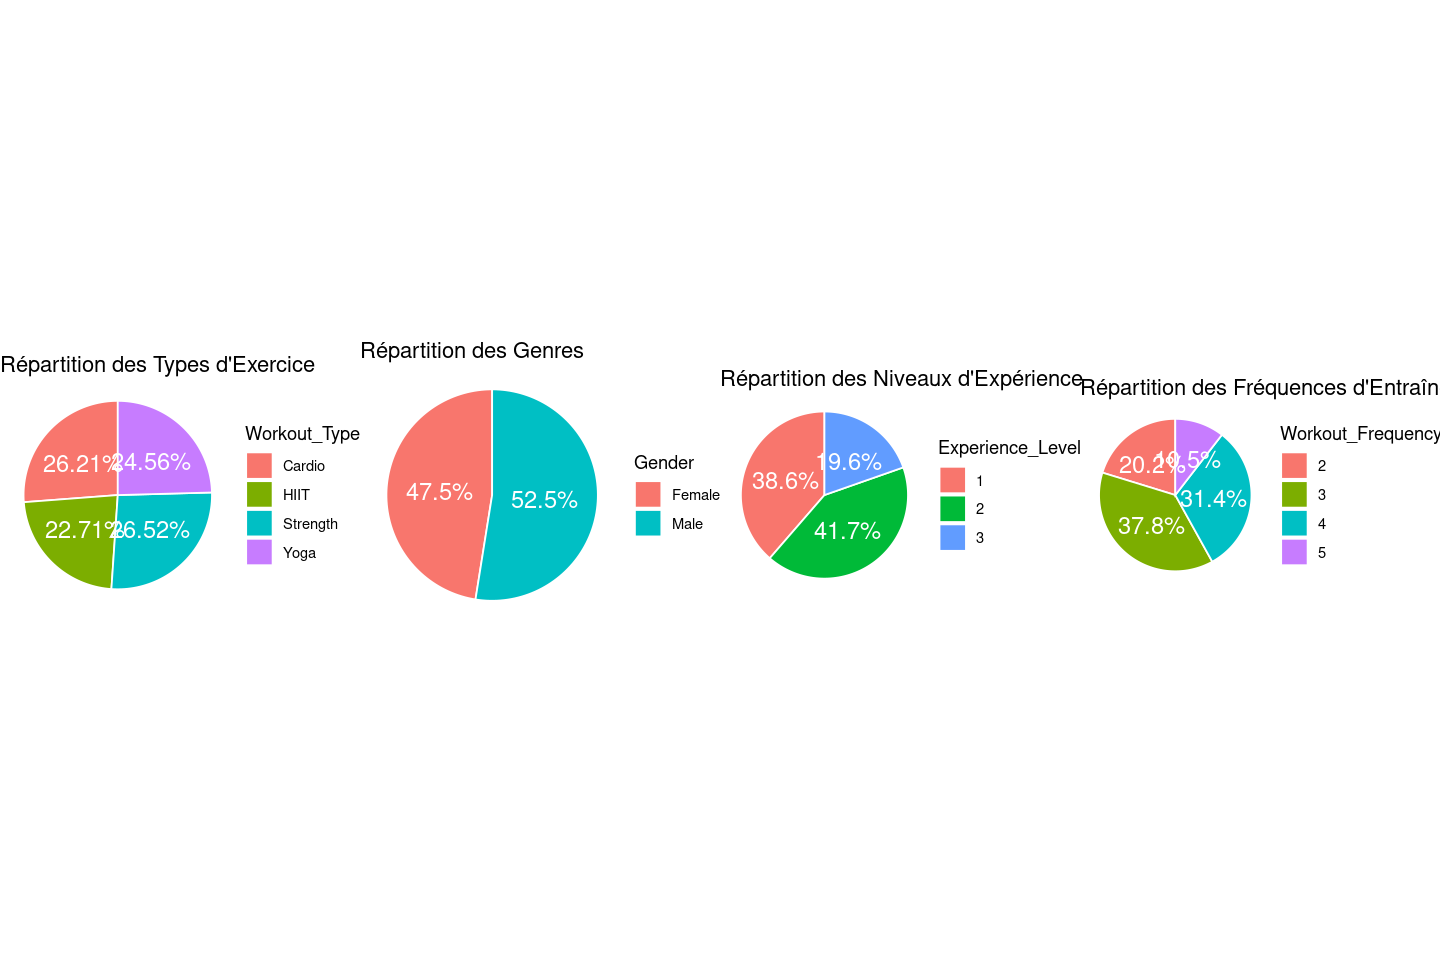

In [5]:
g1 <- ggplot(Gym, aes(x = "", fill = Workout_Type)) + geom_bar( width = 1, color="white") + coord_polar(theta = "y") +
  labs(title = "Répartition des Types d'Exercice") + geom_text(stat= "count", aes(label= percent(..count../sum(..count..))), position = position_stack(vjust = 0.5), color="white", size =5) + 
  theme_void()

g2 <- ggplot(Gym, aes(x = "", fill = Gender)) + geom_bar( width = 1, color="white") + coord_polar(theta = "y") +
  labs(title = "Répartition des Genres") + geom_text(stat= "count", aes(label= percent(..count../sum(..count..))), position = position_stack(vjust = 0.5), color="white", size =5) + 
  theme_void()

g3 <- ggplot(Gym, aes(x = "", fill = Experience_Level)) + geom_bar( width = 1, color="white") + coord_polar(theta = "y") +
  labs(title = "Répartition des Niveaux d'Expérience") + geom_text(stat= "count", aes(label= percent(..count../sum(..count..))), position = position_stack(vjust = 0.5), color="white", size =5) + 
  theme_void()

g4 <- ggplot(Gym, aes(x = "", fill = Workout_Frequency)) + geom_bar( width = 1, color="white") + coord_polar(theta = "y") +
  labs(title = "Répartition des Fréquences d'Entraînement") + geom_text(stat= "count", aes(label= percent(..count../sum(..count..))), position = position_stack(vjust = 0.5), color="white", size =5) + 
  theme_void()

grid.arrange(g1,g2,g3,g4,ncol=4)

On remarque donc que les types d'entraînement et le genre sont des variables plutôt équilibrées, chaque modalités est représentées de façon assez équivalente. Pour les autres variables qualitatives on remarque que les individus plus expérimentés et dont la durée d'entraînement est plus longue sont bien moins nombreux que les autres. 

## Analyse bidimensionnelle des variables
#### Corrélation

      Age           Gender     Weight..kg.       Height..m.       Max_BPM     
 Min.   :18.00   Female:462   Min.   : 40.00   Min.   :1.500   Min.   :160.0  
 1st Qu.:28.00   Male  :511   1st Qu.: 58.10   1st Qu.:1.620   1st Qu.:170.0  
 Median :40.00                Median : 70.00   Median :1.710   Median :180.0  
 Mean   :38.68                Mean   : 73.85   Mean   :1.723   Mean   :179.9  
 3rd Qu.:49.00                3rd Qu.: 86.00   3rd Qu.:1.800   3rd Qu.:190.0  
 Max.   :59.00                Max.   :129.90   Max.   :2.000   Max.   :199.0  
    Avg_BPM       Resting_BPM    Calories_Burned    Workout_Type
 Min.   :120.0   Min.   :50.00   Min.   : 303.0   Cardio  :255  
 1st Qu.:131.0   1st Qu.:56.00   1st Qu.: 720.0   HIIT    :221  
 Median :143.0   Median :62.00   Median : 893.0   Strength:258  
 Mean   :143.8   Mean   :62.22   Mean   : 905.4   Yoga    :239  
 3rd Qu.:156.0   3rd Qu.:68.00   3rd Qu.:1076.0                 
 Max.   :169.0   Max.   :74.00   Max.   :1783.0          

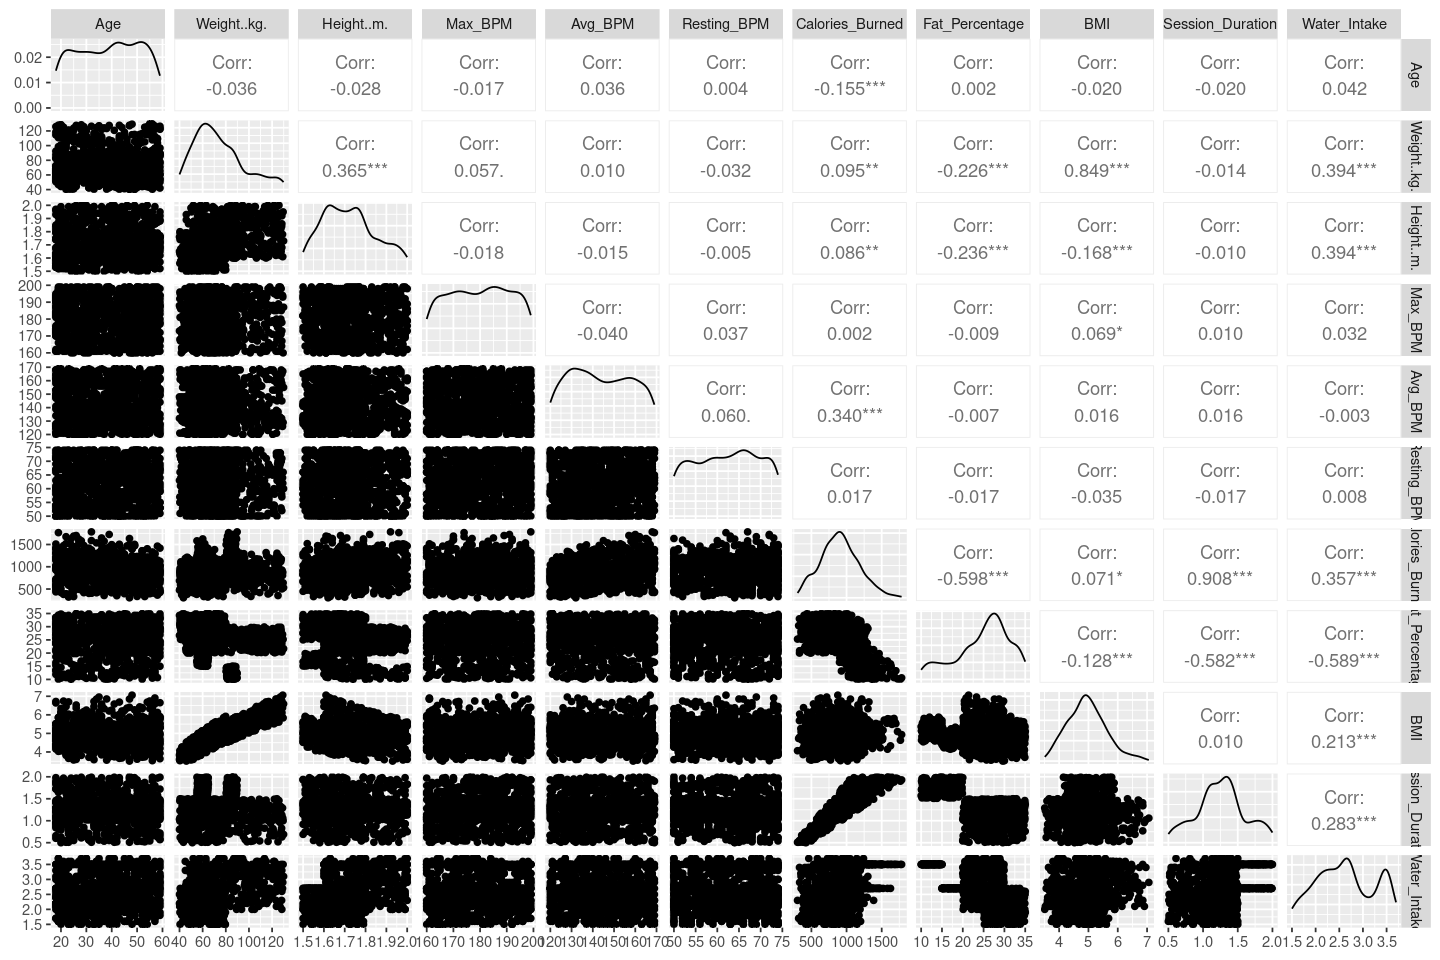

In [6]:
summary(Gym)
ggpairs(Gym[, c(1,3:8,10,12,14:15)])

On remarque facilement plusieurs corrélations linéaires très fortes, notamment entre le poids et l'IMC ( avec une corrélation de 0.852) et entre la durée de la session et les calories brulées (corrélation = 0.912) 
Ces liens s'établissent de façon évidentes par leur nature. 
D'un autre côté, on observe des comportements atypiques qui semblent établir des relations non linéaires entre les variables Durée de la séance et le pourcentage de masse graisseuse. ces deux variables semblent établir des seuils entre elles. 
Pour des variables comme Consommation d'eau on retrouve les pics observés dans les histogrammes précédents. 




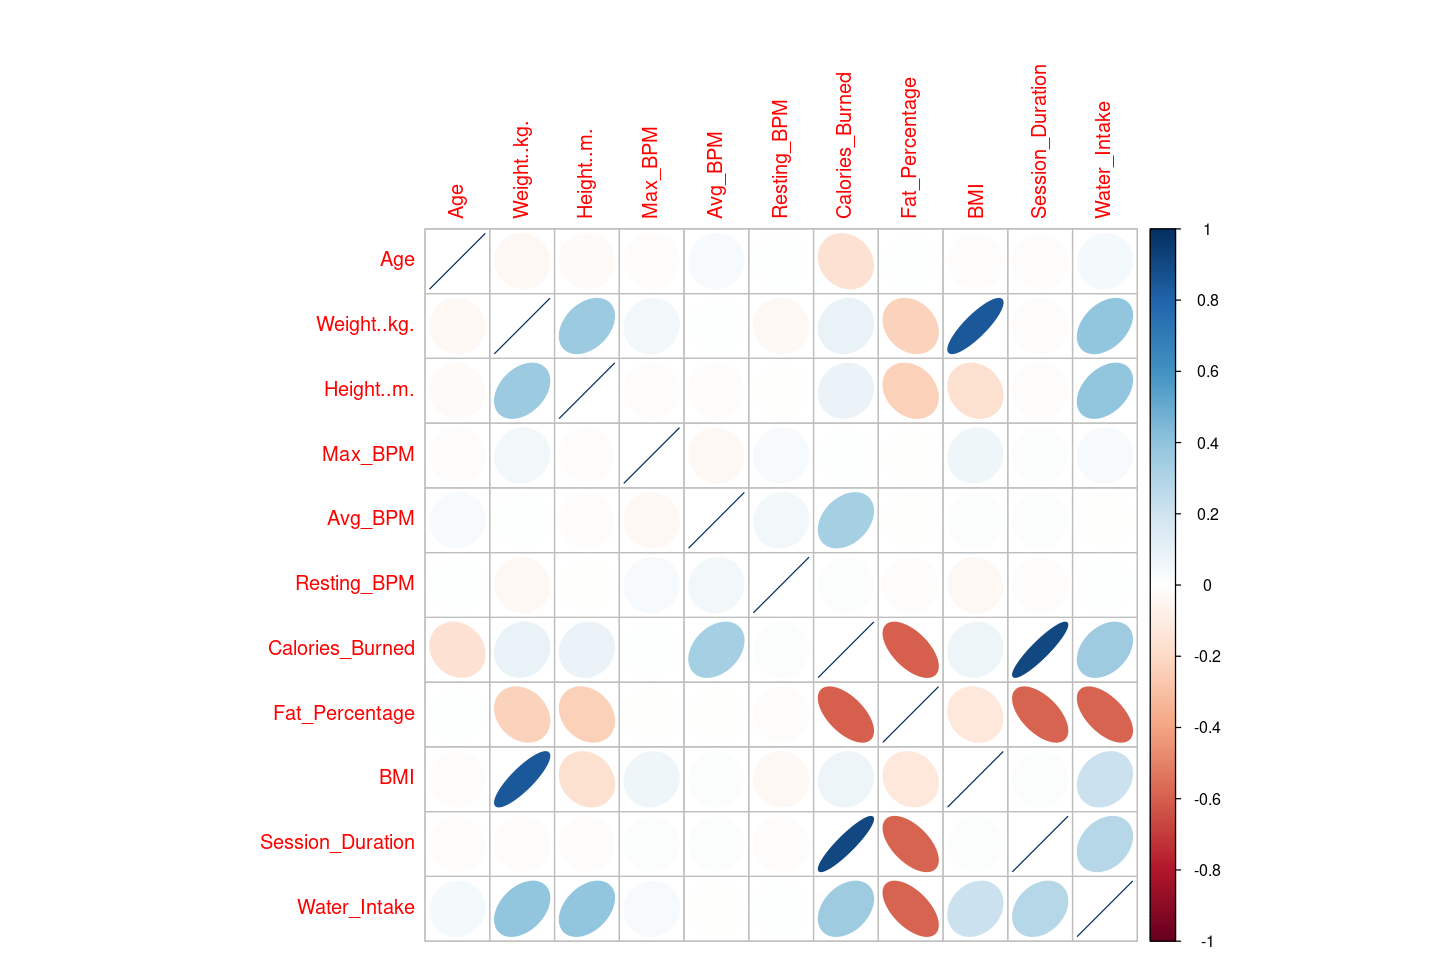

In [7]:
library(corrplot)
corrplot(cor(Gym[, c(1,3:8,10,12,14:15)]),method="ellipse")

On remarque plusieurs liens logiques qui confirment la cohérence des données. Par exemple, le poids (Weight_kg.) est fortement corrélé avec l’IMC (BMI), ce qui est normal puisque l’IMC dépend directement du poids et de la taille. On observe aussi une corrélation positive assez marquée entre la durée des séances (Session_Duration), les calories brûlées (Calories_Burned) et l’hydratation (Water_Intake), ce qui semble indiquer que plus une séance est longue, plus elle demande d’effort physique et donc d’énergie et d’eau.
À l’inverse, le taux de masse grasse (Fat_Percentage) est négativement corrélé avec la durée des sessions et les calories brûlées. Cela peut suggérer que les personnes avec un taux de masse grasse plus élevé ont tendance à s’entraîner moins longtemps ou de manière moins intense. D’autres variables comme l’âge ou les fréquences cardiaques (Max_BPM, Resting_BPM) montrent peu de corrélations fortes, ce qui signifie qu’elles pourraient avoir un rôle plus indépendant ou secondaire dans l’analyse.
En résumé, cette matrice met en évidence des relations intéressantes qui confirment l’intuition sur le comportement des variables. Elle permet aussi d’identifier des couples de variables fortement liées, ce qui pourra être utile pour la suite, notamment pour éviter des problèmes de redondance ou de multicolinéarité dans les modèles statistiques.

#### Quali/Quanti

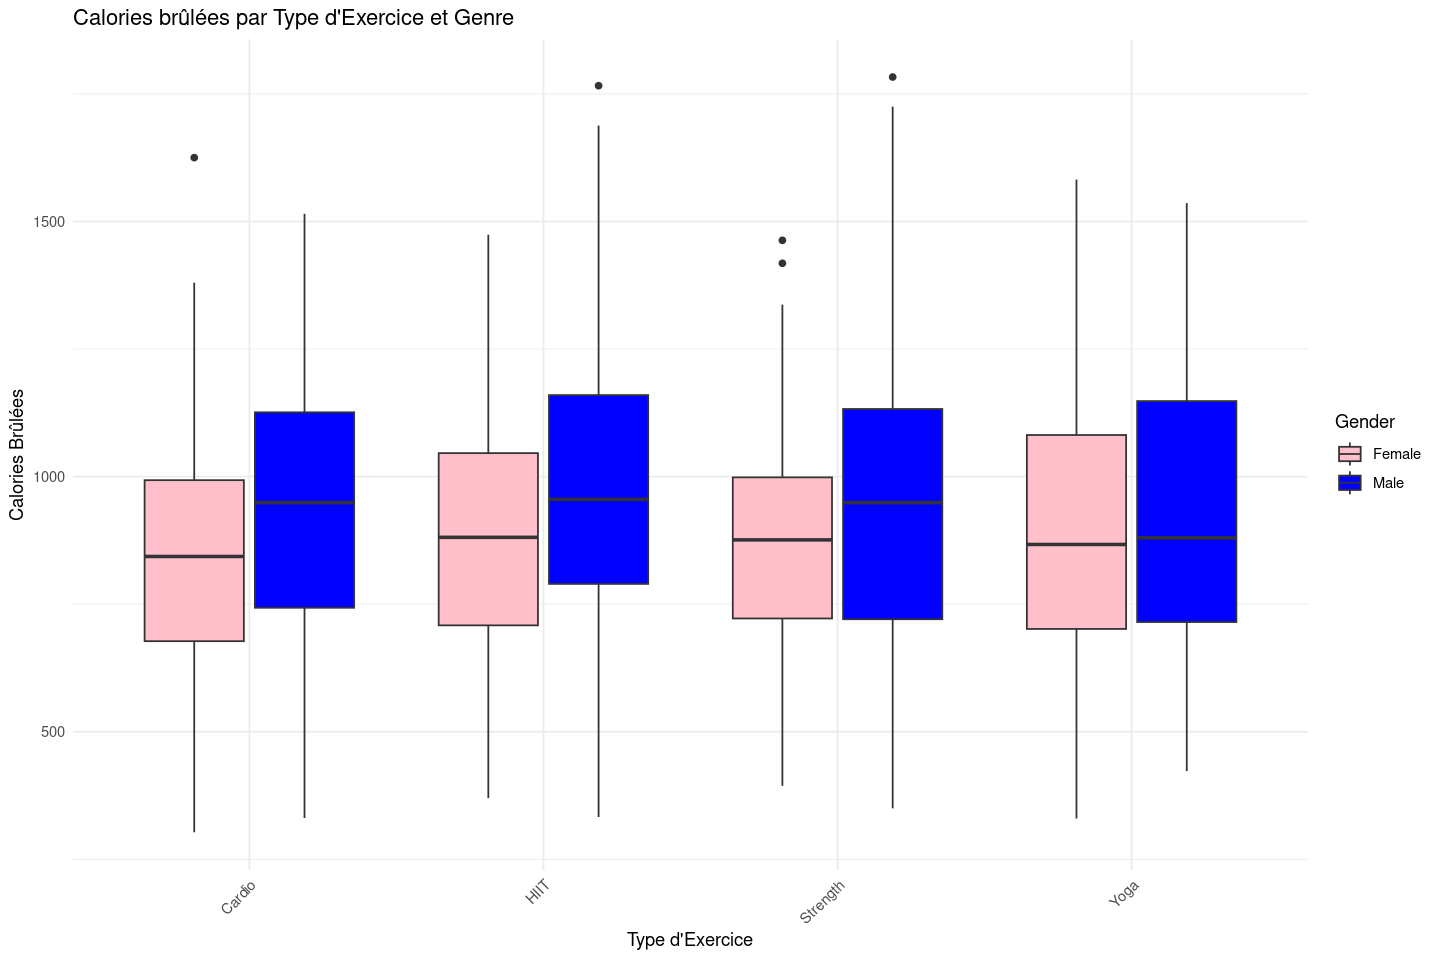

In [8]:
ggplot(Gym, aes(x = Workout_Type, y = Calories_Burned, fill = Gender)) +
  geom_boxplot() +
  labs(title = "Calories brûlées par Type d'Exercice et Genre",
       x = "Type d'Exercice",
       y = "Calories Brûlées") +
  theme_minimal() +
  scale_fill_manual(values = c("Male" = "blue", "Female" = "pink")) +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

Pour un même type d'entraînement, on remarque que les hommes dépensent en général plus de calories que les femmes. Il ressort aussi que, quel que soit le type d'exercice, les hommes brûlent en moyenne plus de calories que les femmes. Cela est visible par des médianes systématiquement plus élevées dans les boîtes bleues. Cette différence peut s'expliquer par des facteurs physiologiques tels que la masse musculaire généralement plus importante chez les hommes, influençant la dépense énergétique. L’exercice de type HIIT semble être le plus intense en termes de calories brûlées pour les deux genres, avec une médiane plus élevée et une dispersion relativement large, traduisant une variabilité interindividuelle importante. À l’inverse, le Yoga affiche la médiane la plus basse, bien que certains individus atteignent des niveaux de dépense calorique relativement élevés, notamment chez les hommes, comme le montrent les moustaches allongées.
Enfin, quelques valeurs extrêmes (outliers) sont visibles, en particulier pour le Cardio et le Strength, ce qui suggère que certaines séances peuvent entraîner une dépense énergétique bien supérieure à la moyenne, possiblement en raison d’intensités ou de durées particulières.

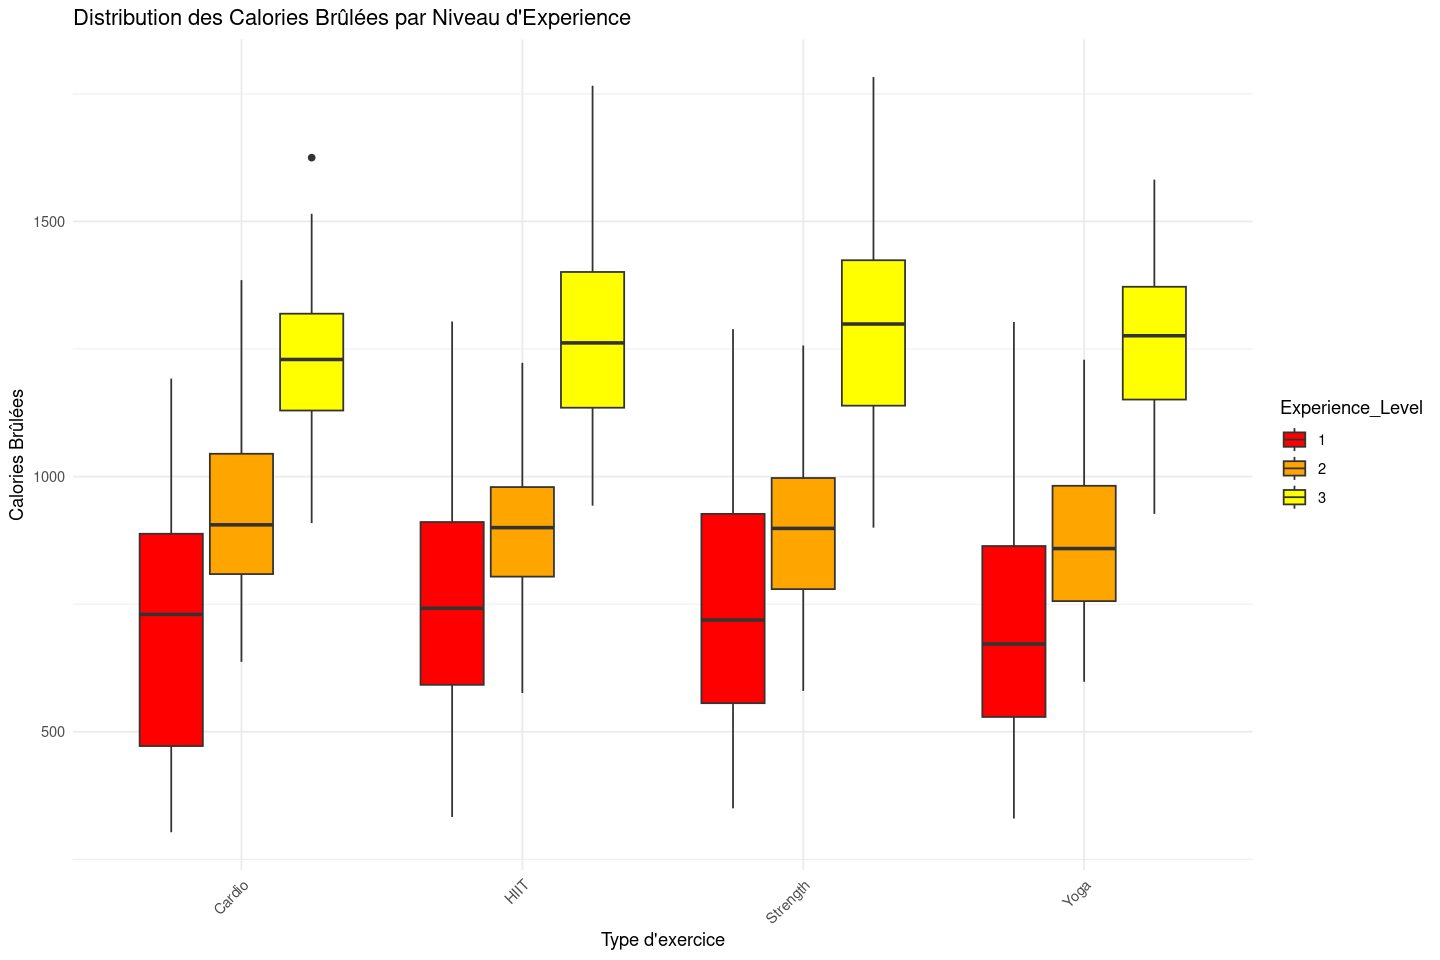

In [9]:
ggplot(Gym, aes(x = Workout_Type, y = Calories_Burned, fill = Experience_Level)) +
  geom_boxplot() +
  labs(title = "Distribution des Calories Brûlées par Niveau d'Experience",
       x = "Type d'exercice",
       y = "Calories Brûlées") +
  theme_minimal() +
  scale_fill_manual(values = c("1" = "red", "2" = "orange", "3"="yellow"))+
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

L’analyse met en évidence le fait que plus le niveau d’expérience est élevé, plus la dépense calorique augmente, et ce de manière cohérente à travers tous les types d’exercices. Quel que soit le type d’activité physique les individus du niveau 3 (avancé) brûlent systématiquement plus de calories que ceux des niveaux 2 (intermédiaire) et 1 (débutant). Cela s'explique par une meilleure maîtrise technique, une intensité plus soutenue, ou une capacité à maintenir l’effort plus longtemps chez les individus expérimentés. La musculation (Strength) et le HIIT sont les exercices où l’écart de performance calorique entre les niveaux est le plus marqué, ce qui laisse supposer que l’intensité et l’efficacité augmentent sensiblement avec l’expérience.
En conclusion, ce graphique montre une corrélation positive forte entre le niveau d'expérience et la dépense calorique, quel que soit le type d'exercice. On voit aussi l'importance de la progression dans la pratique pour améliorer l’efficacité des séances en termes de calories brûlées.

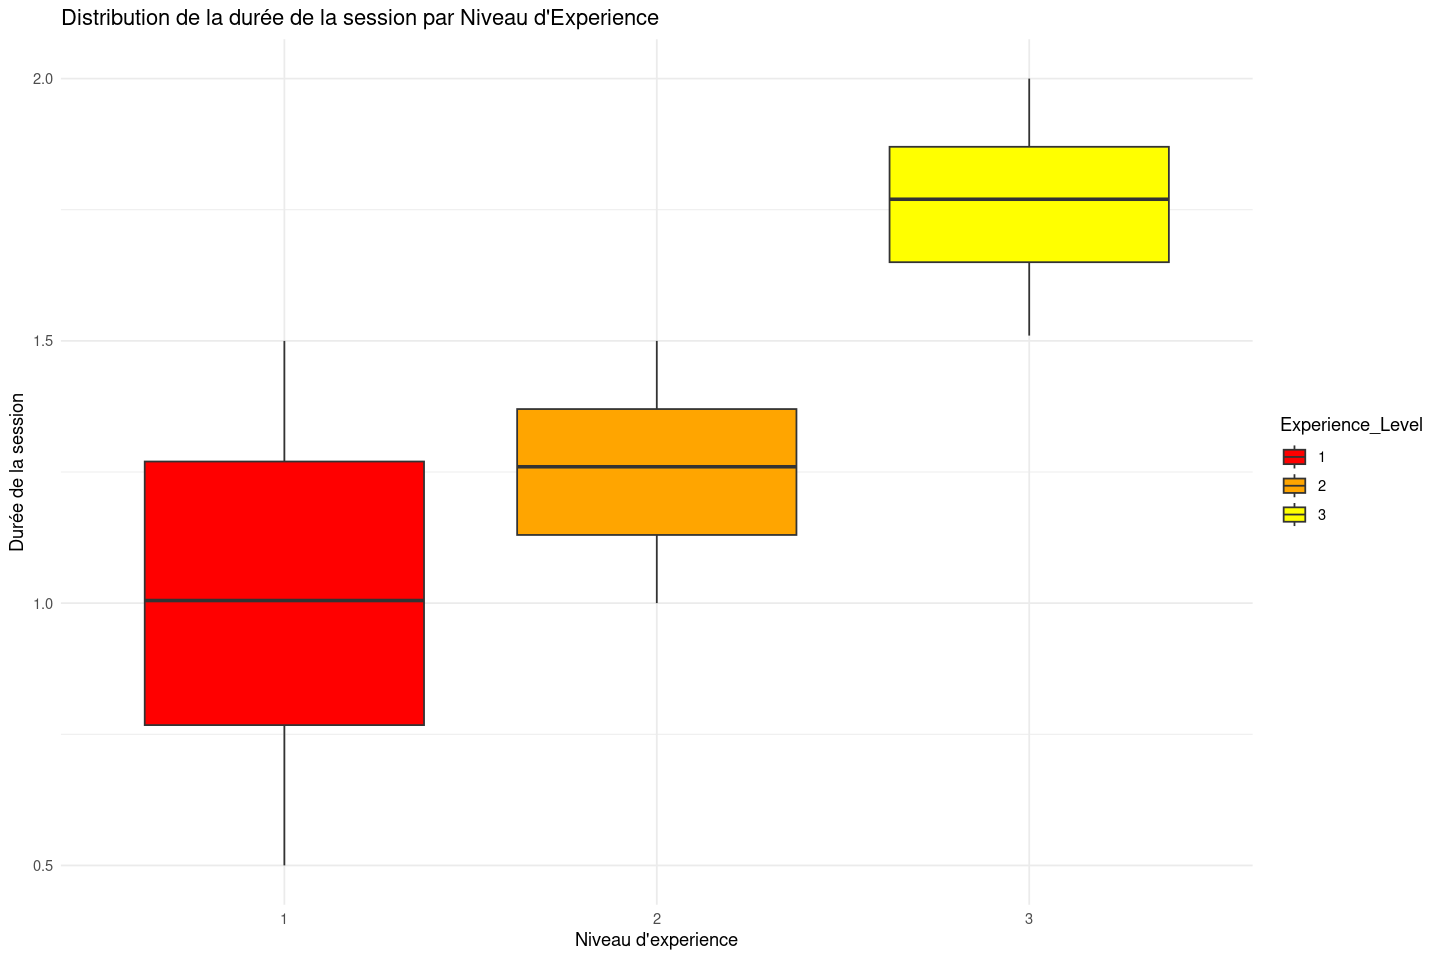

In [10]:
ggplot(Gym, aes(x = Experience_Level, y = Session_Duration, fill = Experience_Level)) +
  geom_boxplot() +
  labs(title = "Distribution de la durée de la session par Niveau d'Experience",
       x = "Niveau d'experience",
       y = "Durée de la session") +
  theme_minimal() +
  scale_fill_manual(values = c("1" = "red", "2" = "orange", "3"="yellow"))

On comprend de façon logique que les individus avec le plus d'expérience font des séances plus longues, c'est une première explication de pourquoi les plus expérimentés dépenssent plus de calories.

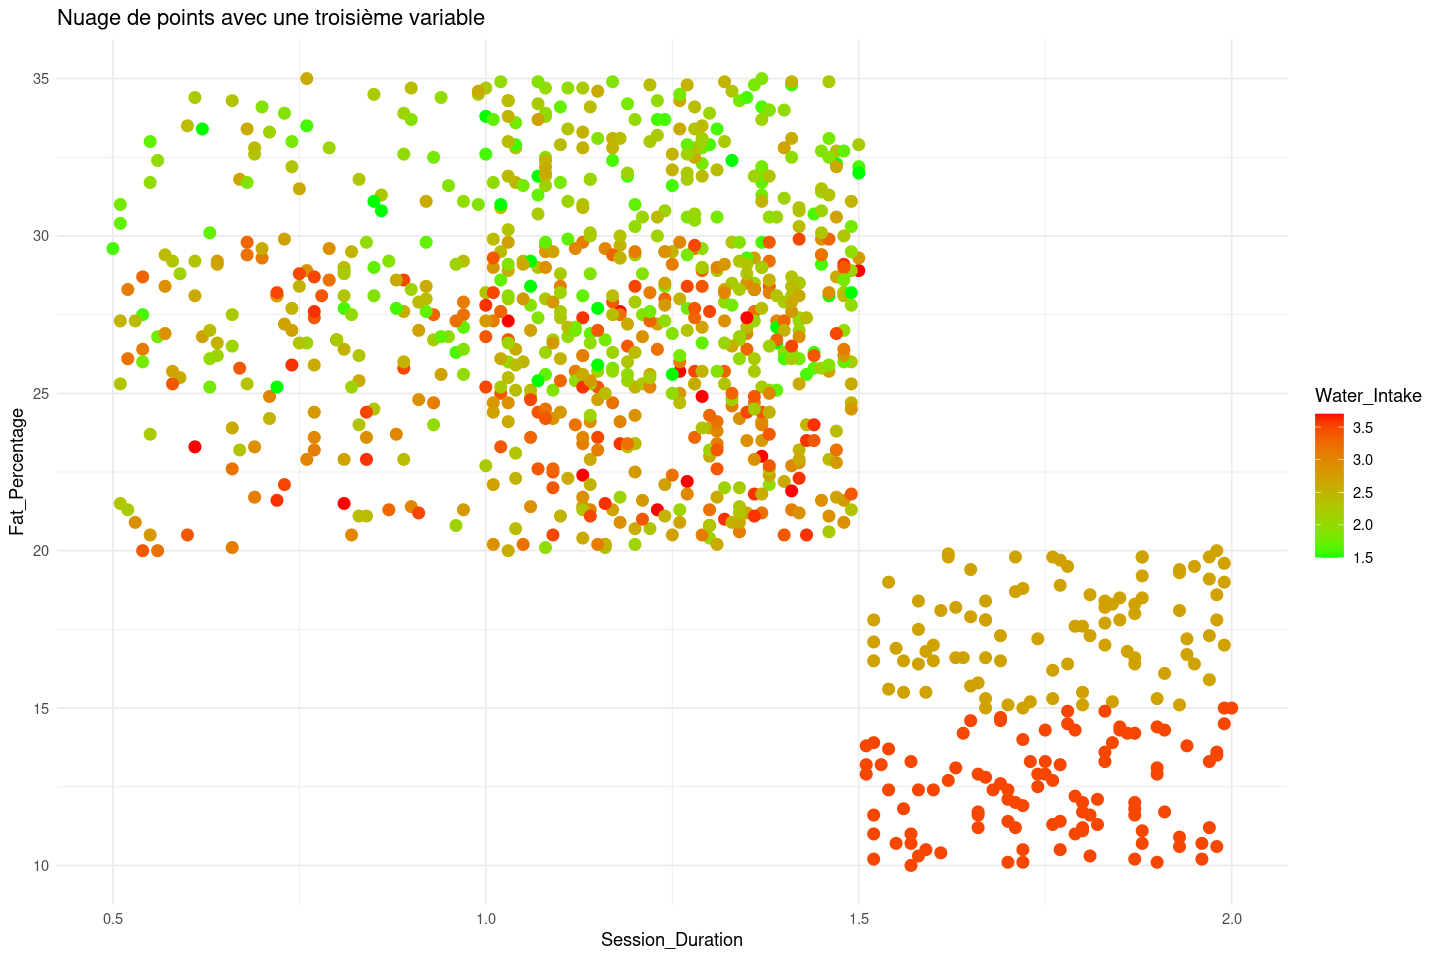

In [11]:
ggplot(Gym, aes(x=Session_Duration, y=Fat_Percentage, color=Water_Intake)) +
  geom_point(size=3) +  # Points colorés selon z
  scale_color_gradient(low="green", high="red") +  # Gradient de couleur
  labs(title="Nuage de points avec une troisième variable",
       x="Session_Duration", y="Fat_Percentage", color="Water_Intake") +
  theme_minimal()

Nous trouvons la présence d'un seuil assez étonnante mais cela peut-être lié à la manière dont les mesures ont été calculées. On a affiché les trois ensemble car elle présentent des corrélation négatives. Au vu de la répartion en seuil c'est encore une fois sûrement dû à la manières dont les données ont été collectées.

#### Quali/Quali

Warning message:
“... is ignored in group_split(<grouped_df>), please use group_by(..., .add =
TRUE) %>% group_split()”


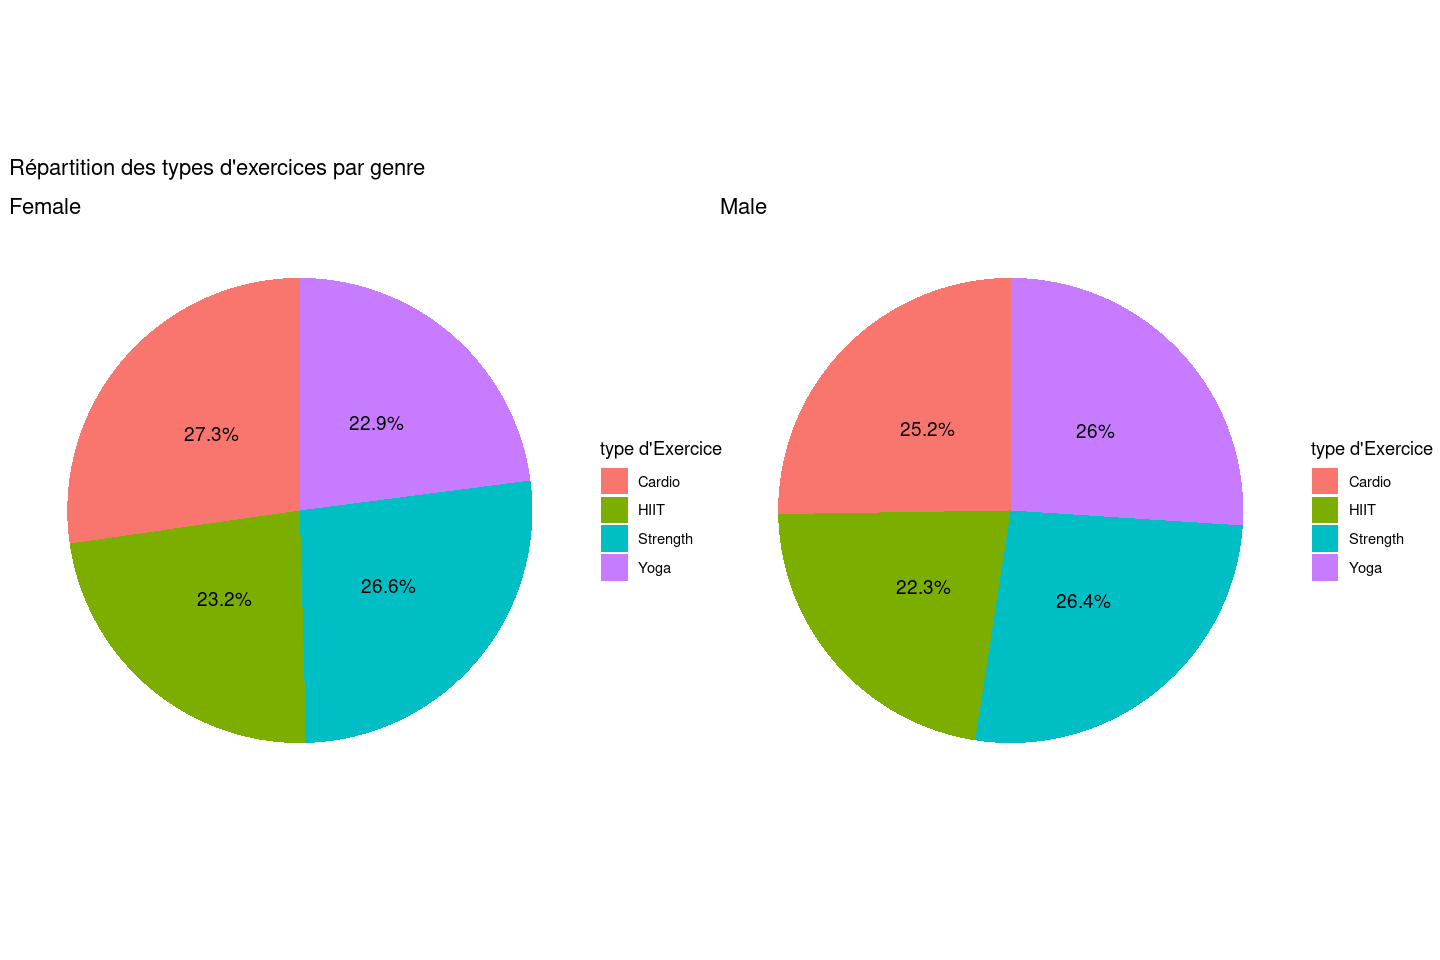

In [12]:
df_pie <- Gym %>%
  count(Gender, Workout_Type) %>%  # Compte les occurrences
  group_by(Gender, .add = TRUE) %>%
  mutate(Prop = n / sum(n), Label = paste0(round(Prop * 100, 1), "%"))

plot_pie <- function(Gym) {
  ggplot(Gym, aes(x = "", y = Prop, fill = Workout_Type)) +
    geom_bar(stat = "identity", width = 1) +
    coord_polar(theta = "y") +
    labs(title = unique(Gym$Gender), fill = "type d'Exercice") +
    theme_void() +
    theme(legend.position = "right") +
    geom_text(aes(label = Label), position = position_stack(vjust = 0.5), size = 4)
}

plots <- df_pie %>%
  group_split(Gender) %>%
  lapply(plot_pie)

wrap_plots(plots) + plot_annotation(title = "Répartition des types d'exercices par genre")

Warning message:
“... is ignored in group_split(<grouped_df>), please use group_by(..., .add =
TRUE) %>% group_split()”


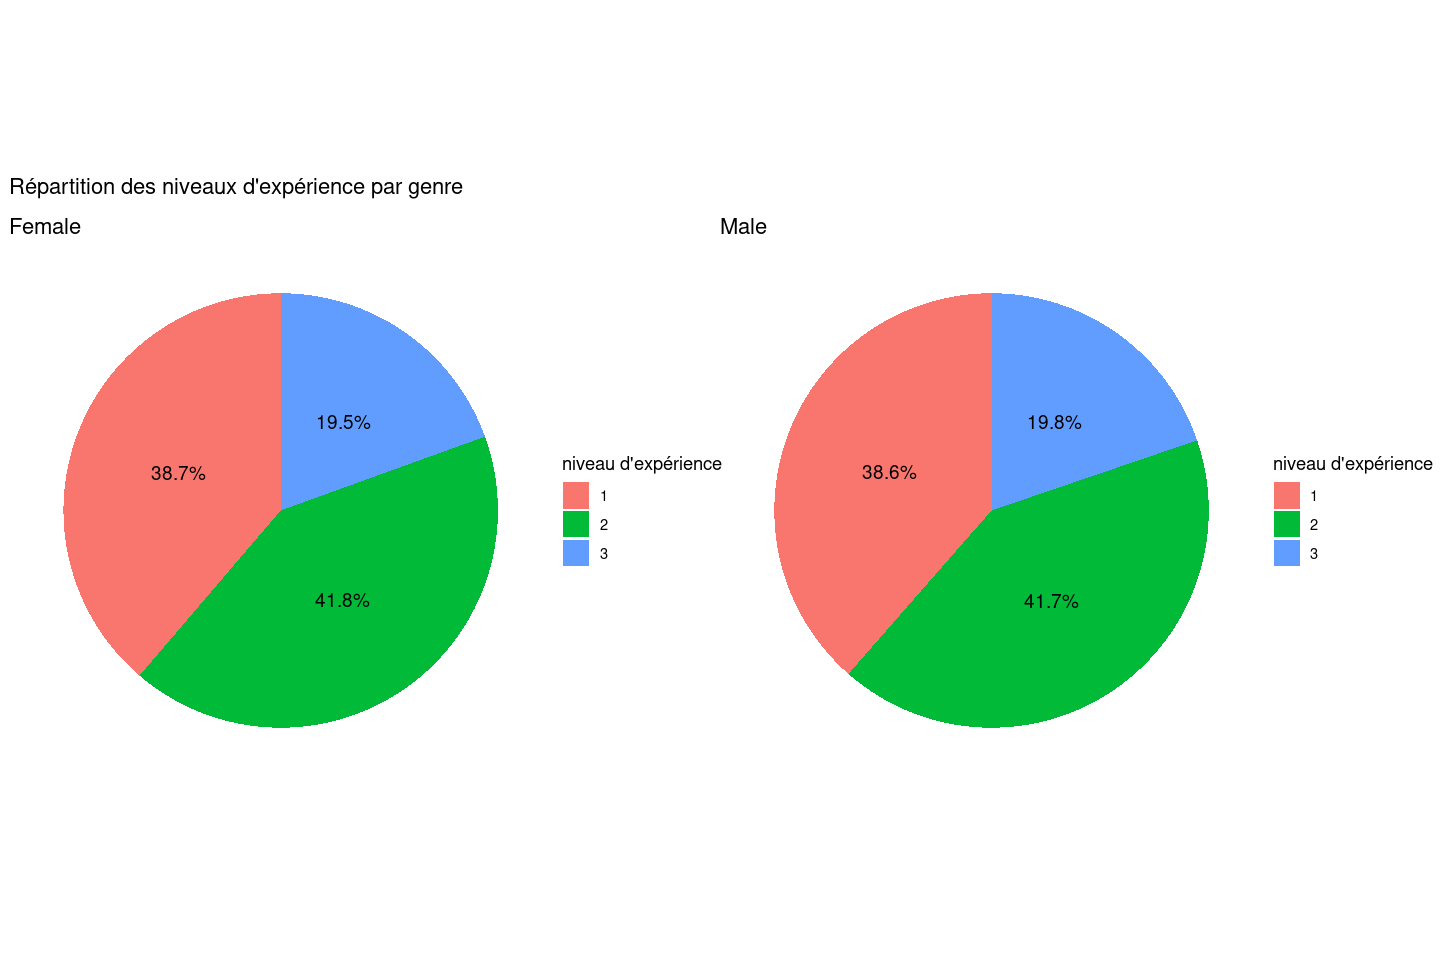

In [13]:
df_pie <- Gym %>%
  count(Gender, Experience_Level) %>%  # Compte les occurrences
  group_by(Gender, .add = TRUE) %>%
  mutate(Prop = n / sum(n), Label = paste0(round(Prop * 100, 1), "%"))

plot_pie <- function(Gym) {
  ggplot(Gym, aes(x = "", y = Prop, fill = Experience_Level)) +
    geom_bar(stat = "identity", width = 1) +
    coord_polar(theta = "y") +
    labs(title = unique(Gym$Gender), fill = "niveau d'expérience") +
    theme_void() +
    theme(legend.position = "right") +
    geom_text(aes(label = Label), position = position_stack(vjust = 0.5), size = 4)
}

plots <- df_pie %>%
  group_split(Gender) %>%
  lapply(plot_pie)

wrap_plots(plots) + plot_annotation(title = "Répartition des niveaux d'expérience par genre")

On voit que la répartition des niveaux d'expériences est similaire entre les hommes et les femmes. On ne peut donc pas expliquer la différence de calories brulées par une différence de niveau. On pourrait donc simplement suspecter une différence intrinsèque de métabolisme.

## Analyse en Composante Principale 

L'intérêt de cette analyse en composante principale est d'essayer de dégager des groupes d'individus similaires et de rassembler les variables corrrélées afin de réduire le nombre de dimensions.

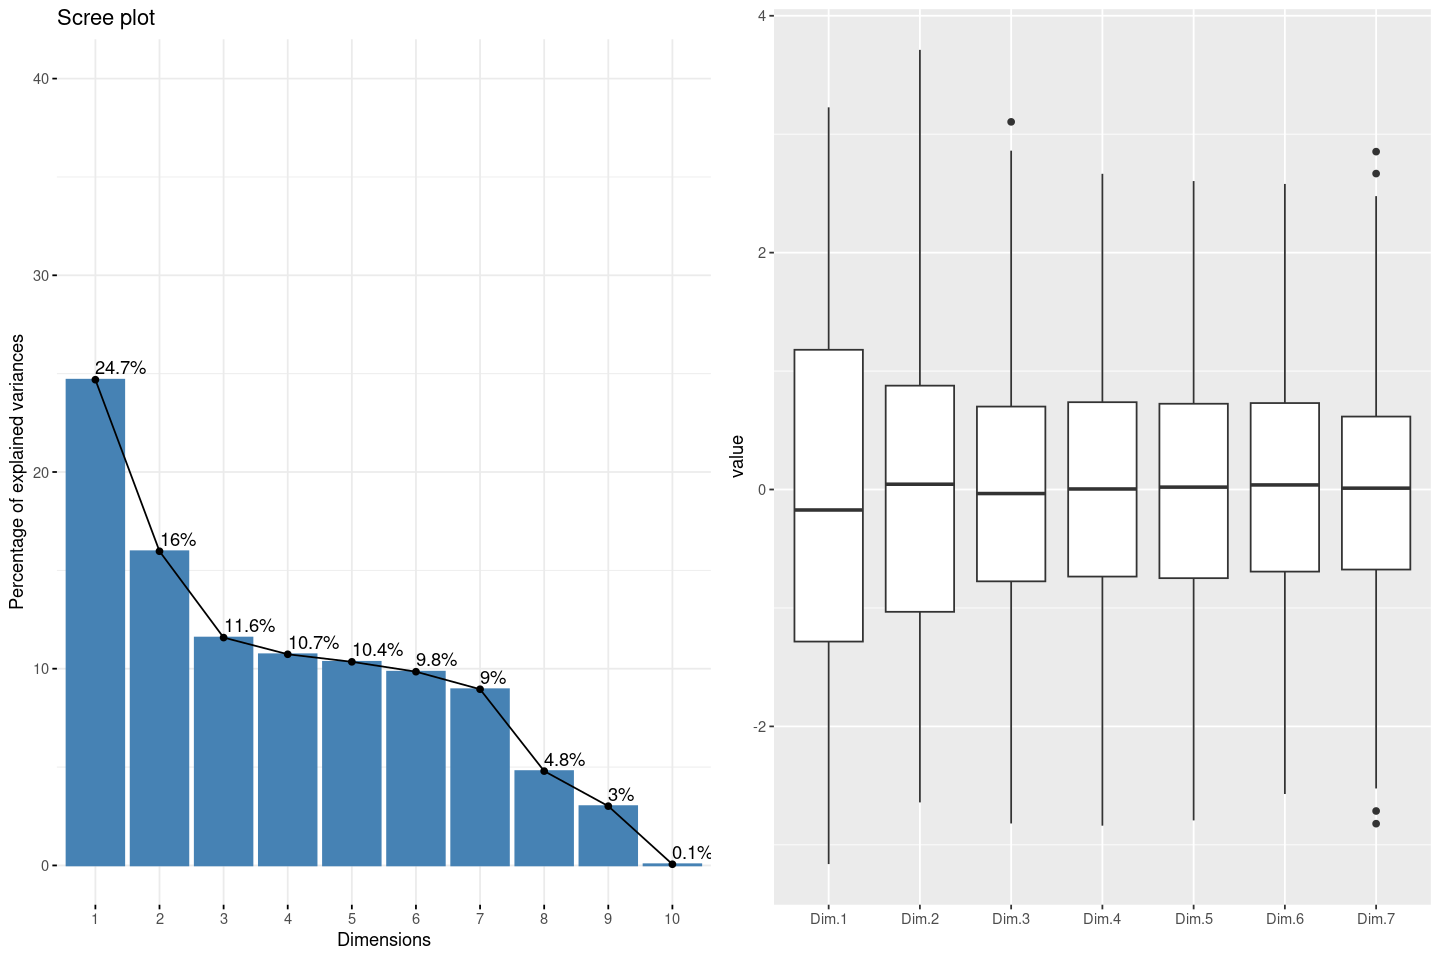

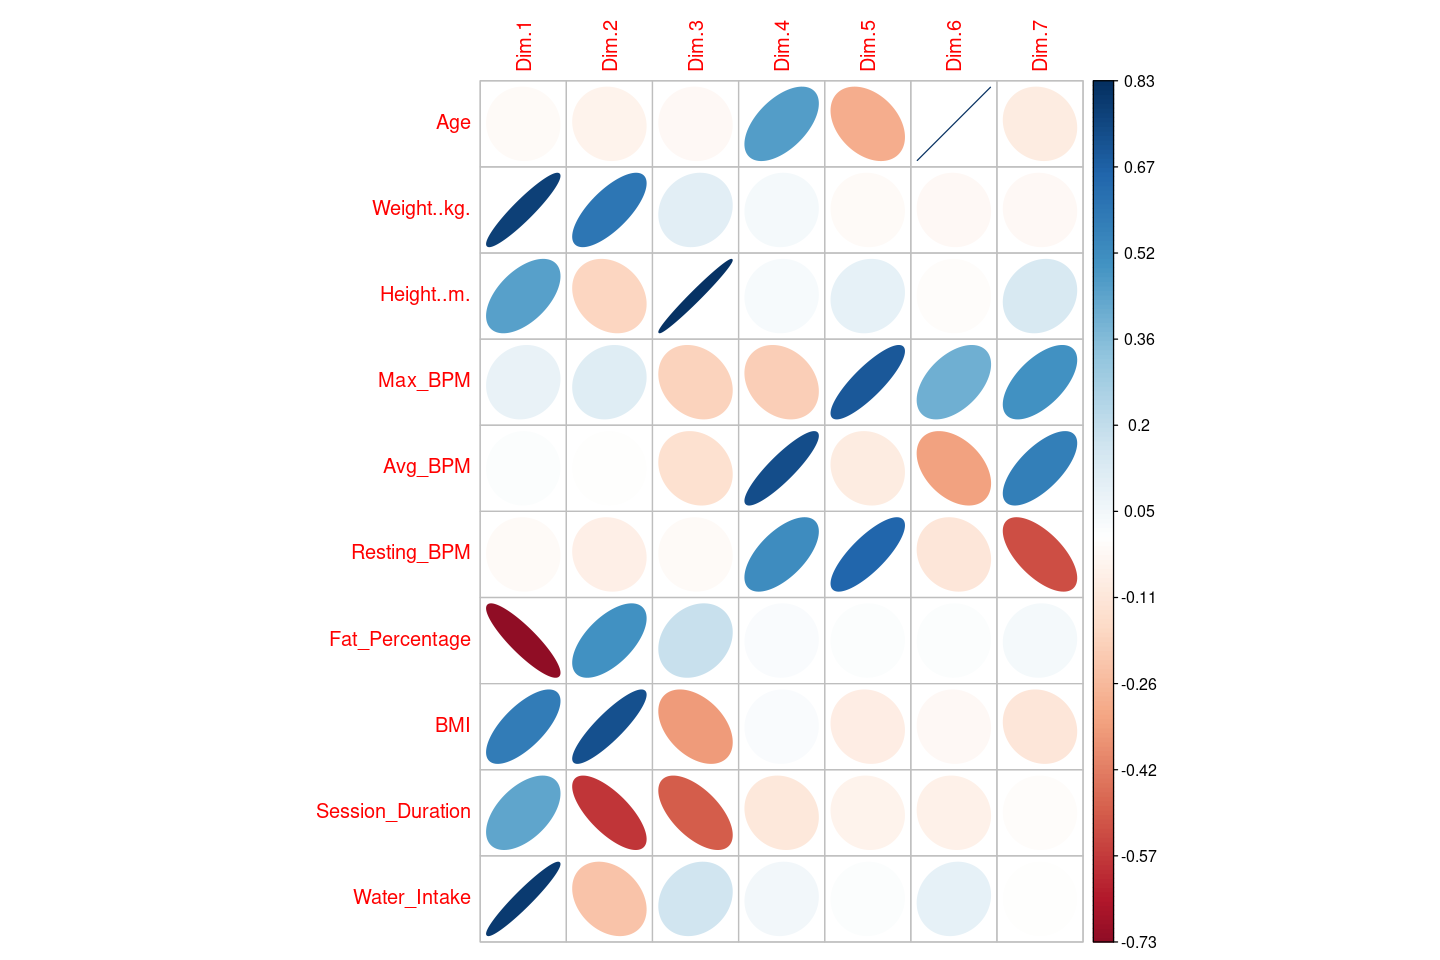

In [14]:
acp <- PCA(Gym[, c(1,3:8,10,12,14:15)], scale.unit = TRUE,
           graph = FALSE, quanti.sup = 7, ncp = 7)

g1<-fviz_eig(acp, addlabels = TRUE, ylim = c(0, 40))
library(reshape2)
g2<-ggplot(melt(acp$ind$coord),aes(x=Var2,y=value))+
  geom_boxplot()+
  xlab("")
grid.arrange(g1,g2,ncol=2)

corrplot(acp$var$cor, is.corr=FALSE,method="ellipse")

Par ces graphiques on veut évaluer la pertinence d'une Analyse en composantes principales. On voit ici que pour avoir une variance cumulée supérieure à 80% il nous faudrait 6 dimensions. Ne pouvant pas faire de représentation en 6 dimensions il va être compliqué de faire une ACP très pertinente. Pour commencer une analyse nous avons décider de présenter des graphiques sur les 3 premières dimensions mais il faut prendre en compte que les représentations ne représenteront que peu d'information. On peut également donner des pistes sur l'interprétation de chaque axe. Par exemple, on peut d'ores et déjà dire que la dimension 1 est très corrélée au poids, à la consommation d'eau et très négativement corrélée au poucentage de masse graisseuse.

In [15]:
acp <- PCA(Gym[, c(1,3:8,10,12,14:15)], scale.unit = TRUE,
           graph = FALSE, quanti.sup = 7, ncp = 6)

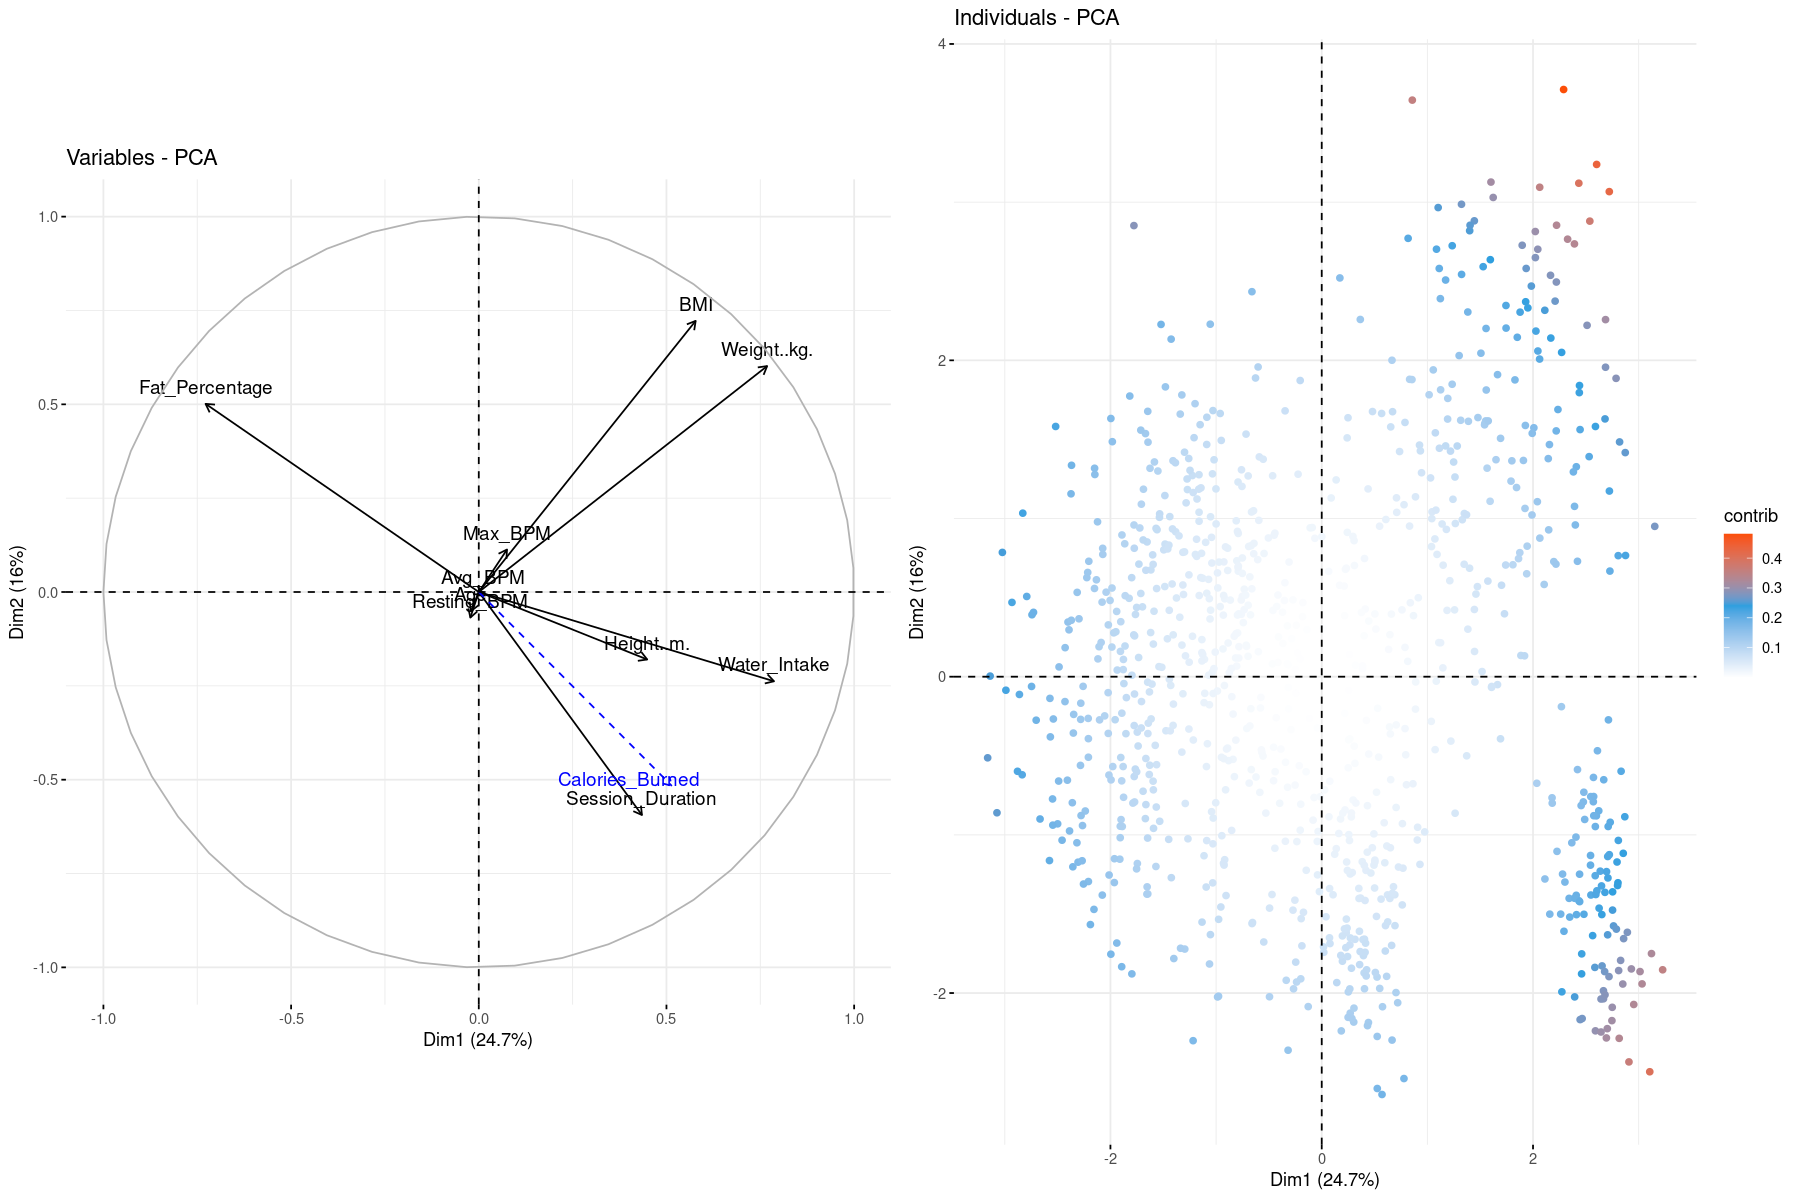

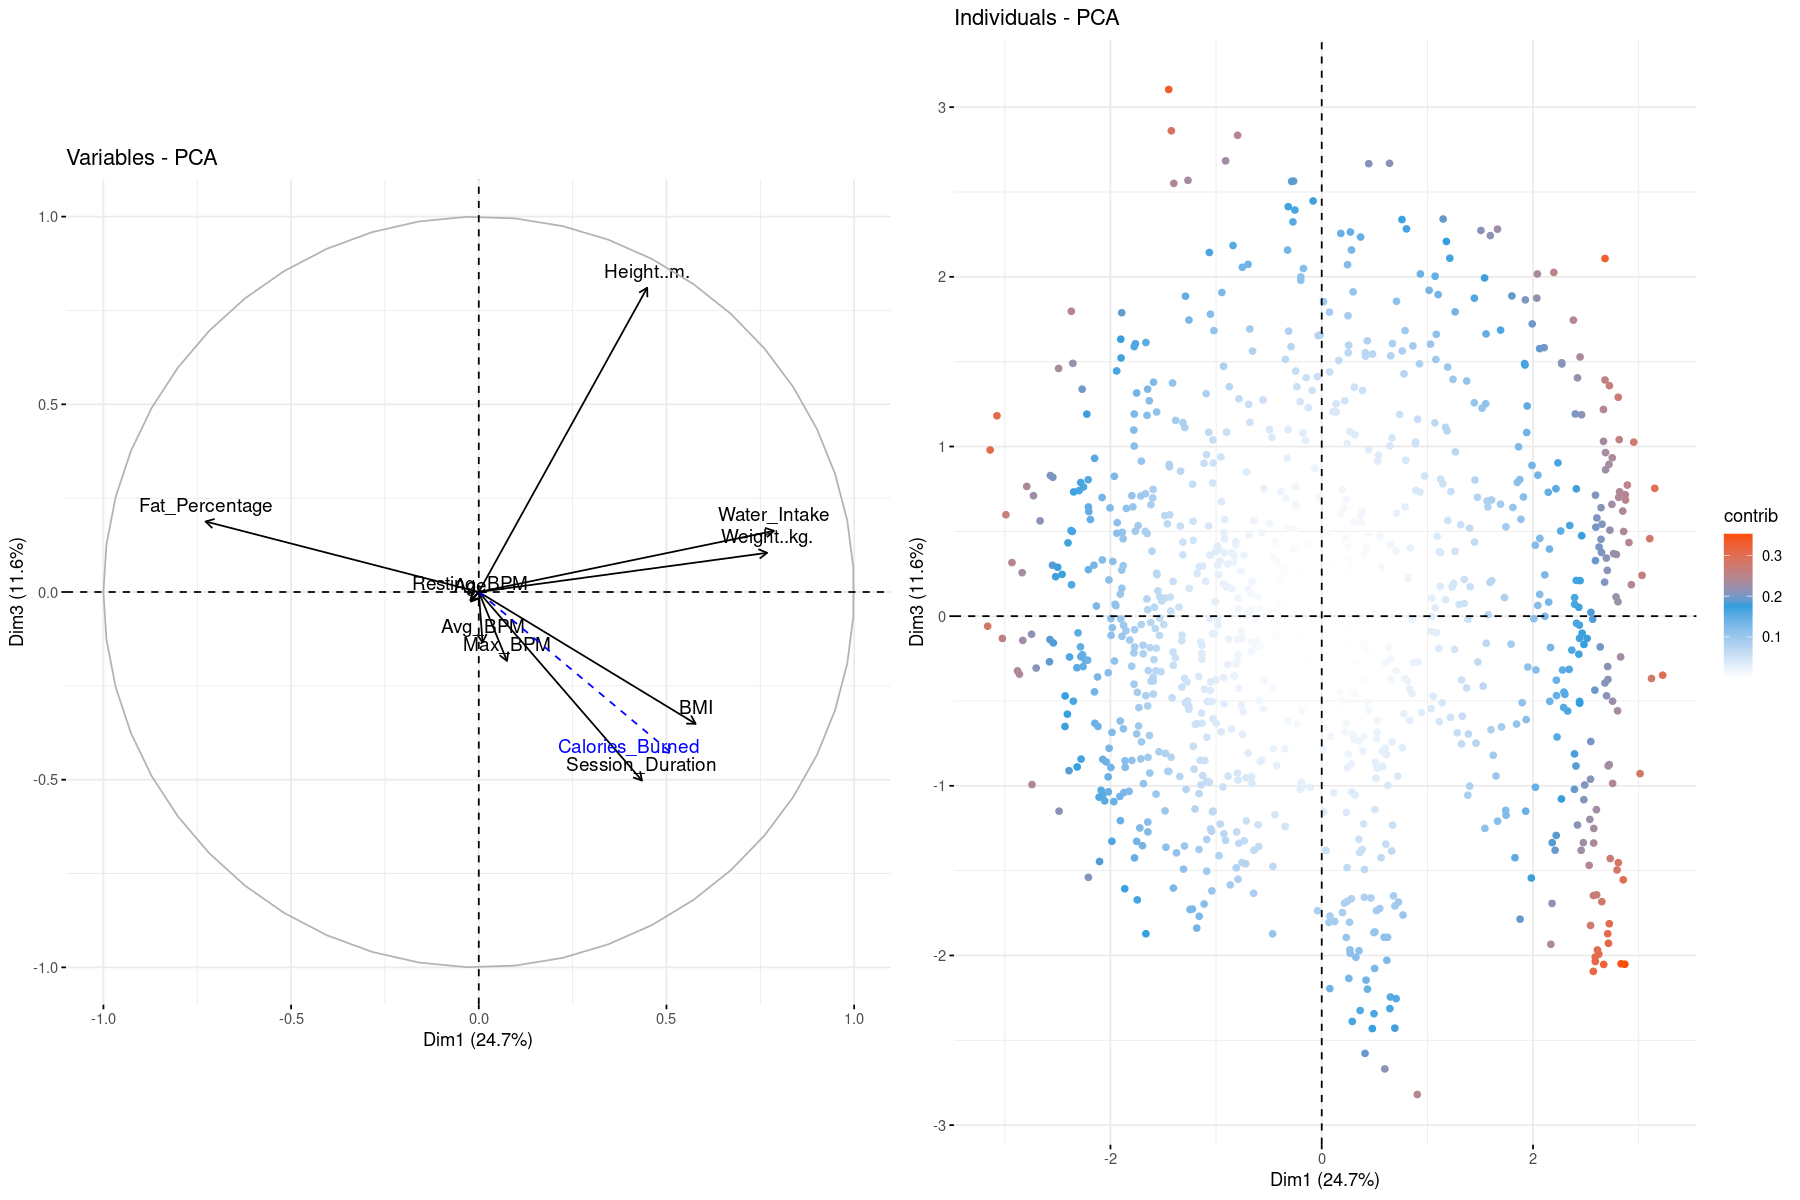

In [16]:
options(repr.plot.width=15, repr.plot.height=10)
p1 <- fviz_pca_var(acp)
p2 <- fviz_pca_ind(acp,col.ind="contrib",label="none",gradient.cols = c("white", "#2E9FDF", "#FC4E07" ))
grid.arrange(p1,p2, ncol=2)
p3 <-fviz_pca_var(acp,axes=c(1,3))
p4<- fviz_pca_ind(acp,col.ind="contrib",label="none",gradient.cols = c("white", "#2E9FDF", "#FC4E07" ),axes=c(1,3))
grid.arrange(p3,p4,ncol=2)

Grâce aux graphiques ci-dessus nous pouvons expliquer quelles dimensions sont portées par quelles variables et ainsi essayer de les expliquer. Ainsi on remarque assez facilement que la dimension 1, portée par des variables comme le poids, la consommation d'eau, l'IMC et le pourcentage de masse graisseuse, représente le corps de l'individu, son profil pûrement physique. 
De plus, la dimension 2, portée par les variables poids, IMC, calories brulées et durée de la séance, représente plus le profil de l'individu en tant que sportif. La dimension 3 quant à elle est plus difficile à interpréter. 

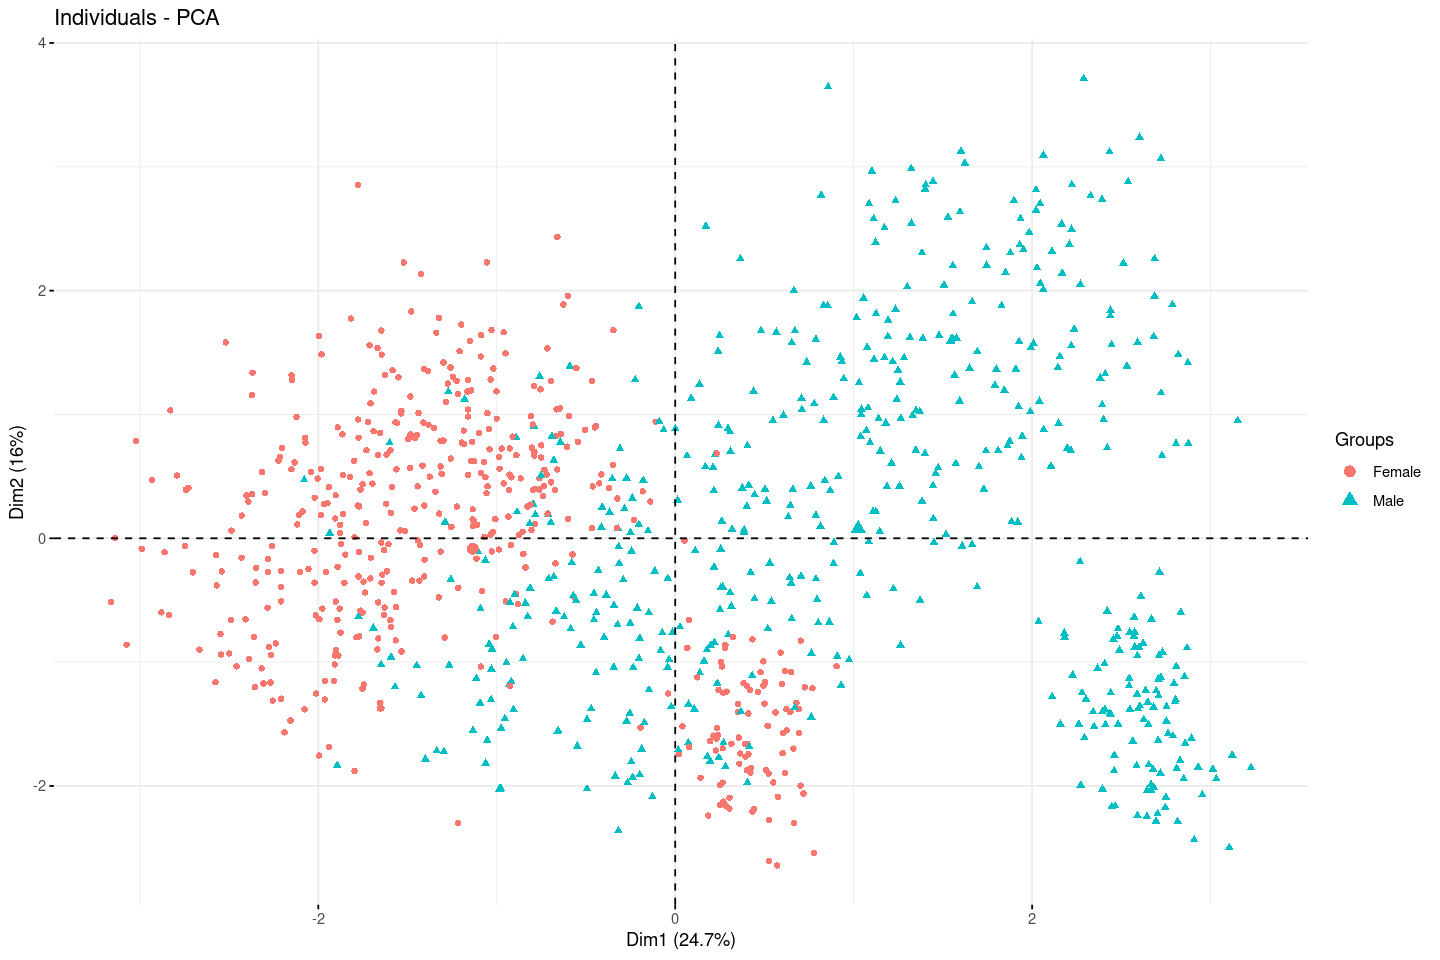

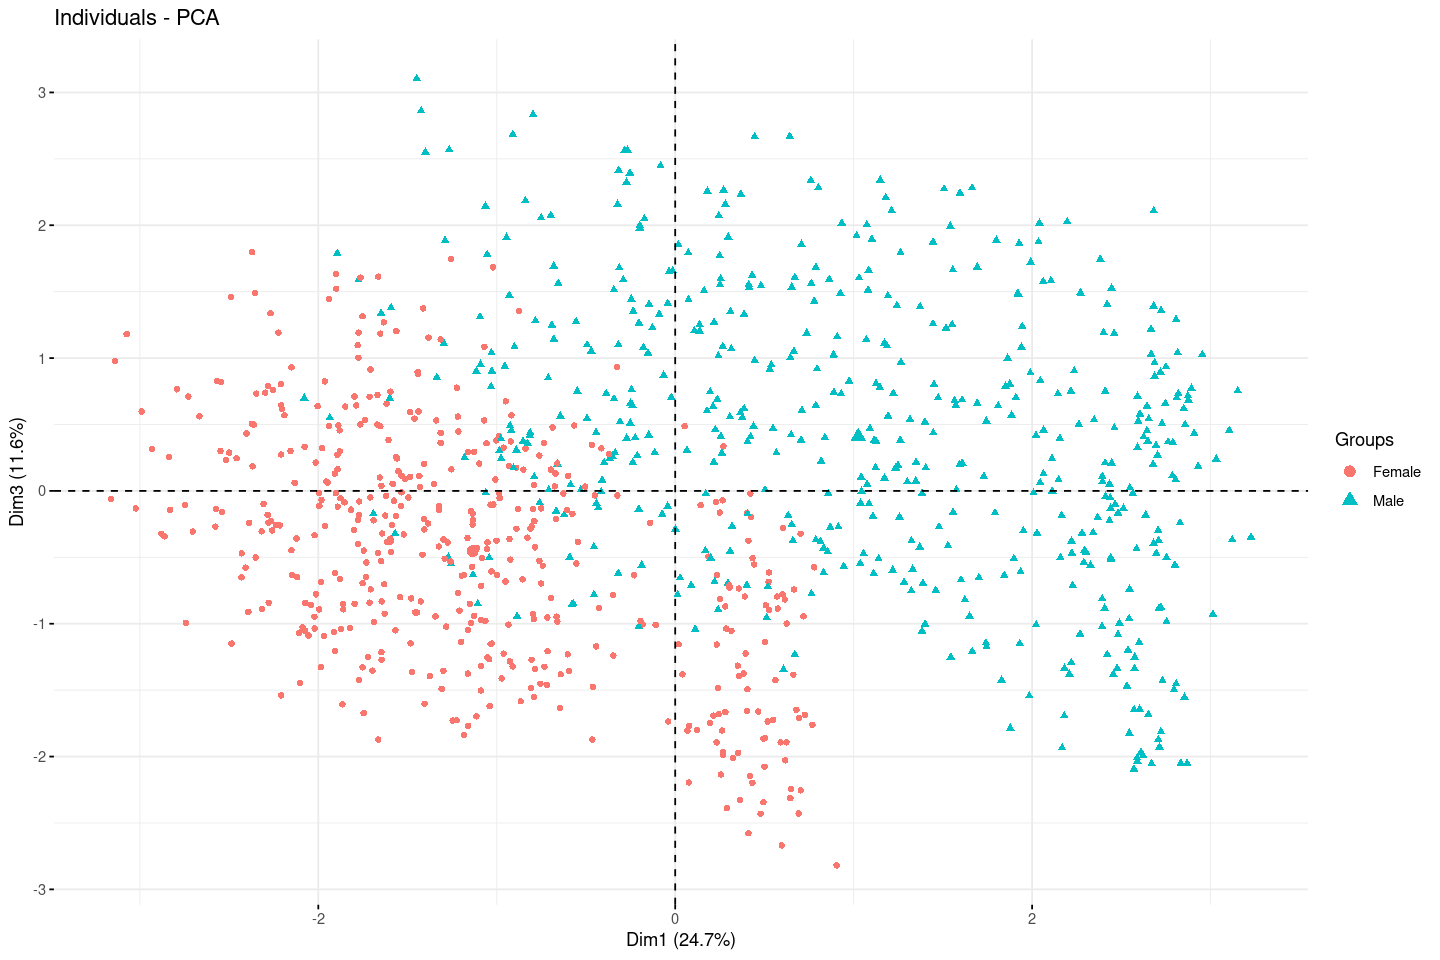

In [17]:
options(repr.plot.width=12, repr.plot.height=8)

fviz_pca_ind(acp, label="none", habillage=Gym$Gender)
fviz_pca_ind(acp, label="none", habillage=Gym$Gender, axes=c(1,3))

Dans ces projections en ACP des individus sur les dimensions 1 et 2 puis 1 et 3 certains groupes se distinguent. En effet, sur le premier graphique on distingu clairement 2 groupes se distingant du reste, ce sont un groupe de femme et un groupe d'homme que nous pourrions considérer comme les plus sportif, ce sont sûrement des individus qui brûlent le plus de calories parmi les femmes et les hommes. 

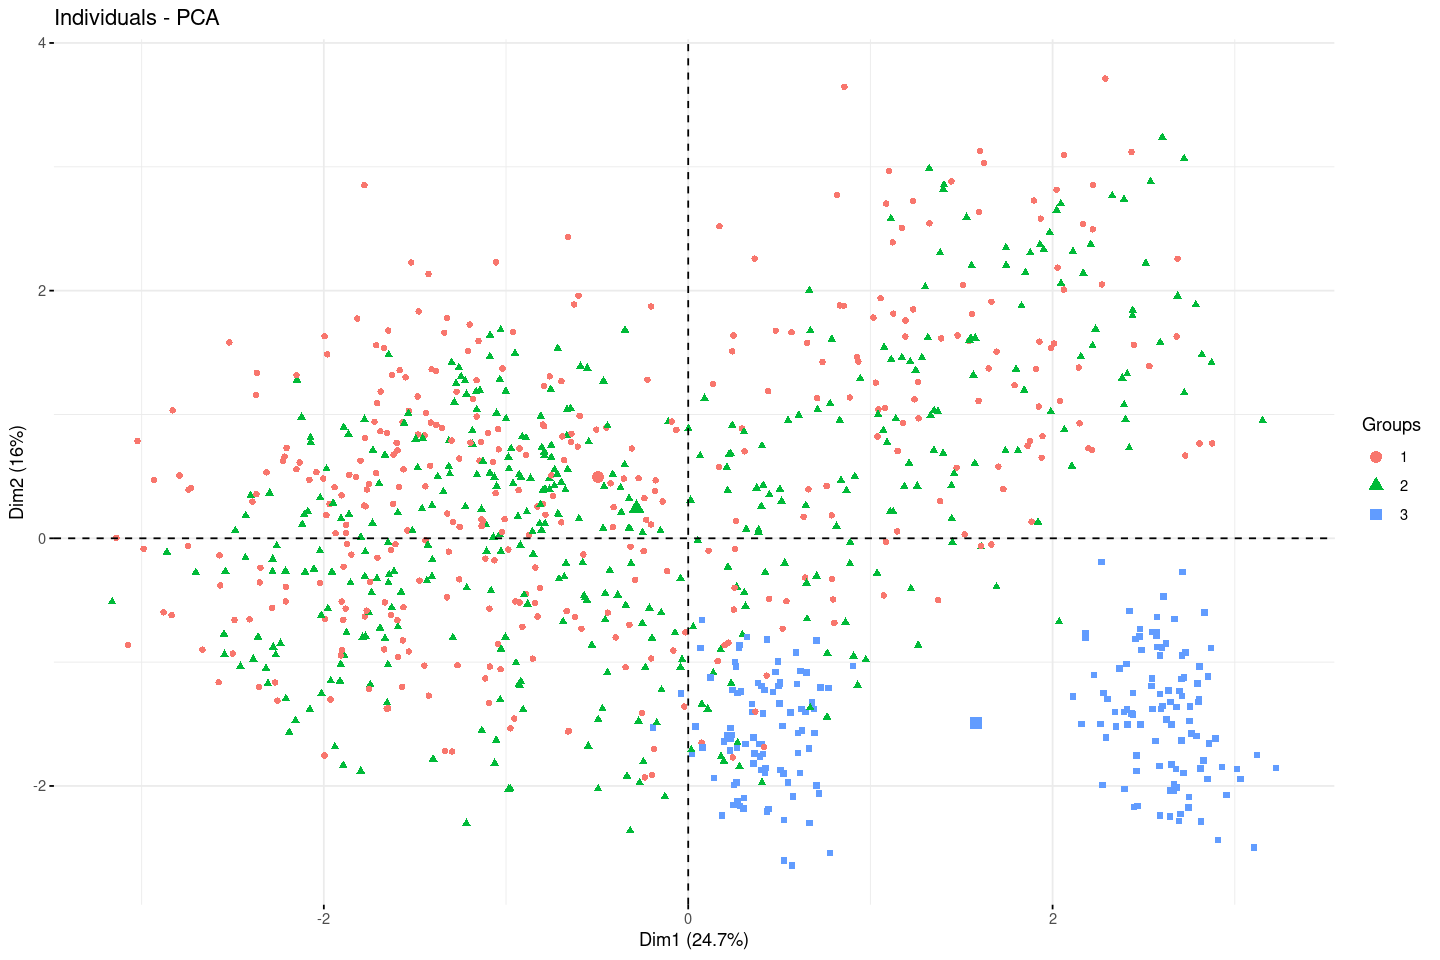

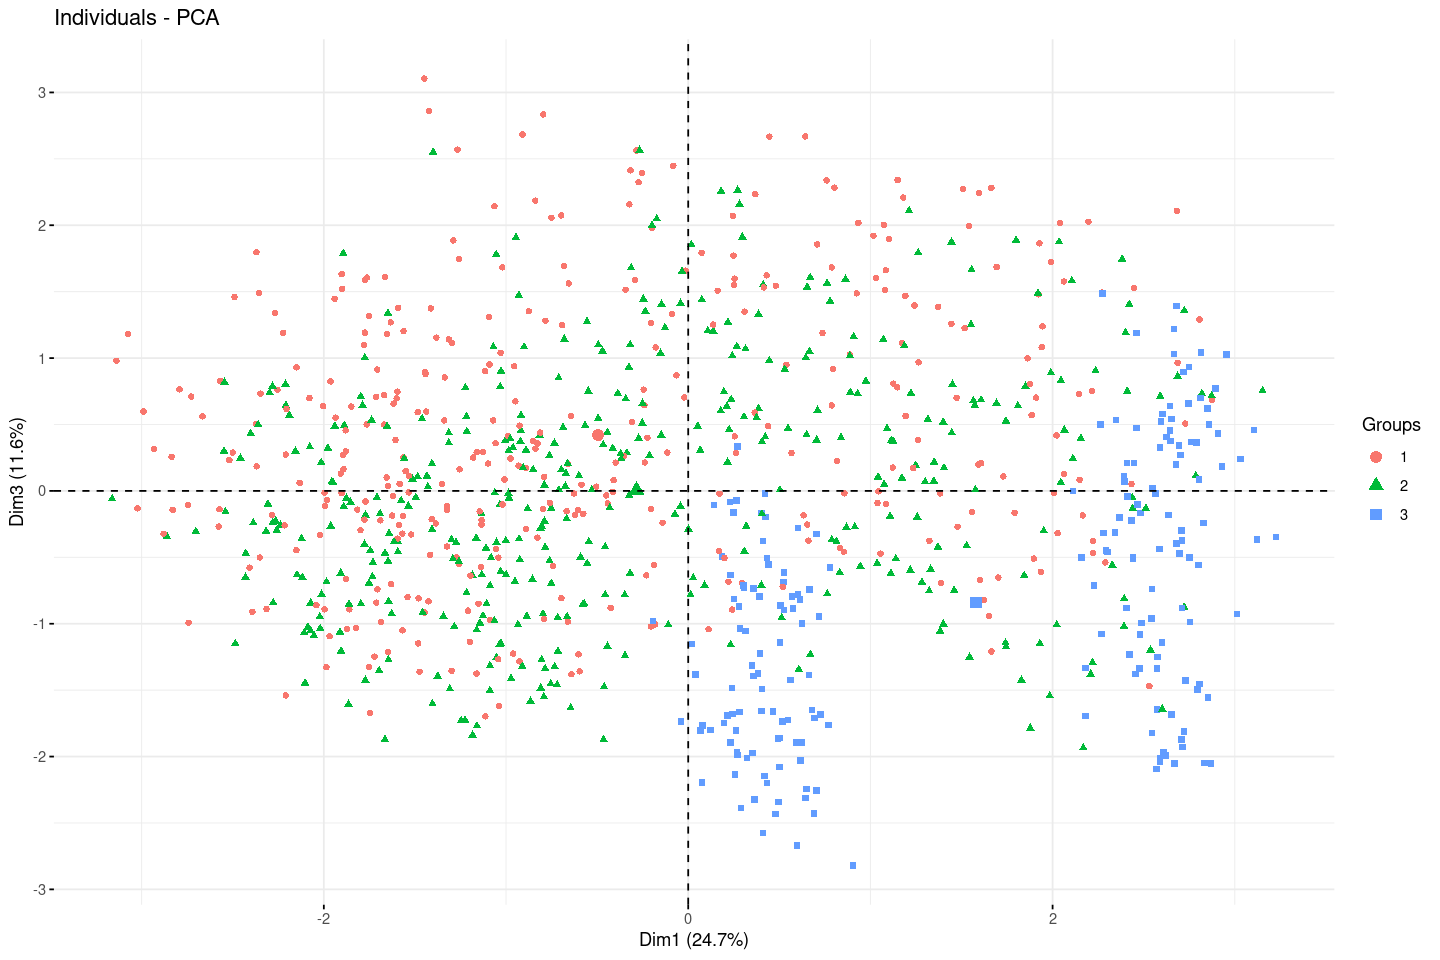

In [18]:
fviz_pca_ind(acp, label="none", habillage=Gym$Experience_Level)
fviz_pca_ind(acp, label="none", habillage=Gym$Experience_Level, axes=c(1,3))

Par ces représentations, nous avons confirmé notre intuition précédente, puisque les deux groupes qui se distinguaient correspondent à deux groupes d'individus expérimentés. On peut donc établir le profil des individus confirmés, des personnes plus lourdes car plus musclées mais moins grasses donc à droite de la dimension 1. Ces individus sont aussi tous du côté négatif de la dimension 2 reprenant donc notre interprétation du profil de l'athlète sur cette dimension. 

# Prévision des calories brulées

Dans cette partie, nous avons pour objectif de prédire la quantité de calories brûlées par rapport aux autres variables à notre disposition. Pour cela, nous allons tester plusieurs modèles et comparer leur efficacité.

## Séparation de la base en train/test

Avant de pouvoir réaliser nos différents modèles de prédiction, il est d'abord nécessaire de séparer nos données en deux parties. La première partie correspond à 80% de la base initiale. Elle permet d'entraîner un modèle sur les données qui lui sont fournies. La seconde partie est celle de test. Elle permettra d'appliquer le modèle entraîné et de comparer les différentes méthodes entre elles.  

In [19]:
set.seed(150) # initialisation du générateur
# Extraction des échantillons
test.ratio <- .2   # part de l'échantillon test
npop <- nrow(Gym) # nombre de lignes dans les données

# taille de l'échantillon test
ntest <- ceiling(npop * test.ratio) 
# indices de l'échantillon test
testi <- sample(1:npop, ntest)
# indices de l'échantillon d'apprentissage
appri <- setdiff(1:npop, testi) 

In [20]:
# construction de l'échantillon d'apprentissage
datappr0 <- Gym[appri,] 
# construction de l'échantillon test
datestr0 <- Gym[testi,]

summary(datappr0)
summary(datestr0)

      Age           Gender     Weight..kg.       Height..m.       Max_BPM     
 Min.   :18.00   Female:374   Min.   : 40.00   Min.   :1.500   Min.   :160.0  
 1st Qu.:28.00   Male  :404   1st Qu.: 58.02   1st Qu.:1.620   1st Qu.:170.0  
 Median :39.00                Median : 69.70   Median :1.710   Median :180.0  
 Mean   :38.57                Mean   : 73.66   Mean   :1.723   Mean   :179.8  
 3rd Qu.:49.00                3rd Qu.: 85.60   3rd Qu.:1.800   3rd Qu.:190.0  
 Max.   :59.00                Max.   :129.90   Max.   :2.000   Max.   :199.0  
    Avg_BPM     Resting_BPM    Calories_Burned    Workout_Type Fat_Percentage 
 Min.   :120   Min.   :50.00   Min.   : 303.0   Cardio  :201   Min.   :10.00  
 1st Qu.:132   1st Qu.:56.00   1st Qu.: 723.5   HIIT    :175   1st Qu.:21.20  
 Median :144   Median :62.00   Median : 895.0   Strength:203   Median :26.25  
 Mean   :144   Mean   :62.12   Mean   : 909.4   Yoga    :199   Mean   :24.93  
 3rd Qu.:156   3rd Qu.:68.00   3rd Qu.:1089.8       

      Age           Gender     Weight..kg.       Height..m.       Max_BPM     
 Min.   :18.00   Female: 88   Min.   : 41.10   Min.   :1.500   Min.   :160.0  
 1st Qu.:28.00   Male  :107   1st Qu.: 58.30   1st Qu.:1.620   1st Qu.:170.0  
 Median :40.00                Median : 70.60   Median :1.700   Median :181.0  
 Mean   :39.15                Mean   : 74.62   Mean   :1.722   Mean   :180.3  
 3rd Qu.:51.00                3rd Qu.: 86.95   3rd Qu.:1.795   3rd Qu.:190.0  
 Max.   :59.00                Max.   :128.40   Max.   :2.000   Max.   :199.0  
    Avg_BPM       Resting_BPM    Calories_Burned    Workout_Type
 Min.   :120.0   Min.   :50.00   Min.   : 319.0   Cardio  :54   
 1st Qu.:131.0   1st Qu.:56.00   1st Qu.: 711.0   HIIT    :46   
 Median :139.0   Median :64.00   Median : 882.0   Strength:55   
 Mean   :142.8   Mean   :62.63   Mean   : 889.7   Yoga    :40   
 3rd Qu.:156.0   3rd Qu.:68.50   3rd Qu.:1025.0                 
 Max.   :169.0   Max.   :74.00   Max.   :1701.0          

Afin de rentre toutes les données comparables, on normalise l'échantillon de test et l'échantillon d'apprentissage exempté de la variable à prédire. 

In [21]:
# on normalise l'échantillon d'apprentissage
datappr=datappr0
datappr[,-c(2,8,9,11,13)]=scale(datappr0[,-c(2,8,9,11,13)])

# on normalise l'échantillon test 
# à l'aide des caractéristiques de l'échantillon d'apprentissage
datestr=datestr0
datestr[,-c(2,8,9,11,13)]=scale(datestr0[,-c(2,8,9,11,13)],
                            center=sapply(datappr0[,-c(2,8,9,11,13)],mean), # on centre avec les moyennes de l'échantillon d'apprentissage
                            scale=sapply(datappr0[,-c(2,8,9,11,13)],sd)) # on réduit avec les écart-types de l'échantillon d'apprentissage
summary(datappr)
summary(datestr)

      Age              Gender     Weight..kg.        Height..m.     
 Min.   :-1.69638   Female:374   Min.   :-1.5897   Min.   :-1.7610  
 1st Qu.:-0.87152   Male  :404   1st Qu.:-0.7385   1st Qu.:-0.8126  
 Median : 0.03584                Median :-0.1871   Median :-0.1014  
 Mean   : 0.00000                Mean   : 0.0000   Mean   : 0.0000  
 3rd Qu.: 0.86070                3rd Qu.: 0.5637   3rd Qu.: 0.6099  
 Max.   : 1.68557                Max.   : 2.6558   Max.   : 2.1905  
    Max_BPM            Avg_BPM            Resting_BPM       Calories_Burned 
 Min.   :-1.71221   Min.   :-1.672e+00   Min.   :-1.65238   Min.   : 303.0  
 1st Qu.:-0.84614   1st Qu.:-8.360e-01   1st Qu.:-0.83442   1st Qu.: 723.5  
 Median : 0.01993   Median :-8.954e-05   Median :-0.01647   Median : 895.0  
 Mean   : 0.00000   Mean   : 0.000e+00   Mean   : 0.00000   Mean   : 909.4  
 3rd Qu.: 0.88599   3rd Qu.: 8.358e-01   3rd Qu.: 0.80148   3rd Qu.:1089.8  
 Max.   : 1.66546   Max.   : 1.741e+00   Max.   : 1.619

      Age              Gender     Weight..kg.         Height..m.       
 Min.   :-1.69638   Female: 88   Min.   :-1.53774   Min.   :-1.761001  
 1st Qu.:-0.87152   Male  :107   1st Qu.:-0.72548   1st Qu.:-0.812645  
 Median : 0.11832                Median :-0.14462   Median :-0.180407  
 Mean   : 0.04853                Mean   : 0.04532   Mean   :-0.009784  
 3rd Qu.: 1.02567                3rd Qu.: 0.62750   3rd Qu.: 0.570375  
 Max.   : 1.68557                Max.   : 2.58496   Max.   : 2.190483  
    Max_BPM            Avg_BPM          Resting_BPM       Calories_Burned 
 Min.   :-1.71221   Min.   :-1.67193   Min.   :-1.65238   Min.   : 319.0  
 1st Qu.:-0.84614   1st Qu.:-0.90567   1st Qu.:-0.83442   1st Qu.: 711.0  
 Median : 0.10653   Median :-0.34839   Median : 0.25618   Median : 882.0  
 Mean   : 0.04924   Mean   :-0.08154   Mean   : 0.06952   Mean   : 889.7  
 3rd Qu.: 0.88599   3rd Qu.: 0.83583   3rd Qu.: 0.86965   3rd Qu.:1025.0  
 Max.   : 1.66546   Max.   : 1.74141   Max.   

La fonction créée ci-après nous permettra de représenter les résidus (les erreurs) des modèles pour chaque individu, ces graphiques seront assez parlant pour représenter l'efficacité d'un modèle. 

In [22]:
gplot.res <- function(x, y, titre = "titre"){
    ggplot(data.frame(x=x, y=y),aes(x,y))+
    geom_point(col = "blue")+xlim(200,2000)+ylim(-150,200)+
    ylab("Résidus")+ xlab("Valeurs prédites")+
    ggtitle(titre)+
    geom_hline(yintercept = 0,col="green")
}

## Modèle linéaires

On s'intéresse d'abord aux modèles de type linéaire. Ceux-ci sont vastement utilisés pour leur simplicité et leur interprétabilité.

### Sans pénalisation et sans sélection de variables

La variable à expliquer étant quantitative, on utilise un de régression linéaire de type ANCOVA sans intéractions.

In [23]:
options(repr.plot.width=8, repr.plot.height=6)

# estimation du modèle sans interaction
reg.lm <-aov(Calories_Burned ~ . , data = datappr)
summary(reg.lm)
# Extraction des résidus et des valeurs ajustées de ce modèle
res.lm <- reg.lm$residuals
fit.lm <- reg.lm$fitted.values

                   Df   Sum Sq  Mean Sq   F value   Pr(>F)    
Age                 1  1370418  1370418   846.877  < 2e-16 ***
Gender              1  1258021  1258021   777.419  < 2e-16 ***
Weight..kg.         1    19288    19288    11.919 0.000586 ***
Height..m.          1      898      898     0.555 0.456480    
Max_BPM             1    13399    13399     8.280 0.004120 ** 
Avg_BPM             1  6693583  6693583  4136.433  < 2e-16 ***
Resting_BPM         1        5        5     0.003 0.955216    
Workout_Type        3   502697   167566   103.550  < 2e-16 ***
Fat_Percentage      1 19926671 19926671 12314.081  < 2e-16 ***
Experience_Level    2  9695358  4847679  2995.719  < 2e-16 ***
BMI                 1     3602     3602     2.226 0.136125    
Workout_Frequency   3    29856     9952     6.150 0.000392 ***
Session_Duration    1 17829857 17829857 11018.314  < 2e-16 ***
Water_Intake        1       33       33     0.020 0.886265    
Residuals         758  1226597     1618                

Nous allons calculer le R2 et l'erreur moyenne du modèle afin d'avoir des données comparables que nous recalculerons par la suite pour les autres modèles.

In [24]:
summary_lm <- summary.lm(reg.lm) 

R2 <- 1 - sum(summary_lm$residuals^2) / sum((datappr$Calories_Burned - mean(datappr$Calories_Burned))^2)

n <- nrow(datappr)
p <- length(coef(summary_lm)) - 1  
R2_adj <- 1 - ((1 - R2) * (n - 1)) / (n - p - 1)

# Affichage
cat("R² classique :", round(R2, 4), "\n")
cat("R² ajusté     :", round(R2_adj, 4), "\n")
MSE <- mean(summary_lm$residuals^2)
cat("MSE :", MSE, "\n")

R² classique : 0.9791 
R² ajusté     : 0.9767 
MSE : 1576.603 


Le R2 classique étant fortement élevé, on en déduit que ce modèle a un biais très faible. Cependant,sans pénalisation les modèles linéaires ont tendance à faire de l'overfitting pour un nombre de paramètres important. On se retrouve donc avec des modèles trop complexes. Cela se traduit par un R2 ajusté plus faible bien que très satisfaisant.

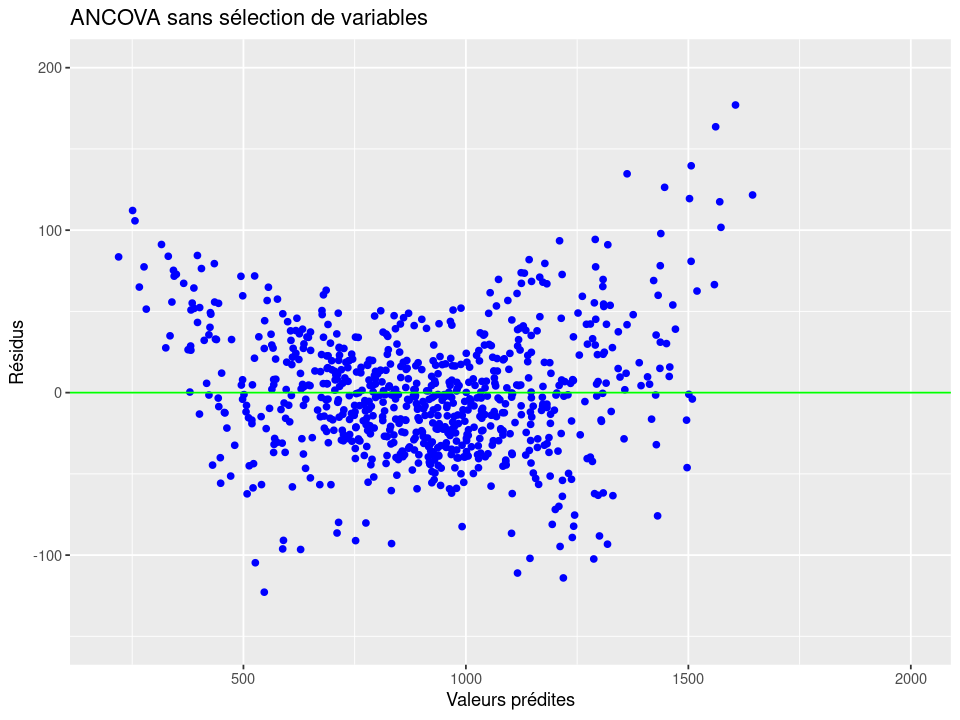

In [25]:
options(repr.plot.width=8, repr.plot.height=6)
# Graphe des résidus. 
gplot.res(fit.lm,res.lm,"ANCOVA sans sélection de variables")

En affichant le graphique des résidus on remarque une forme "en banane" synonyme d'un modèle peu fiable. En effet, si le modèle était bon nous observerions une ligne droit proche de la ligne y=0. Cela confirme que le modèle de régression linéaire sans pénalisation ni sélection de variable n'est pas très efficace pour la prédiction des calories brulées.

### Avec pénalisation

Il est nécessaire de trouver un équilibre entre le biais et la variance. En effet, dans certaines situations, il est préférable de choisir un modèle biaisé, qui permet de réduire de manière importante que de choisir un modèle à R2 élevé. A cet effet, nous allons utiliser différents critères de pénalisation sur les modèles trop complexes. 

#### Sans sélection de variables (Ridge)

In [26]:
lambdas <- seq(0.01, 10, length.out = 100)
x.mat <- model.matrix(Calories_Burned ~ . - 1, data = datappr)

# Entraînement du modèle avec validation croisée
regRidgeCV <- cv.glmnet(x = x.mat, 
                        y = datappr[, 8], 
                        alpha = 0,                  # alpha = 0 => Ridge
                        lambda = lambdas, 
                        nfolds = 5,
                        standardize = TRUE)

# Meilleur paramètre lambda
lambda_opt <- regRidgeCV$lambda.min
cat("Meilleur paramètre = ", lambda_opt, "\n")

Meilleur paramètre =  0.2118182 


Ridge avec lambda.1se - MSE : 1341.04 


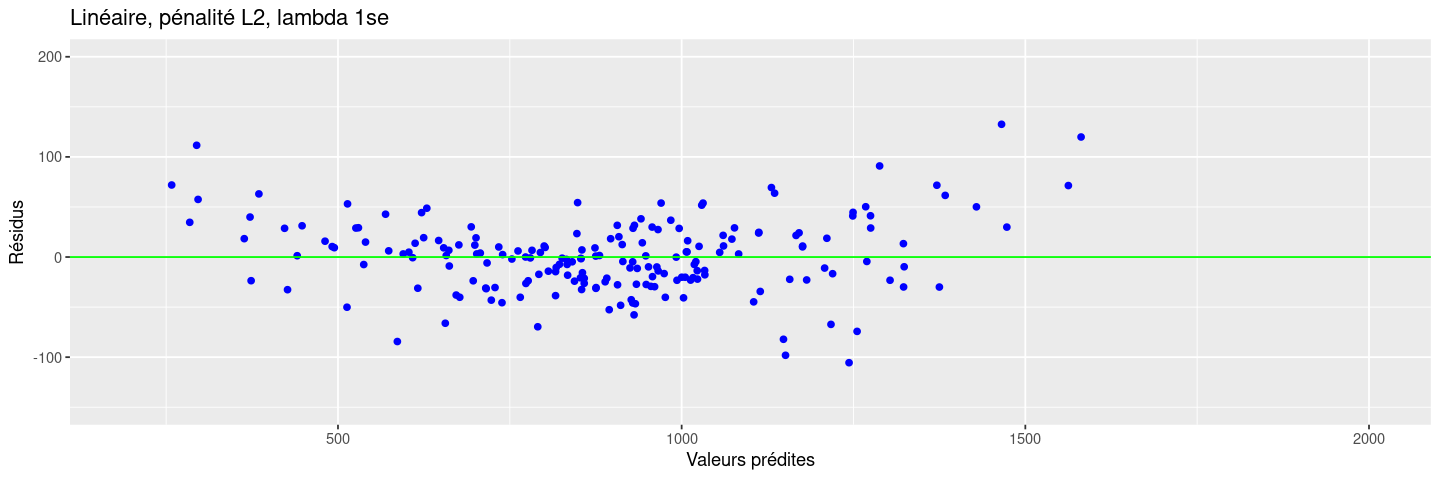

In [27]:
xtest.mat <- model.matrix(Calories_Burned ~ . - 1, data = datestr)
fit.ridge <- predict(regRidgeCV, s = "lambda.1se", newx = xtest.mat)

# Résidus
res.ridge <- datestr$Calories_Burned - fit.ridge

# Graphe des résidus
options(repr.plot.width = 12, repr.plot.height = 4)
gplot.res(fit.ridge, res.ridge, "Linéaire, pénalité L2, lambda 1se")

mse_ridge <- mean(res.ridge^2)
cat("Ridge avec lambda.1se - MSE :", round(mse_ridge, 2), "\n")




Nous comparerons plus tard les erreurs de généralisation de chaque modèle avec des sorties numériques mais avec ce graphique des résidus témoignant des erreurs de généralisation on peut déjà dire que le modèle est perfectible. On remarque une forme de résidus "en banane" qui montre que les valeurs les plus faibles et les plus élevées sont moins bien prédites. 

#### Avec sélection de variables (Cp/AIC/BIC et Lasso)

##### **LASSO**

Afin de simplifier le modèle nous allons effectuer une sélection de variables à l'aide de la méthode LASSO.

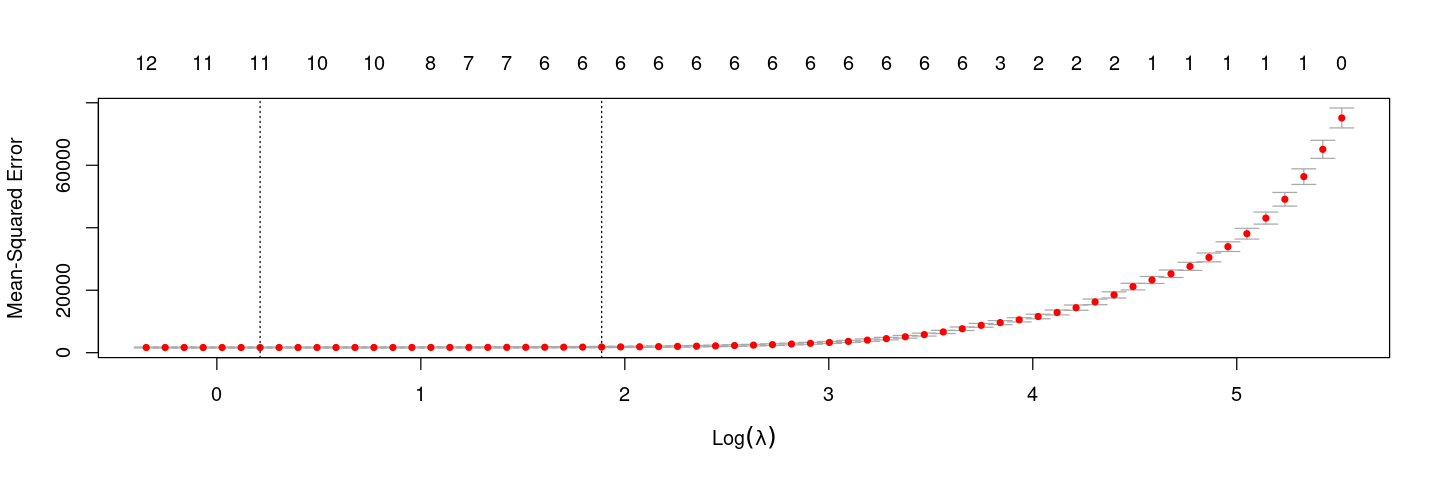

[1] "CV estimate of lambda : 6.596"

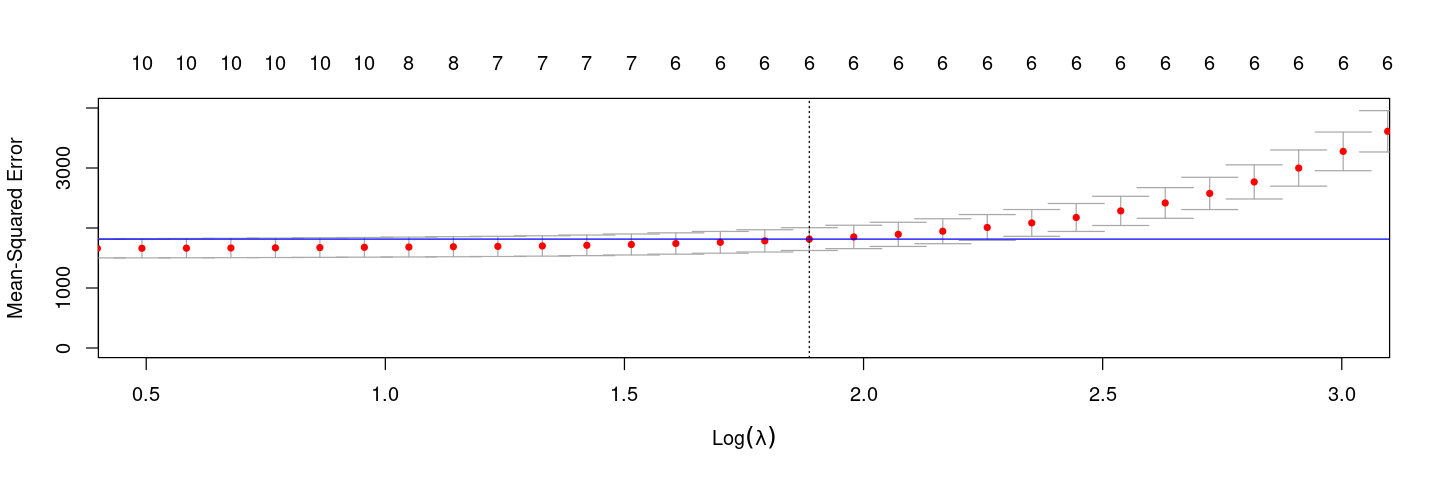

In [28]:

# avec toutes les variables, créer d'abord la matrice d'expériences 
# avec 'model.matrix' (penser à retirer l'intercept du modèle)
x.mat <- model.matrix(Calories_Burned ~ . - 1, data = datappr)

reg.lasso.cv <- cv.glmnet(y = datappr[, 8], x = x.mat)
plot(reg.lasso.cv)
plot(reg.lasso.cv,xlim=c(0.5,3),ylim=c(0,4000))
abline(h=reg.lasso.cv$cvm[c(reg.lasso.cv$index)[2]],col="blue")

paste("CV estimate of lambda :", round(reg.lasso.cv$lambda.1se, 3))

Comme expliqué précemment grâce à ce graphique on peut comparer l'évolution de l'erreur moyenne en fonction de l'évolution du log du paramètre de pénalisation. Ainsi, un lambda plus petit va créer un modle plus complexe mais plus fiable tandis qu'un lambda plus grand va simplifier le modèle mais augmenter l'erreur. Ici, afin de simplifier le modèle au maximum sans trop augmenter l'erreur nous allons choisir un log de lambda environ égal à 1.7, qui nous donne un modèle à 6 variables. Ainsi le log de lambda choisi a une erreur moyenne compris dans l'intervalle d'erreur minimal du modèle.

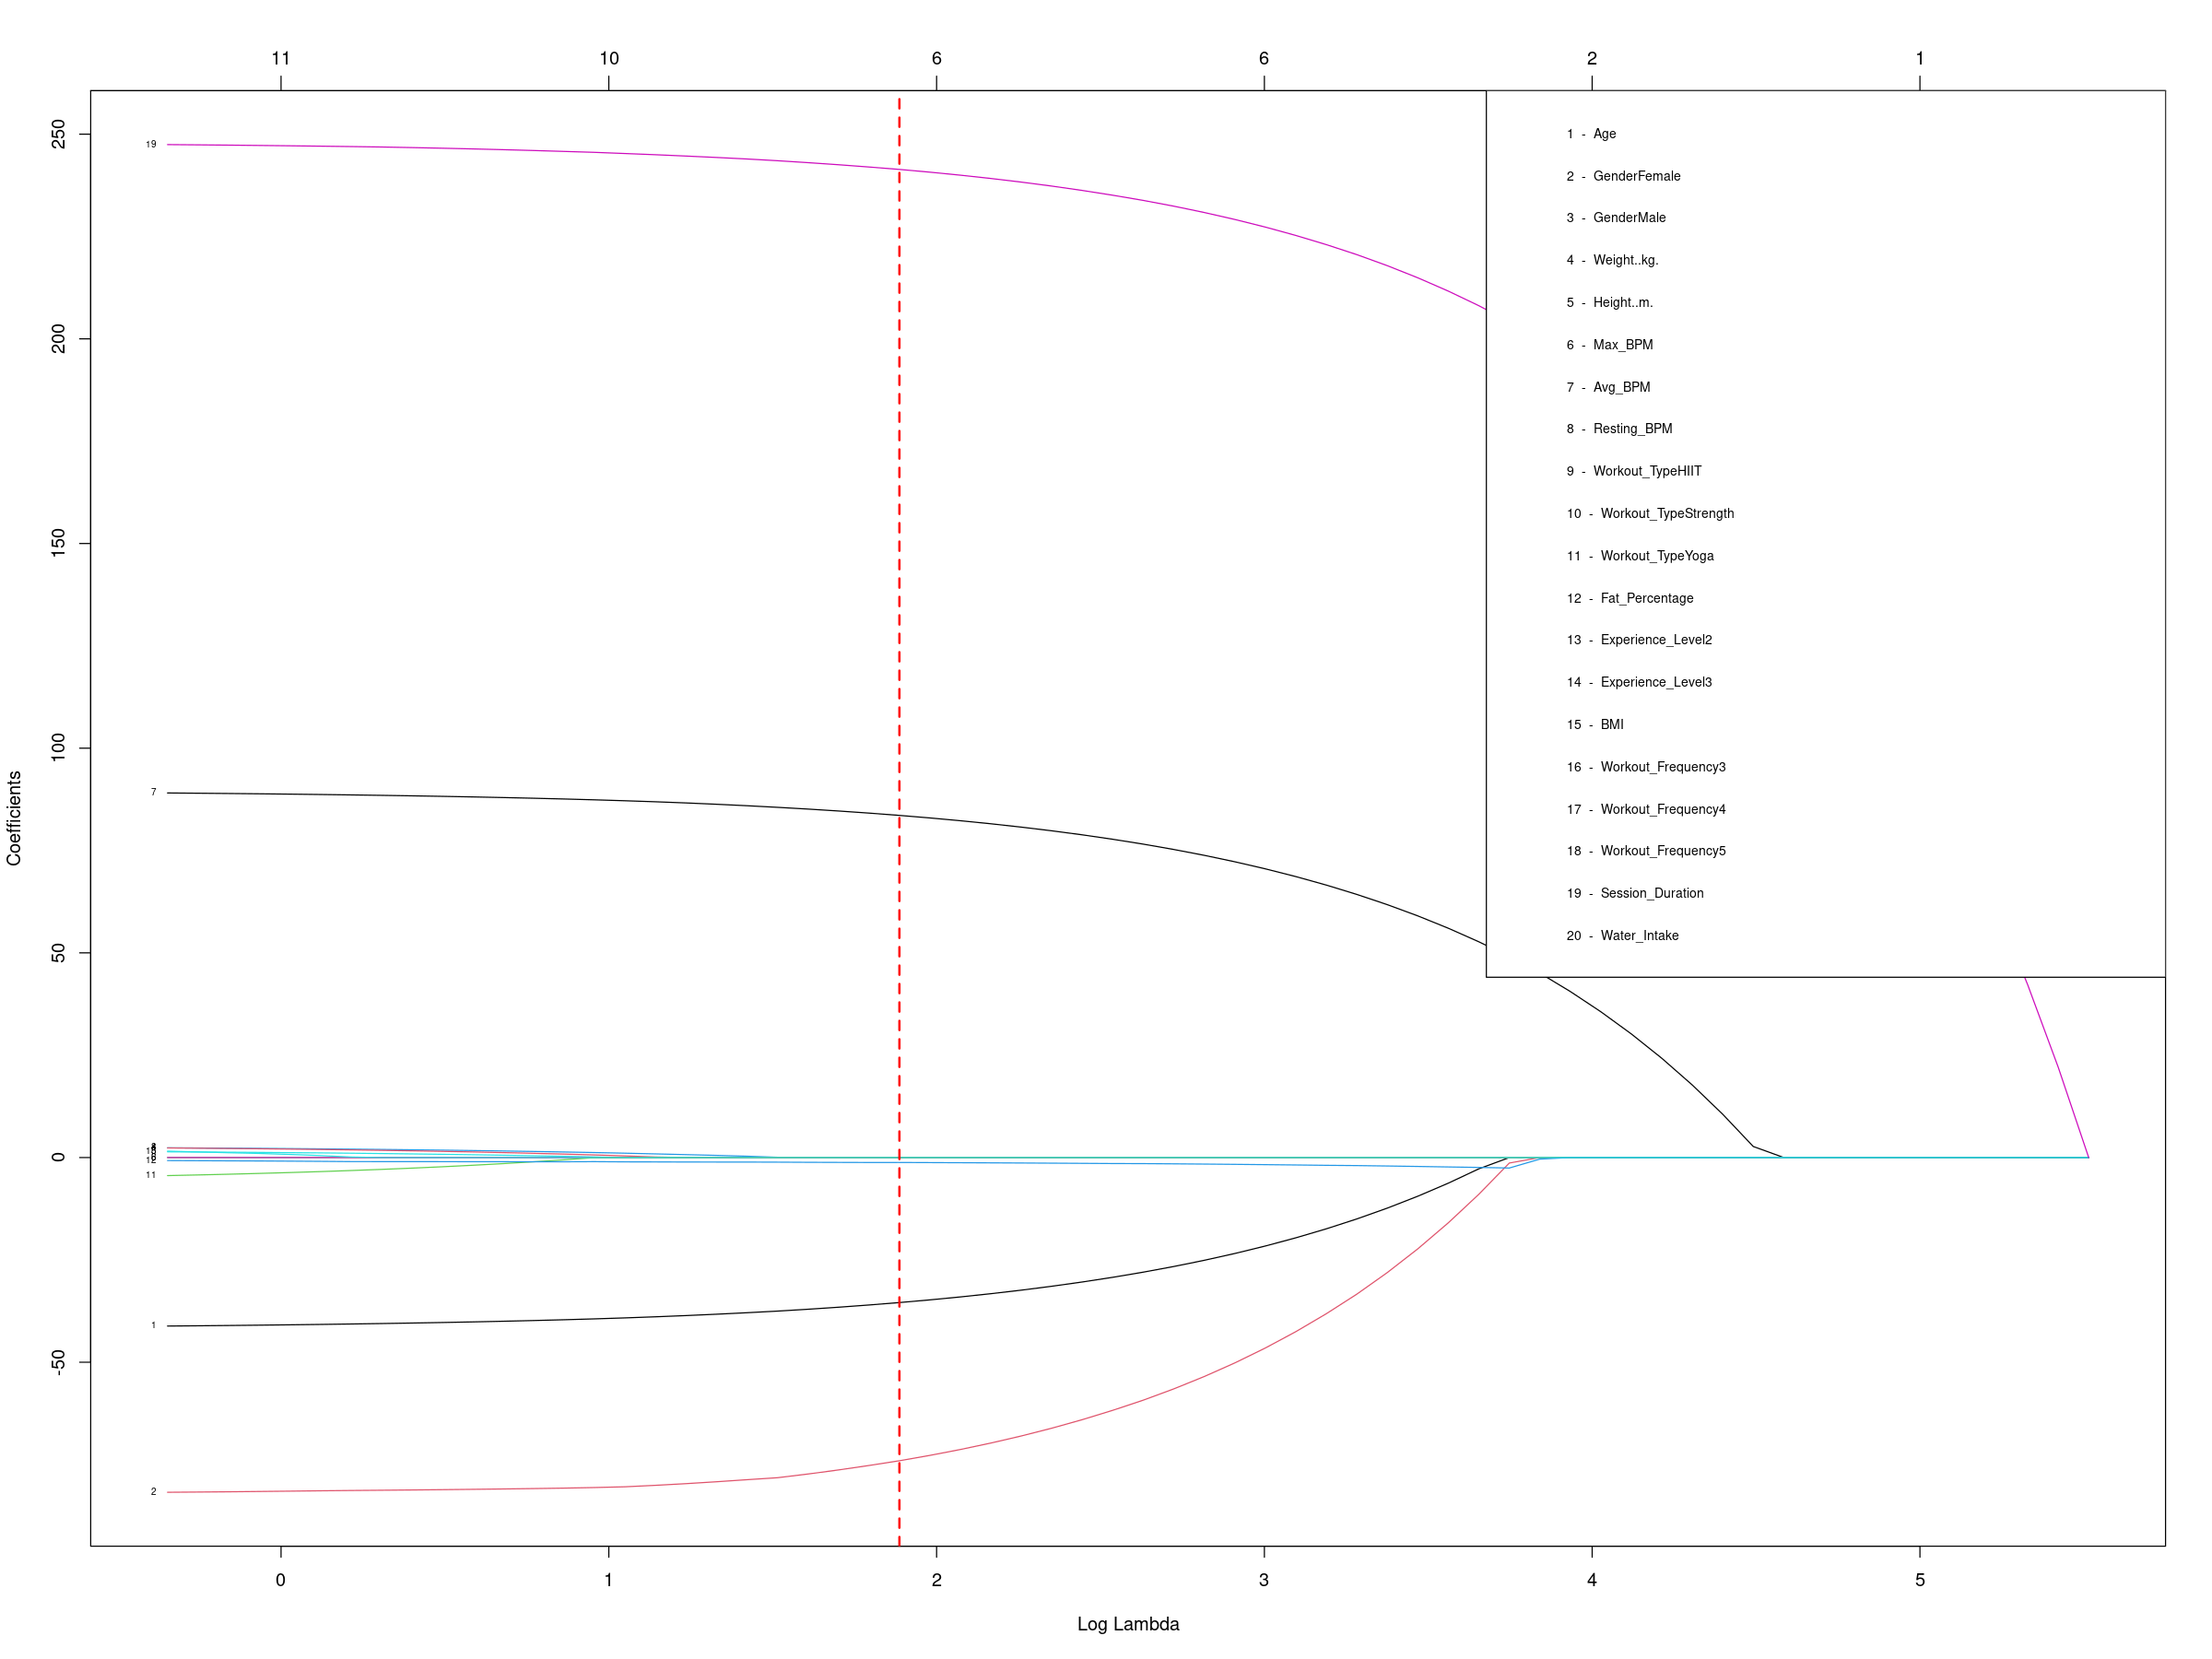

In [29]:

reg.lasso <- glmnet(y = datappr$Calories_Burned, x = x.mat)

options(repr.plot.width = 20, repr.plot.height = 15)

plot(reg.lasso, xvar = "lambda", label = TRUE)


abline(v = log(reg.lasso.cv$lambda.1se), col = "red", lty = 2, lwd = 2)

legend("topright", 
       legend = paste(1:ncol(x.mat), " - ", colnames(x.mat)), cex = 0.7)



Le graphique ci-dessus représente l'évolution des coefficients associés à chaque variable en fonction du log du paramètre de pénalisation $\lambda$. A l'aide de ce graphique, nous pouvons visualiser le svariables conservées par le lasso pour le lambda optimal (ligne rouge verticale).
Le lambda trouvé en R pourra être relativement différent de celui trouvé en python car on observe un "plateau" des coéfficient qui s'étale sur une grande plage de log(lambda). La sélection des variables ne sera donc pas affectée par cette différence. 

In [30]:
# modèle correspondant
coef(reg.lasso.cv, s = "lambda.1se")

21 x 1 sparse Matrix of class "dgCMatrix"
                                s1
(Intercept)           9.449802e+02
Age                  -3.542280e+01
GenderFemale         -7.406577e+01
GenderMale            1.278643e-11
Weight..kg.           .           
Height..m.            .           
Max_BPM               .           
Avg_BPM               8.358138e+01
Resting_BPM           .           
Workout_TypeHIIT      .           
Workout_TypeStrength  .           
Workout_TypeYoga      .           
Fat_Percentage       -1.203725e+00
Experience_Level2     .           
Experience_Level3     .           
BMI                   .           
Workout_Frequency3    .           
Workout_Frequency4    .           
Workout_Frequency5    .           
Session_Duration      2.413843e+02
Water_Intake          .           

D'après ce critère, les variables les plus intéressantes pour prédire les calories brulées sont: la durée de la session, le BPM moyen, le genre (pour éviter les redondances, la modalité principales gardée est le sexe féminin) et l'age. 

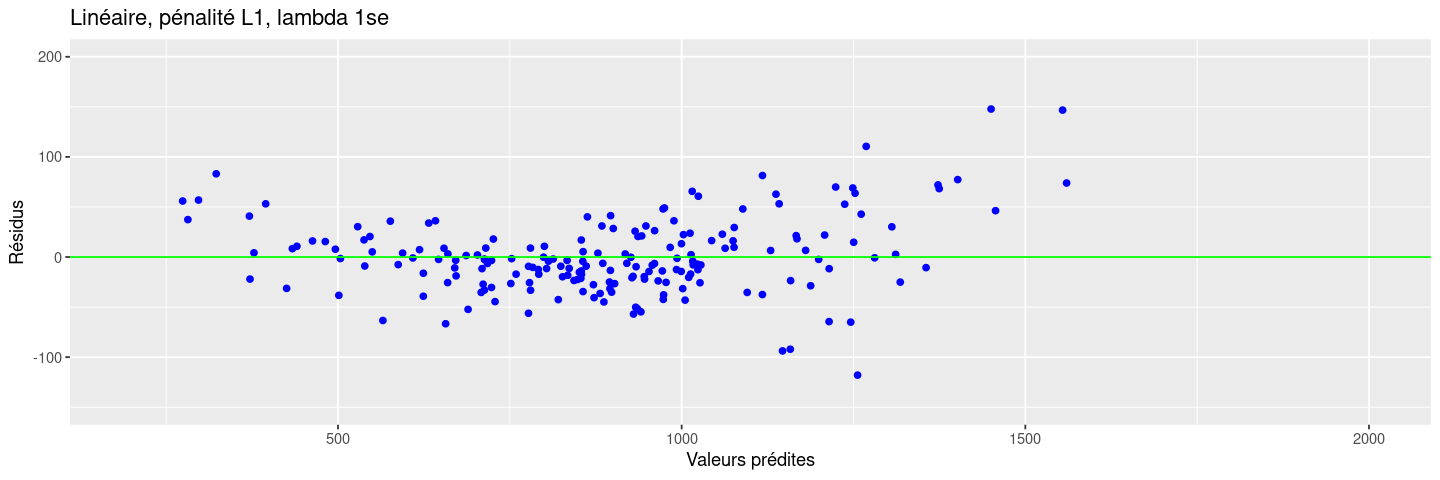

In [31]:
xtest.mat <- model.matrix(Calories_Burned ~ . - 1, data = datestr)
fit.lasso <- predict(reg.lasso.cv, s = "lambda.1se", newx = xtest.mat)
res.lasso <- datestr$Calories_Burned - fit.lasso 

# Graphe des résidus
options(repr.plot.width = 12, repr.plot.height = 4)
gplot.res(fit.lasso, res.lasso, "Linéaire, pénalité L1, lambda 1se") 

Les résidus ressemblent à ceux du modèle Ridge, on retrouve la forme en banane. Mais globalement sur les deux derniers modèles on remarque une erreur de généralisation plus faible. Les modèles semblent donc plus fiables. 

In [32]:
mse_lasso <- mean(res.lasso^2)
cat("LASSO avec lambda.1se - MSE :", round(mse_lasso, 2), "\n")

LASSO avec lambda.1se - MSE : 1441.78 


##### **AIC**

Nous allons à présent implémenter des modèles de régression linéaire avec seulement de la sélection de variable. Nous commençons ici à l'aide du critère AIC.

In [33]:
# Estimation du modèle avec toutes les interactions d'ordre 2
reg.glm <- glm(Calories_Burned ~ . , data = datappr)
# Recherche du meilleur modèle au sens 
# du critère d'Akaïke par méthode descendante
reg.glm.aic <- step(reg.glm, direction = "backward")

y_pred <- predict(reg.glm.aic, newdata = datestr)
y_true <- datestr$Calories_Burned
res.aic <- y_true - y_pred

Start:  AIC=7978.3
Calories_Burned ~ Age + Gender + Weight..kg. + Height..m. + Max_BPM + 
    Avg_BPM + Resting_BPM + Workout_Type + Fat_Percentage + Experience_Level + 
    BMI + Workout_Frequency + Session_Duration + Water_Intake

                    Df Deviance     AIC
- Workout_Frequency  3  1229338  7974.0
- Workout_Type       3  1232565  7976.1
- Water_Intake       1  1226630  7976.3
- Max_BPM            1  1226900  7976.5
- Experience_Level   2  1231522  7977.4
- Fat_Percentage     1  1229290  7978.0
<none>                  1226597  7978.3
- Weight..kg.        1  1230436  7978.7
- BMI                1  1231660  7979.5
- Height..m.         1  1232970  7980.3
- Resting_BPM        1  1234421  7981.3
- Gender             1  1505702  8135.8
- Age                1  2560041  8548.7
- Avg_BPM            1  7311728  9365.2
- Session_Duration   1 19056374 10110.5

Step:  AIC=7974.04
Calories_Burned ~ Age + Gender + Weight..kg. + Height..m. + Max_BPM + 
    Avg_BPM + Resting_BPM + Workout_

In [34]:
mse_aic <- mean(res.aic^2)
cat("AIC - MSE :", round(mse_aic, 2), "\n")

AIC - MSE : 1356.2 


##### **BIC**

In [35]:
n <- nrow(datappr)
reg.glm <- glm(Calories_Burned ~ . , data = datappr)

# Sélection descendante selon le BIC
reg.glm.bic <- step(reg.glm, direction = "backward", k = log(n))

y_pred <- predict(reg.glm.bic, newdata = datestr)
y_true <- datestr$Calories_Burned
res.bic <- y_true - y_pred

Start:  AIC=8071.44
Calories_Burned ~ Age + Gender + Weight..kg. + Height..m. + Max_BPM + 
    Avg_BPM + Resting_BPM + Workout_Type + Fat_Percentage + Experience_Level + 
    BMI + Workout_Frequency + Session_Duration + Water_Intake

                    Df Deviance     AIC
- Workout_Frequency  3  1229338  8053.2
- Workout_Type       3  1232565  8055.2
- Experience_Level   2  1231522  8061.2
- Water_Intake       1  1226630  8064.8
- Max_BPM            1  1226900  8065.0
- Fat_Percentage     1  1229290  8066.5
- Weight..kg.        1  1230436  8067.2
- BMI                1  1231660  8068.0
- Height..m.         1  1232970  8068.8
- Resting_BPM        1  1234421  8069.7
<none>                  1226597  8071.4
- Gender             1  1505702  8224.3
- Age                1  2560041  8637.2
- Avg_BPM            1  7311728  9453.7
- Session_Duration   1 19056374 10199.0

Step:  AIC=8053.2
Calories_Burned ~ Age + Gender + Weight..kg. + Height..m. + Max_BPM + 
    Avg_BPM + Resting_BPM + Workout_

In [36]:
mse_bic <- mean(res.bic^2)
cat("BIC - MSE :", round(mse_bic, 2), "\n")

BIC - MSE : 1367.14 


Ces deux modèles diminuent le nombre de variables sans pénalisation mais en utilisant des critères différents. Grâce à la MSE on peut voir qu'ils sont plus efficaces, leur erreur de généralisation est plus faible. On eput donc en déduire que la variable Calories_Burned peut être bien modélisée à l'aide des autres. Ce n'est pas étonnant vu que celle-ci est corrélée à d'autres comme Fat_Percentage ou Session_Duration. 

## Performance d'un SVM 

Nous allons à présent utiliser un algorithme d’apprentissage supervisé appelé SVM (Support Vector Machine) pour analyser les calories brûlées en fonction des autres variables, ainsi que les prédire. Le SVM est un algorithme de classification qui cherche à trouver l’hyperplan optimal séparant les différentes classes de données avec la marge la plus grande possible.

Nos données étant déjà normalisées, nous allons les séparer en quatres variables différentes x_train, y_train, x_test et y_test, afin d'y appliquer l'algorithme svm pour différents kernels puis évaluer nos résultats, afin de voir à quel moment nos prédictions sont le plus optimisées. Nous sommes ici dans le cas d'un problème de régression (même si ces méthodes sont initialement prévues pour des variables binaires), nous cherchons donc à optimiser au mieux notre coefficient de pénalisation.


Call:
svm(formula = Calories_Burned ~ ., data = datappr)


Parameters:
   SVM-Type:  eps-regression 
 SVM-Kernel:  radial 
       cost:  1 
      gamma:  0.05 
    epsilon:  0.1 


Number of Support Vectors:  335






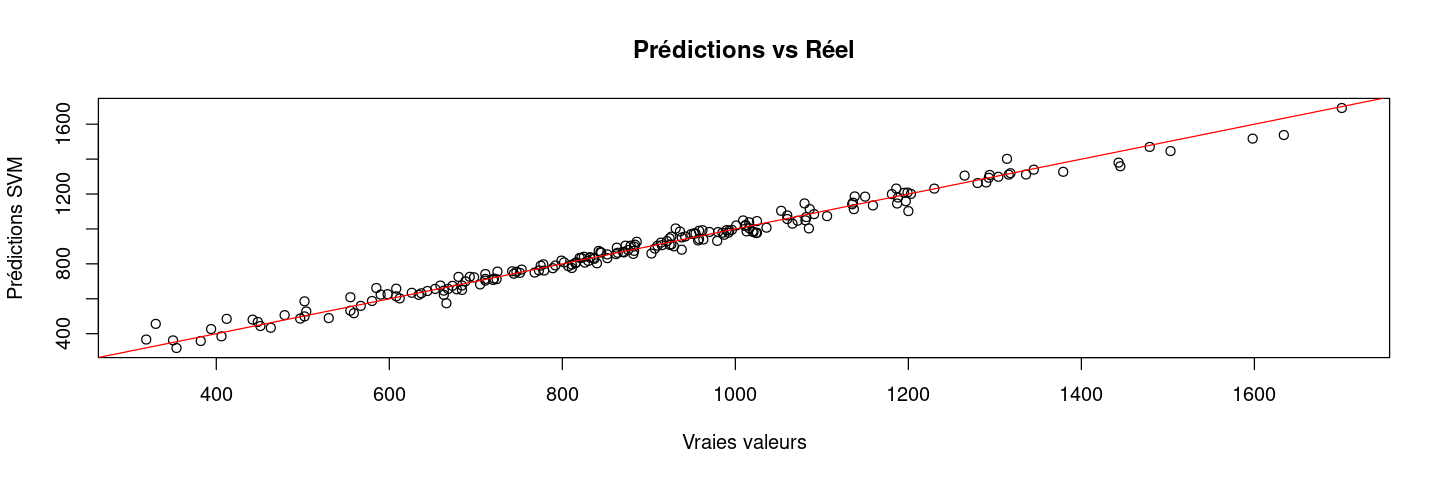

In [37]:
#install.packages("e1071")
library(e1071)
svm.reg0 = svm(Calories_Burned~., data = datappr)
summary(svm.reg0)

pred <- predict(svm.reg0, newdata = datestr)
plot(datestr$Calories_Burned, pred,
     xlab = "Vraies valeurs",
     ylab = "Prédictions SVM",
     main = "Prédictions vs Réel")
abline(0, 1, col = "red")  # ligne y=x
plot(svm.reg0, data = datappr)

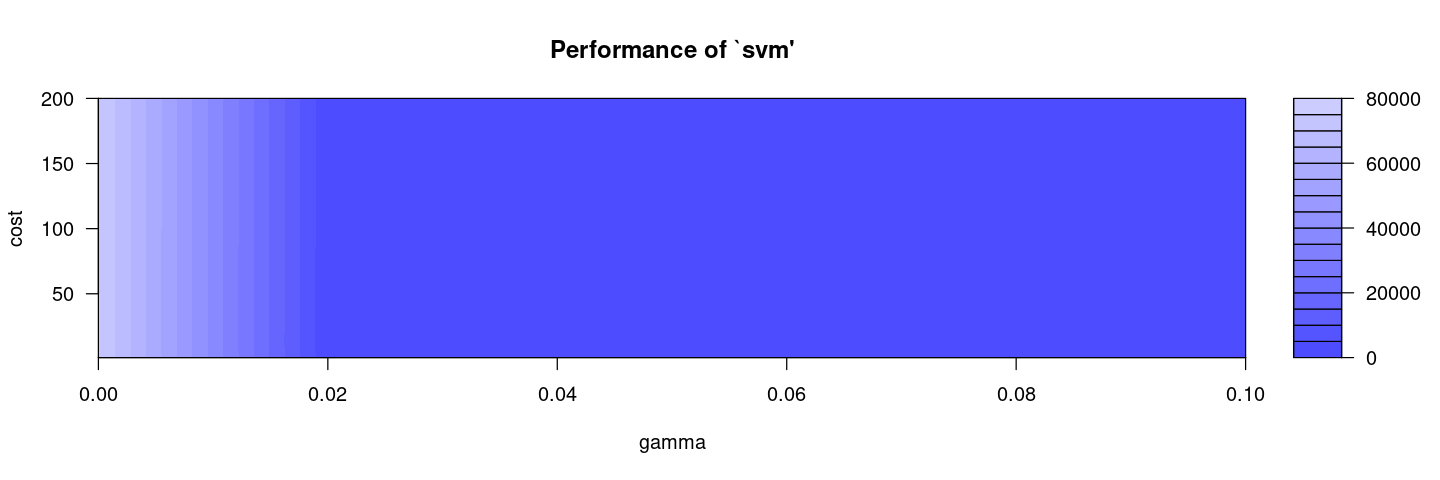

In [38]:
#set.seed(2021)
svm.reg.tune = tune.svm(Calories_Burned ~ ., data = datappr, type = "eps-regression", cost = c(1, 10, 50, 100, 150, 200), gamma = seq(0, 0.1, by = 0.02))
#traceback()
plot(svm.reg.tune)

Le plot que nous rend svm.reg.tune nous montre graphiquement pour quelles valeurs de cost et gamma on obtient les meilleurs résultats. On peut également directement récuperer ces valeurs grâce à l'option "$parameters" de svm.reg.tune, ce que nous allons faire dans la suite. 


Call:
svm(formula = Calories_Burned ~ ., data = datappr, cost = svm.reg.tune$best.parameters$cost, 
    gamma = svm.reg.tune$best.parameters$gamma)


Parameters:
   SVM-Type:  eps-regression 
 SVM-Kernel:  radial 
       cost:  10 
      gamma:  0.02 
    epsilon:  0.1 


Number of Support Vectors:  270






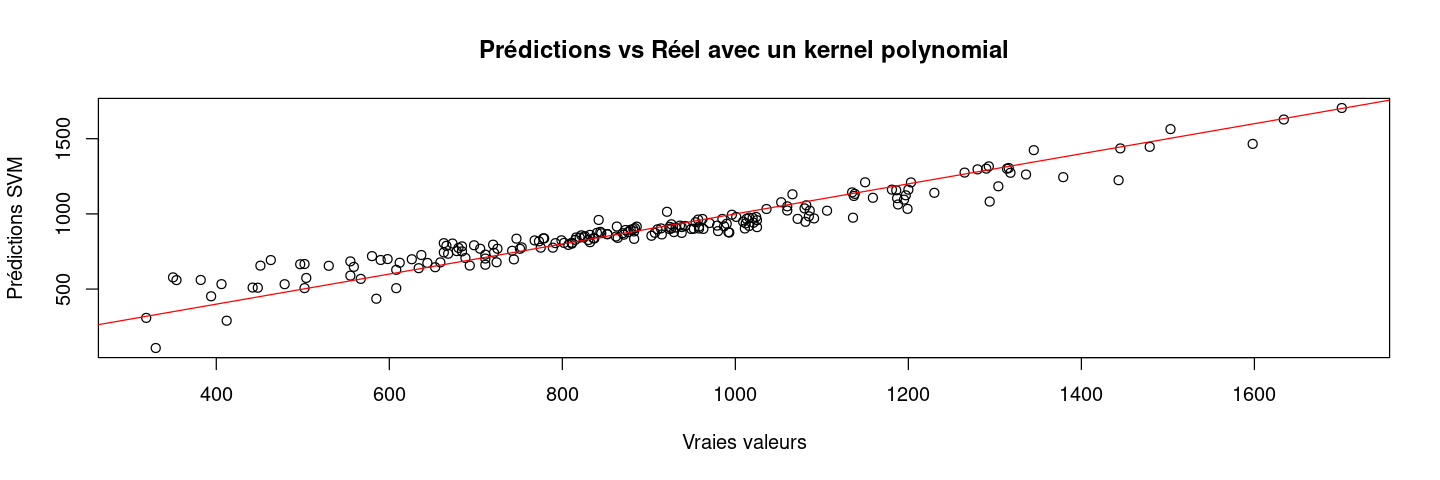

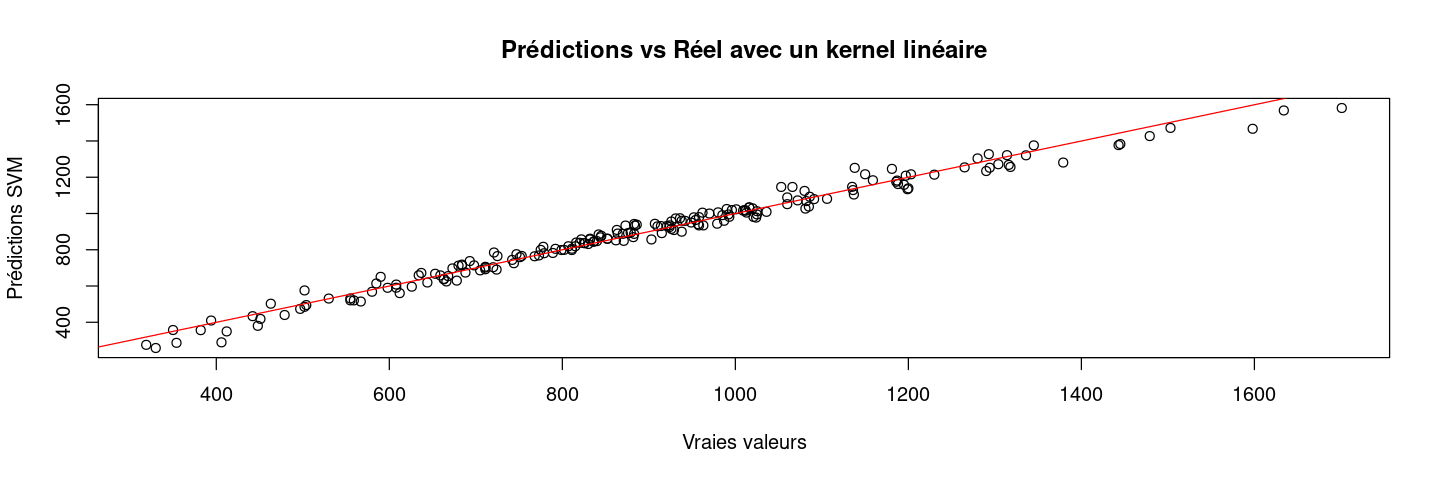

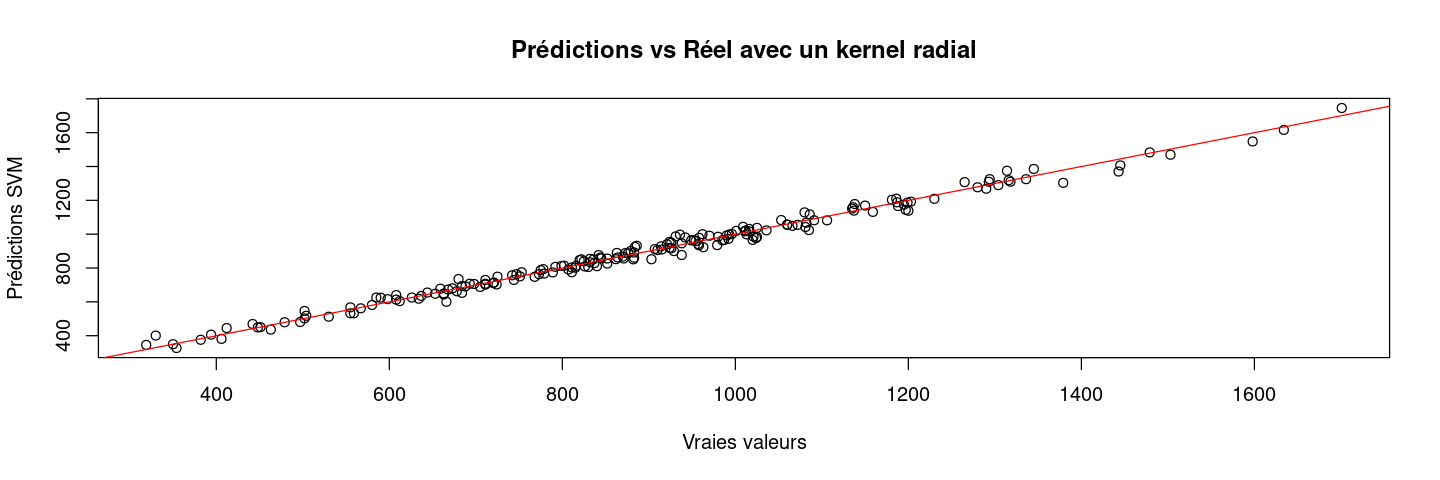

In [39]:
svm.reg = svm(Calories_Burned ~ ., data = datappr, cost = svm.reg.tune$best.parameters$cost, 
    gamma = svm.reg.tune$best.parameters$gamma)
summary(svm.reg)

# On récupère les meilleurs paramètres
best_cost <- svm.reg.tune$best.parameters$cost
best_gamma <- svm.reg.tune$best.parameters$gamma
# Entraînement du modèle final avec ces paramètres
final_model <- svm(
  Calories_Burned ~ ., 
  data = datappr,
  type = "eps-regression",
  kernel = "polynomial",     
  cost = best_cost,
  gamma = best_gamma
)

final_model2 <- svm(
  Calories_Burned ~ ., 
  data = datappr,
  type = "eps-regression",
  kernel = "linear",     
  cost = best_cost,
  gamma = best_gamma
)

final_model3 <- svm(
  Calories_Burned ~ ., 
  data = datappr,
  type = "eps-regression",
  kernel = "radial",     
  cost = best_cost,
  gamma = best_gamma
)

#svm.reg.tune = tune.svm(Calories_Burned~., data = datappr, kernel = c("linear","polynomial", "radial"), cost=svm.reg.tune$best.parameters$cost, gamma = svm.reg.tune$best.parameters$gamma)
#best_ker <- svm.reg.tune$best.parameters$kernel
# Prédiction sur le jeu de test
y_pred <- predict(final_model, newdata = datestr)
y_pred2 <- predict(final_model2, newdata = datestr)
y_pred3 <- predict(final_model3, newdata = datestr)
plot(datestr$Calories_Burned, y_pred,
     xlab = "Vraies valeurs",
     ylab = "Prédictions SVM",
     main = "Prédictions vs Réel avec un kernel polynomial")
abline(0, 1, col = "red")
plot(datestr$Calories_Burned, y_pred2,
     xlab = "Vraies valeurs",
     ylab = "Prédictions SVM",
     main = "Prédictions vs Réel avec un kernel linéaire")
abline(0, 1, col = "red")
plot(datestr$Calories_Burned, y_pred3,
     xlab = "Vraies valeurs",
     ylab = "Prédictions SVM",
     main = "Prédictions vs Réel avec un kernel radial")
abline(0, 1, col = "red")

#rmse_val <- rmse(datestr$Calories_Burned, y_pred)
#cat("RMSE sur test final :", rmse_val, "\n")

On remarque ici que les meilleurs résultats obtenus sont pour un kernel radial. On sélectionne ainsi le modèle avec les paramètres optimisés : n 
 SVM-Kernel:  radial 
       cost:  3.5 
      gamma:  0.02 
    epsilon:  0.1 


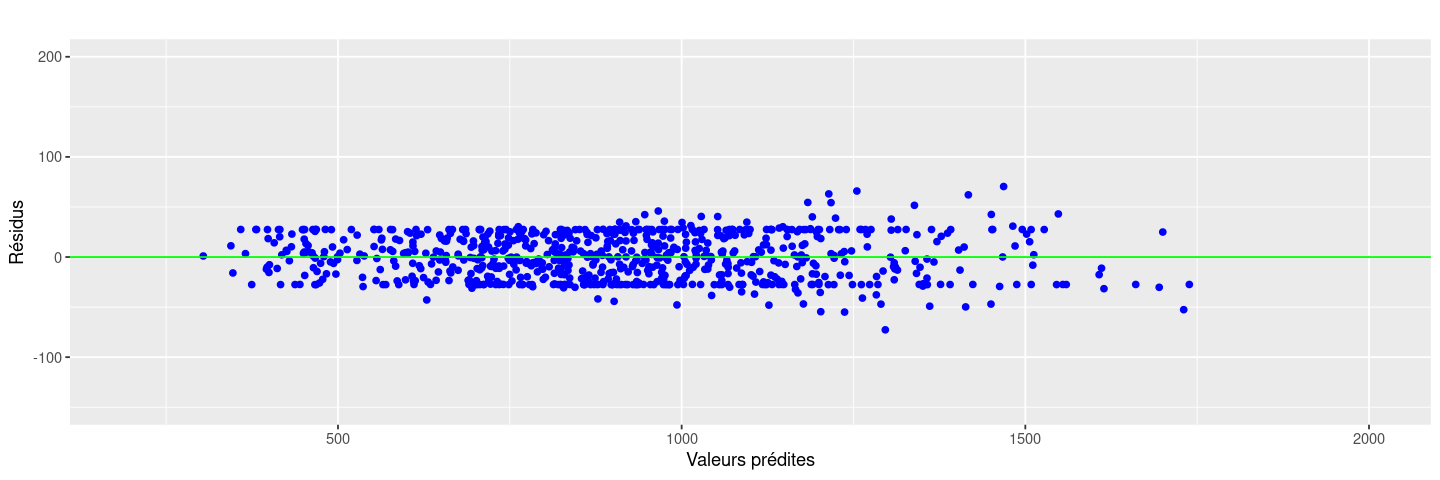

In [40]:
#calcul puis graphe des résidus
fit.svmr=fit.svmr=svm.reg$fitted
res.svmr=fit.svmr-datappr[,"Calories_Burned"]
gplot.res(fit.svmr,res.svmr,titre="")

On observe bien ici un "effet couloir" sur les résidus de notre modèle SVM, ce qui signifie que les valeurs restent plus ou moins bien (à quelques valeurs près sur les bords) dans le couloir imposé par $\epsilon$.

In [41]:
cv_radial <- svm(Calories_Burned ~ ., data = datappr,
                 type = "eps-regression", kernel = "radial",
                 cost = best_cost, gamma = best_gamma, cross = 10)

cv_linear <- svm(Calories_Burned ~ ., data = datappr,
                 type = "eps-regression", kernel = "linear",
                 cost = best_cost, gamma = best_gamma, cross = 10)

cv_poly <- svm(Calories_Burned ~ ., data = datappr,
               type = "eps-regression", kernel = "polynomial",
               cost = best_cost, gamma = best_gamma, cross = 10)

# Voir les performances
summary(cv_radial)
summary(cv_linear)
summary(cv_poly)

Warning message in cret$cresults * scale.factor:
“Le recyclage d’un tableau (array) de longueur 1 dans un calcul arithmétique vecteur-tableau est obsolète.
  Utilisez c() ou as.vector() à la place.”
Warning message in cret$cresults * scale.factor:
“Le recyclage d’un tableau (array) de longueur 1 dans un calcul arithmétique vecteur-tableau est obsolète.
  Utilisez c() ou as.vector() à la place.”
Warning message in cret$cresults * scale.factor:
“Le recyclage d’un tableau (array) de longueur 1 dans un calcul arithmétique vecteur-tableau est obsolète.
  Utilisez c() ou as.vector() à la place.”



Call:
svm(formula = Calories_Burned ~ ., data = datappr, type = "eps-regression", 
    kernel = "radial", cost = best_cost, gamma = best_gamma, cross = 10)


Parameters:
   SVM-Type:  eps-regression 
 SVM-Kernel:  radial 
       cost:  10 
      gamma:  0.02 
    epsilon:  0.1 


Number of Support Vectors:  270



10-fold cross-validation on training data:

Total Mean Squared Error: 929.1525 
Squared Correlation Coefficient: 0.9877129 
Mean Squared Errors:
 944.5171 791.311 628.1257 1145.368 929.8956 955.5594 929.0771 979.1218 999.8039 989.2811 





Call:
svm(formula = Calories_Burned ~ ., data = datappr, type = "eps-regression", 
    kernel = "linear", cost = best_cost, gamma = best_gamma, cross = 10)


Parameters:
   SVM-Type:  eps-regression 
 SVM-Kernel:  linear 
       cost:  10 
      gamma:  0.02 
    epsilon:  0.1 


Number of Support Vectors:  362



10-fold cross-validation on training data:

Total Mean Squared Error: 1680.304 
Squared Correlation Coefficient: 0.9777668 
Mean Squared Errors:
 1283.023 1705.686 1520.646 1799.505 1393.476 2047.977 1992.428 1998.937 1356.297 1704.692 





Call:
svm(formula = Calories_Burned ~ ., data = datappr, type = "eps-regression", 
    kernel = "polynomial", cost = best_cost, gamma = best_gamma, 
    cross = 10)


Parameters:
   SVM-Type:  eps-regression 
 SVM-Kernel:  polynomial 
       cost:  10 
     degree:  3 
      gamma:  0.02 
     coef.0:  0 
    epsilon:  0.1 


Number of Support Vectors:  524



10-fold cross-validation on training data:

Total Mean Squared Error: 6698.671 
Squared Correlation Coefficient: 0.916809 
Mean Squared Errors:
 6586.752 6950.445 5060.454 7412.418 6086.738 7109.458 6246.146 7122.211 8210.233 6205.683 




On valide notre modèle par validation croisée, avec k=10. On obtient que le kernel radial a une bien meilleure performance avec une erreur quadratique moyenne totale de 914,51 (soit un équivalent calorique d'environ 6 cacahuètes, ce qui est une erreur raisonnable). En revanche, le kernel polynomial a une erreur quadratique moyenne totale de 12 844 (soit 113 cacahuètes!). Cela vient confirmer le fait que notre meilleur modèle découle d'un kernel radial. 

## Arbre optimal

### Arbre de régression

In [42]:
tree.reg=rpart(Calories_Burned~.,data=datappr,control=rpart.control(cp=0.001))

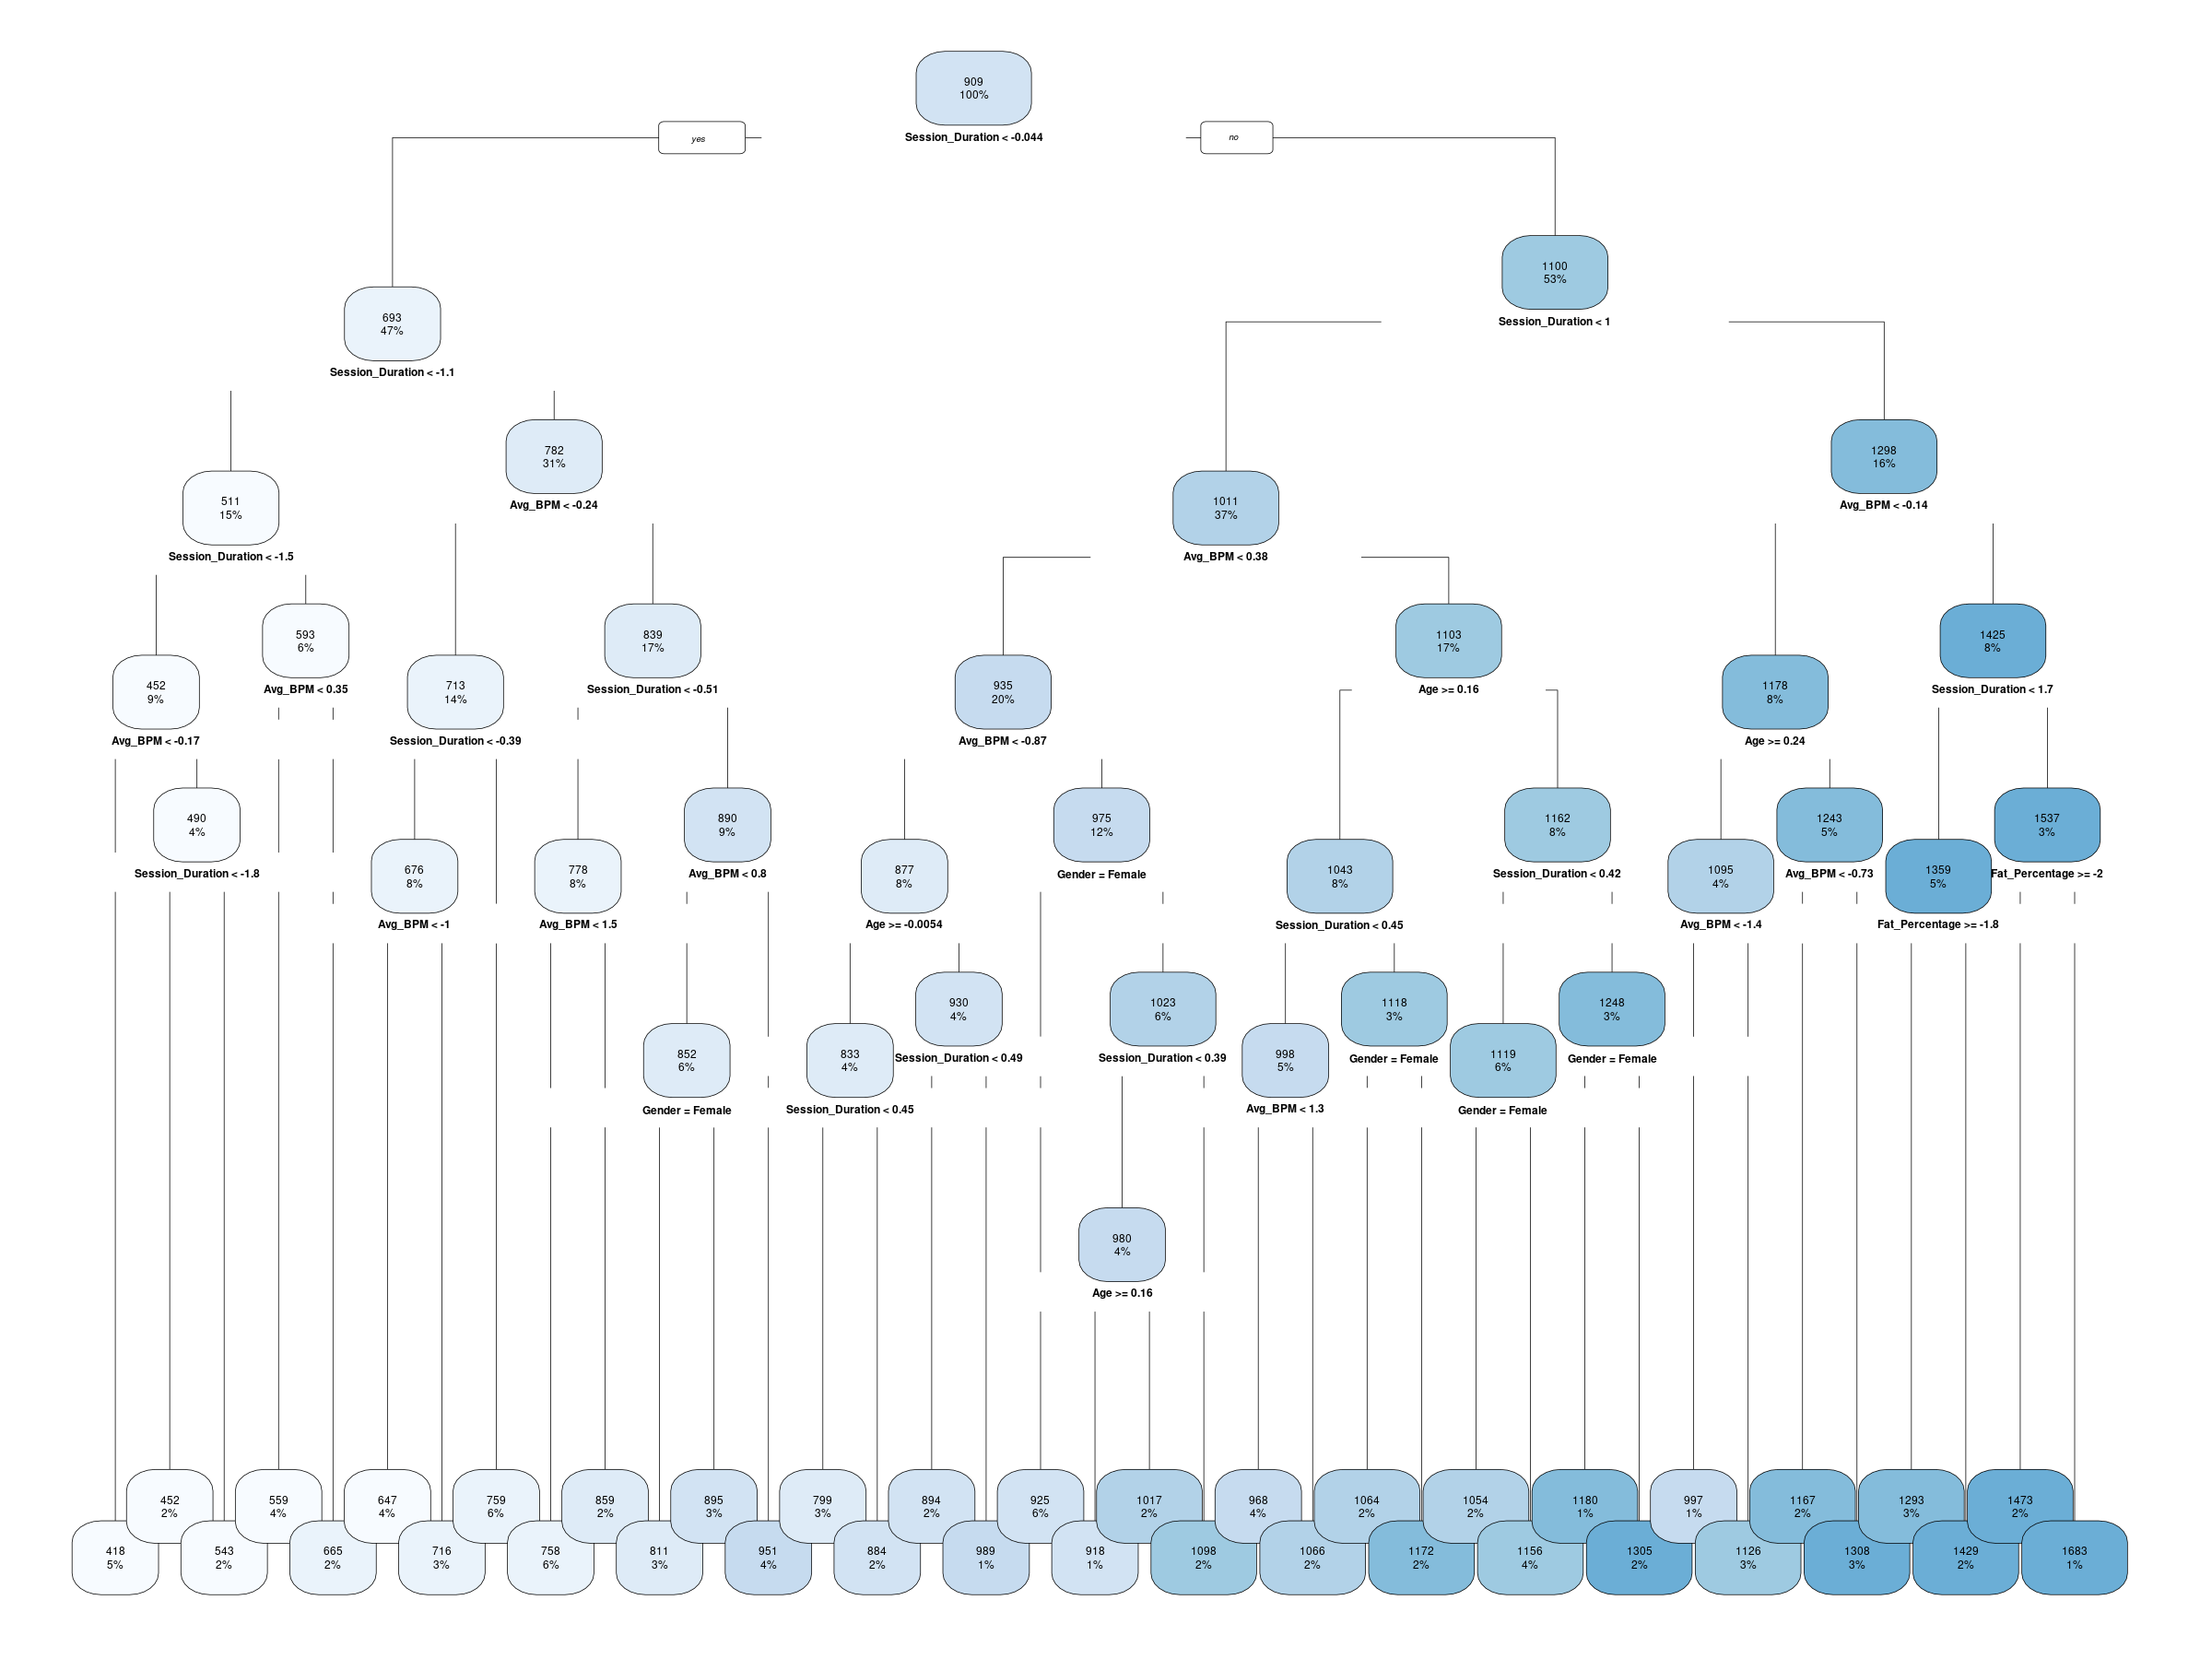

In [43]:
options(repr.plot.width = 20, repr.plot.height = 15)
rpart.plot(tree.reg, cex = 0.6)

L'arbre que nous optenons est assez dense, on ne peut pas vraiment dire qu'il soit explicable ni trop grand. Les paramètres ont été choisis de façon naïve, nous allons donc à présent chercher à les optimiser grâce à une validation. 

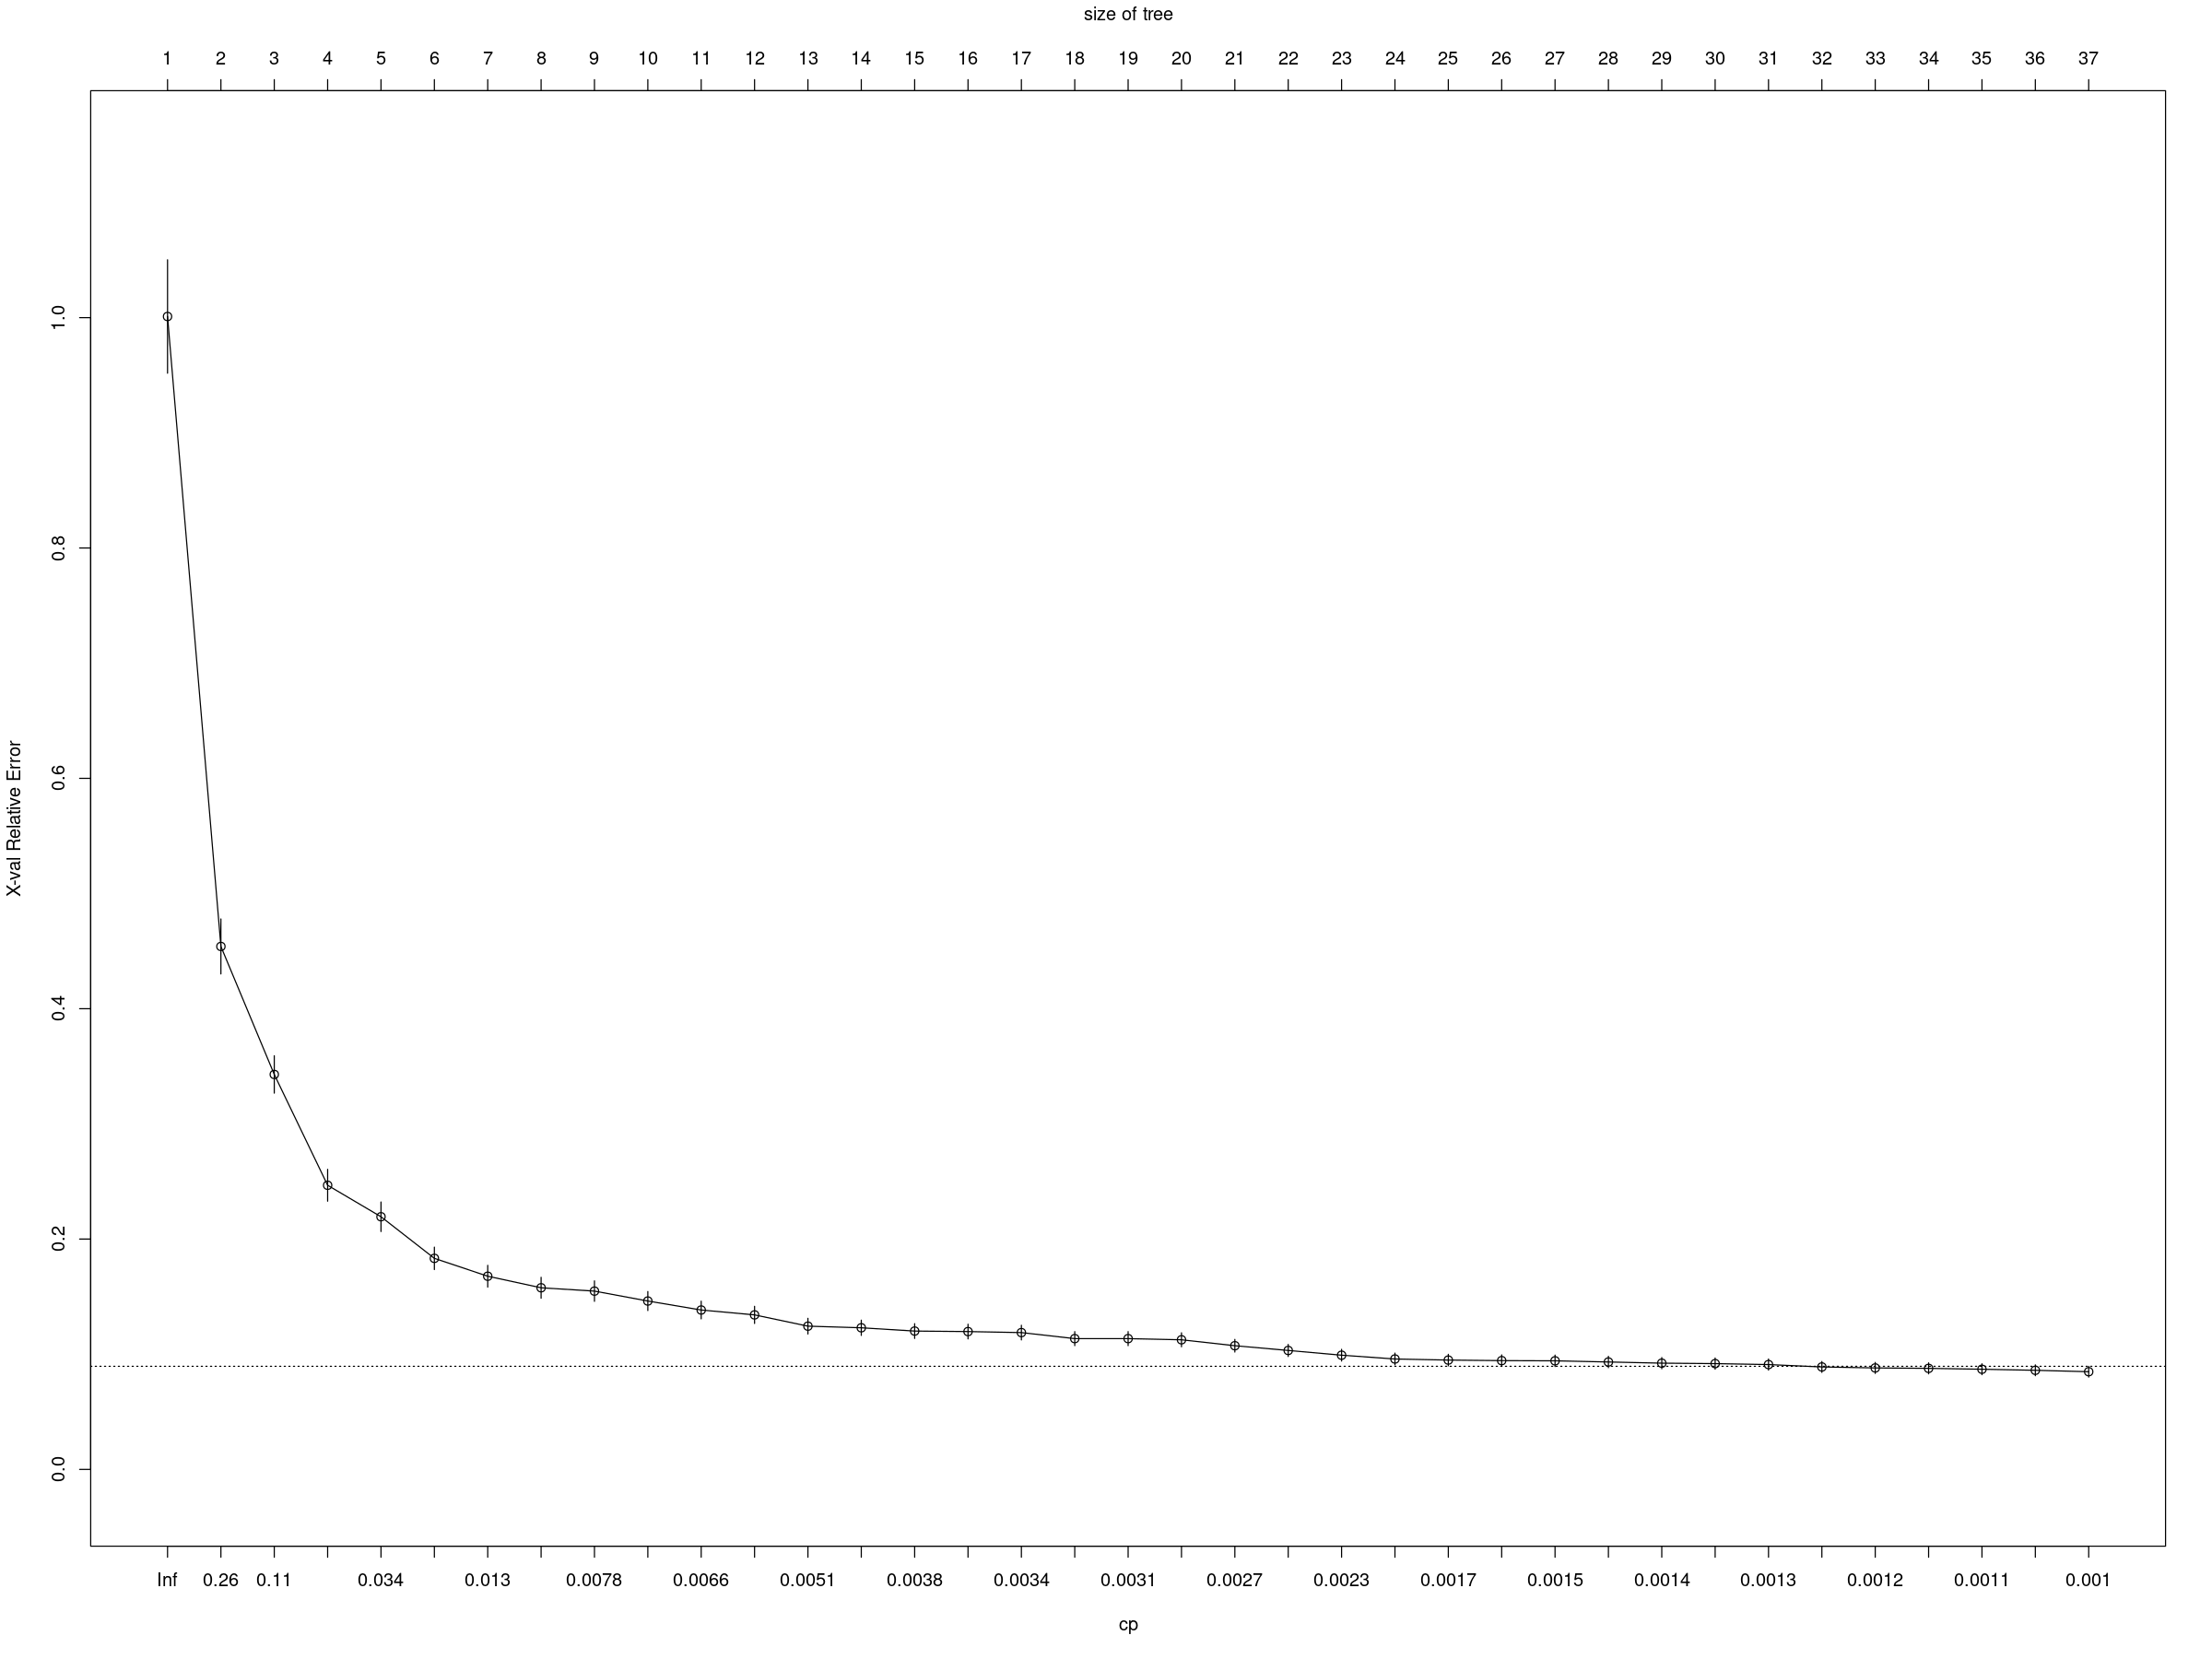

In [44]:
xmat<-xpred.rpart(tree.reg,xval=5)

CVerr<-apply((xmat-datappr[,"Calories_Burned"])^2,2,sum)

plotcp(tree.reg)

Grâce à ce graphique on obtient les résultats de la validation croisée. Nous voulons utiliser le cp qui minimise la MSE de généralisation de la CV, nous devrions donc prendre, d'après ce graphique le cp le plus petit, c'est à dire celui que nous avons pris naïvement. Mais nous avons vu que notre arbre n'était pas très explicable ainsi. L'erreur n'augmentant pas trop en augmentant le cp, nous avons décidé de prendre le plus grand cp encore dans l'intervalle du cp minimisant la MSE c'est à dire ici 0.0014.

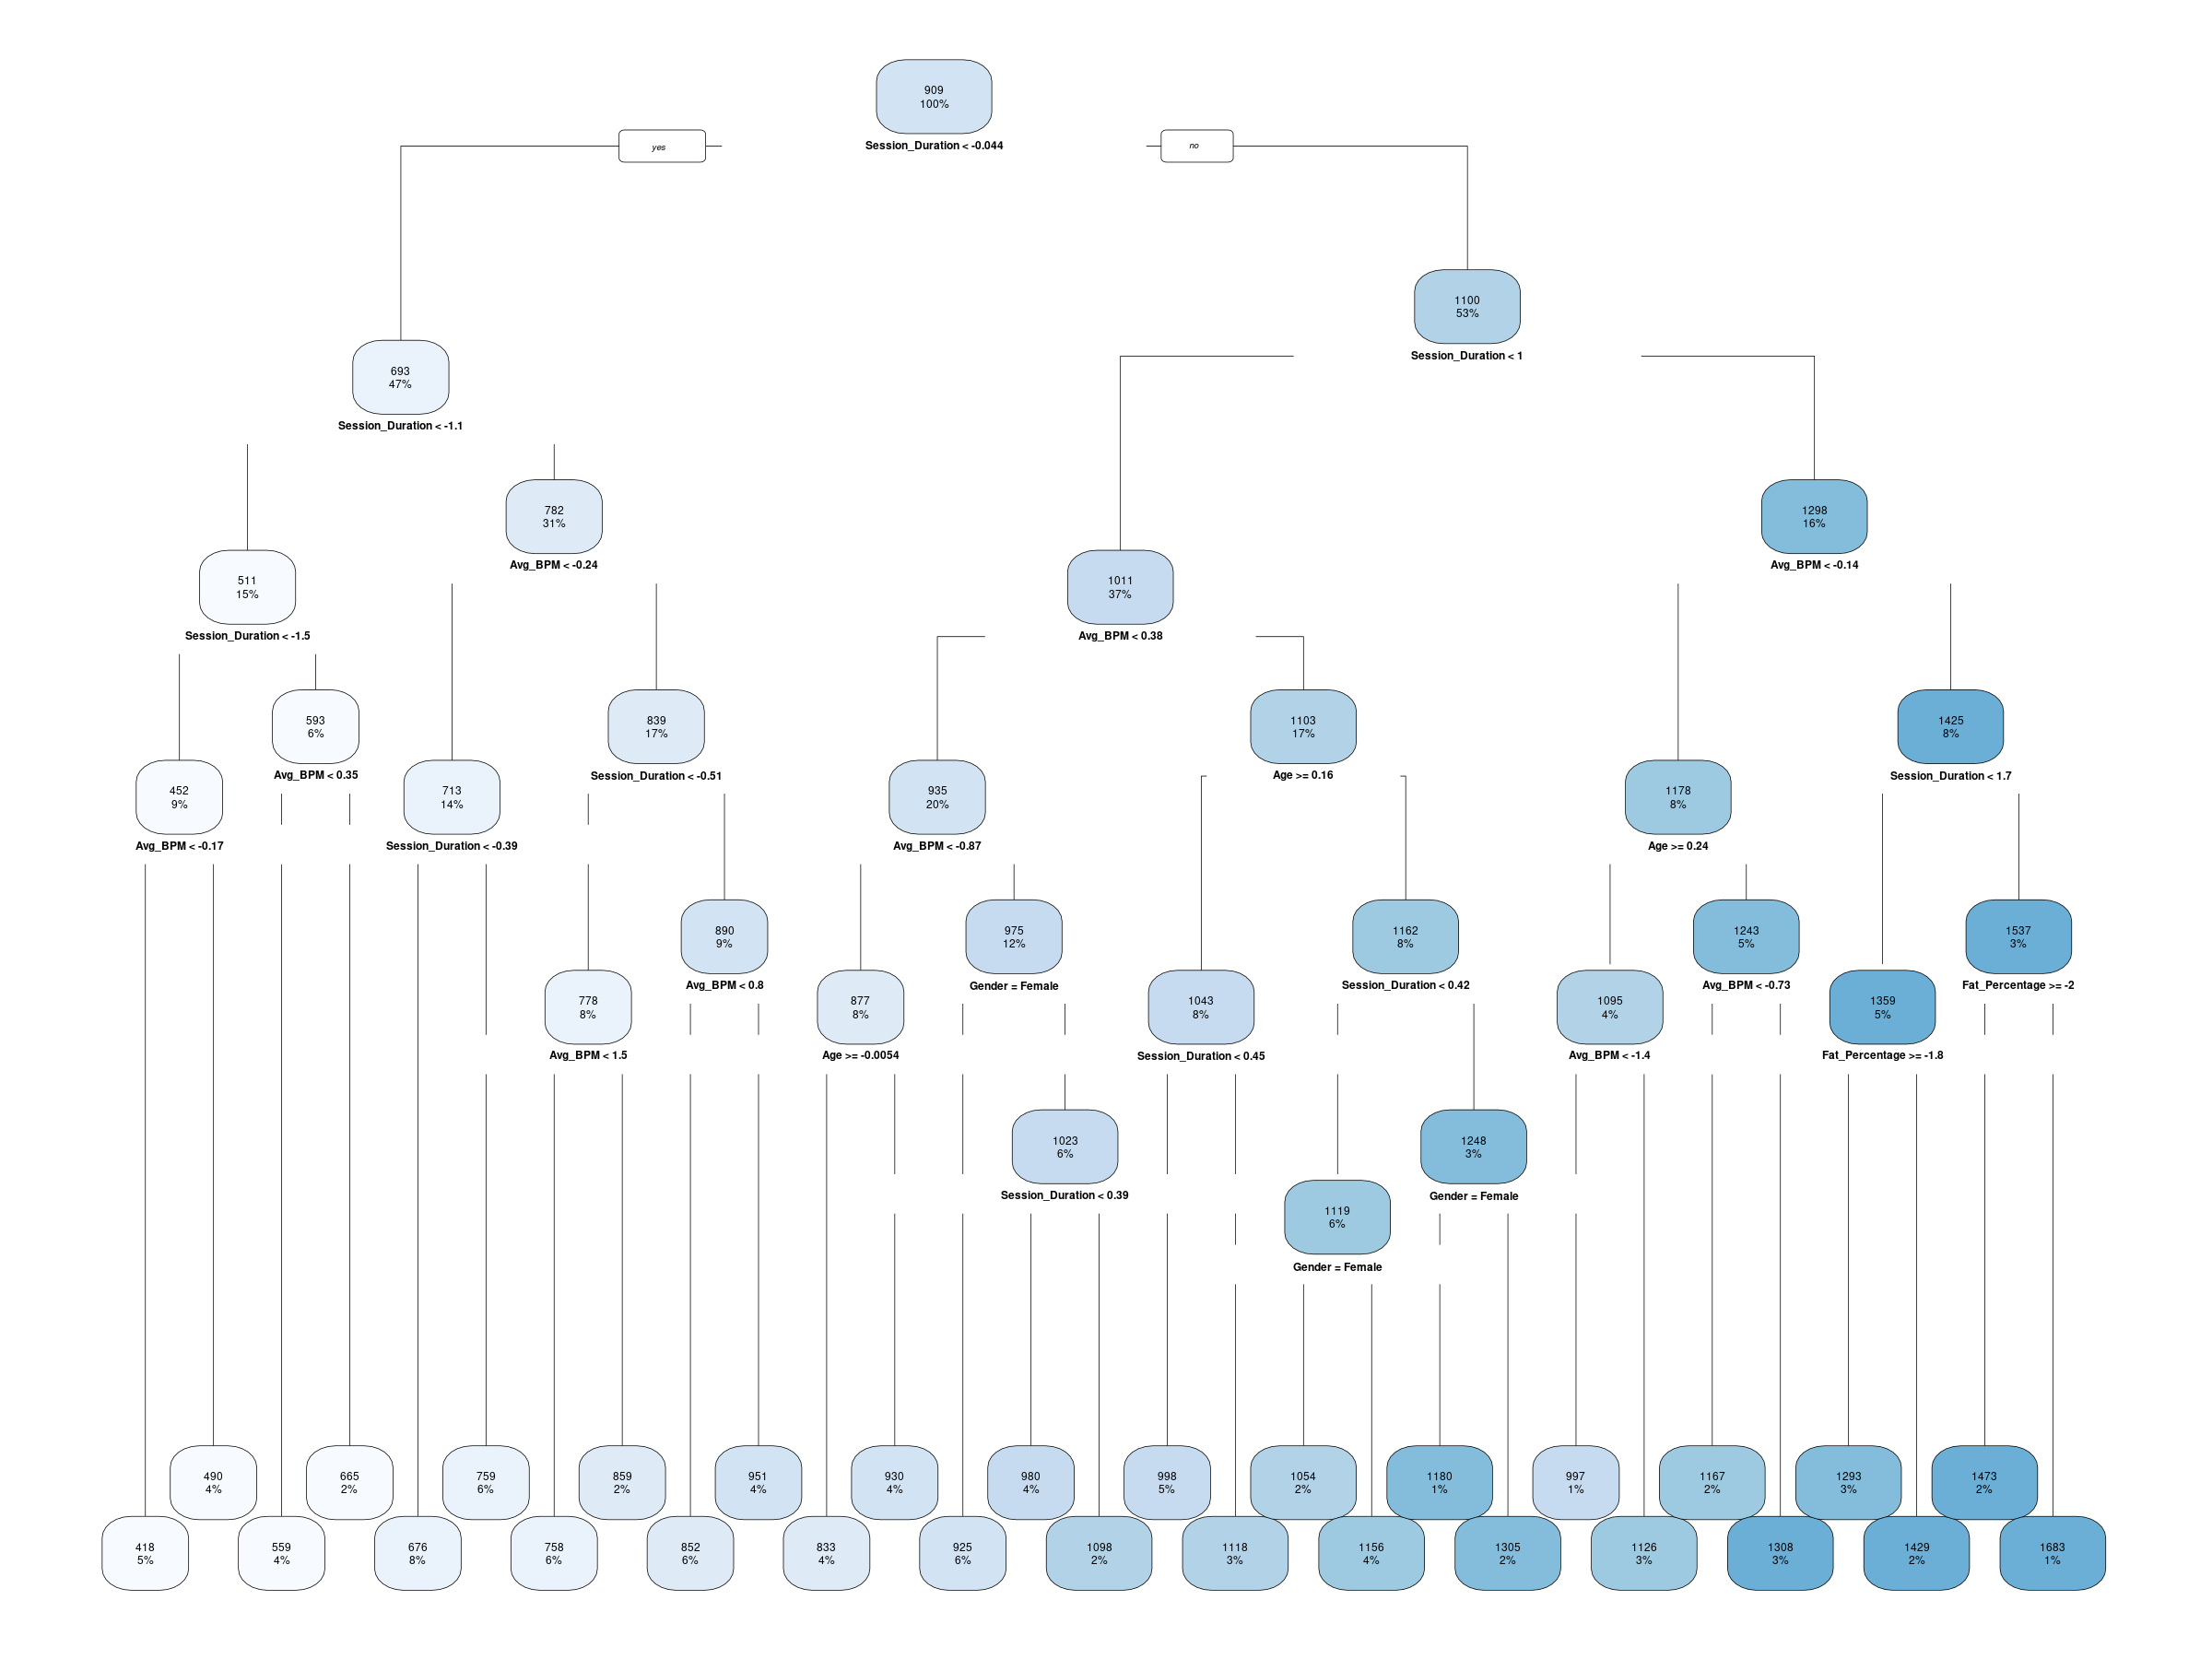

In [45]:
tree.reg=rpart(Calories_Burned~.,data=datappr,control=rpart.control(cp=0.0014))
rpart.plot(tree.reg, cex=0.6)

### Prévision de l'échantillon test

In [46]:
library(yardstick)
library(dplyr)
library(tibble)


Attachement du package : ‘yardstick’


Les objets suivants sont masqués depuis ‘package:Metrics’:

    accuracy, mae, mape, mase, precision, recall, rmse, smape


L'objet suivant est masqué depuis ‘package:readr’:

    spec




In [47]:
pred.treer = predict(tree.reg,newdata=datestr)

print(mse)

function (actual, predicted) 
{
    return(mean(se(actual, predicted)))
}
<bytecode: 0x65133029a2b0>
<environment: namespace:Metrics>


La MSE est bien plus grande que pour d'autres modèles que nous avon spu voir précédemment.

Warning message:
“Removed 11 rows containing missing values (`geom_point()`).”


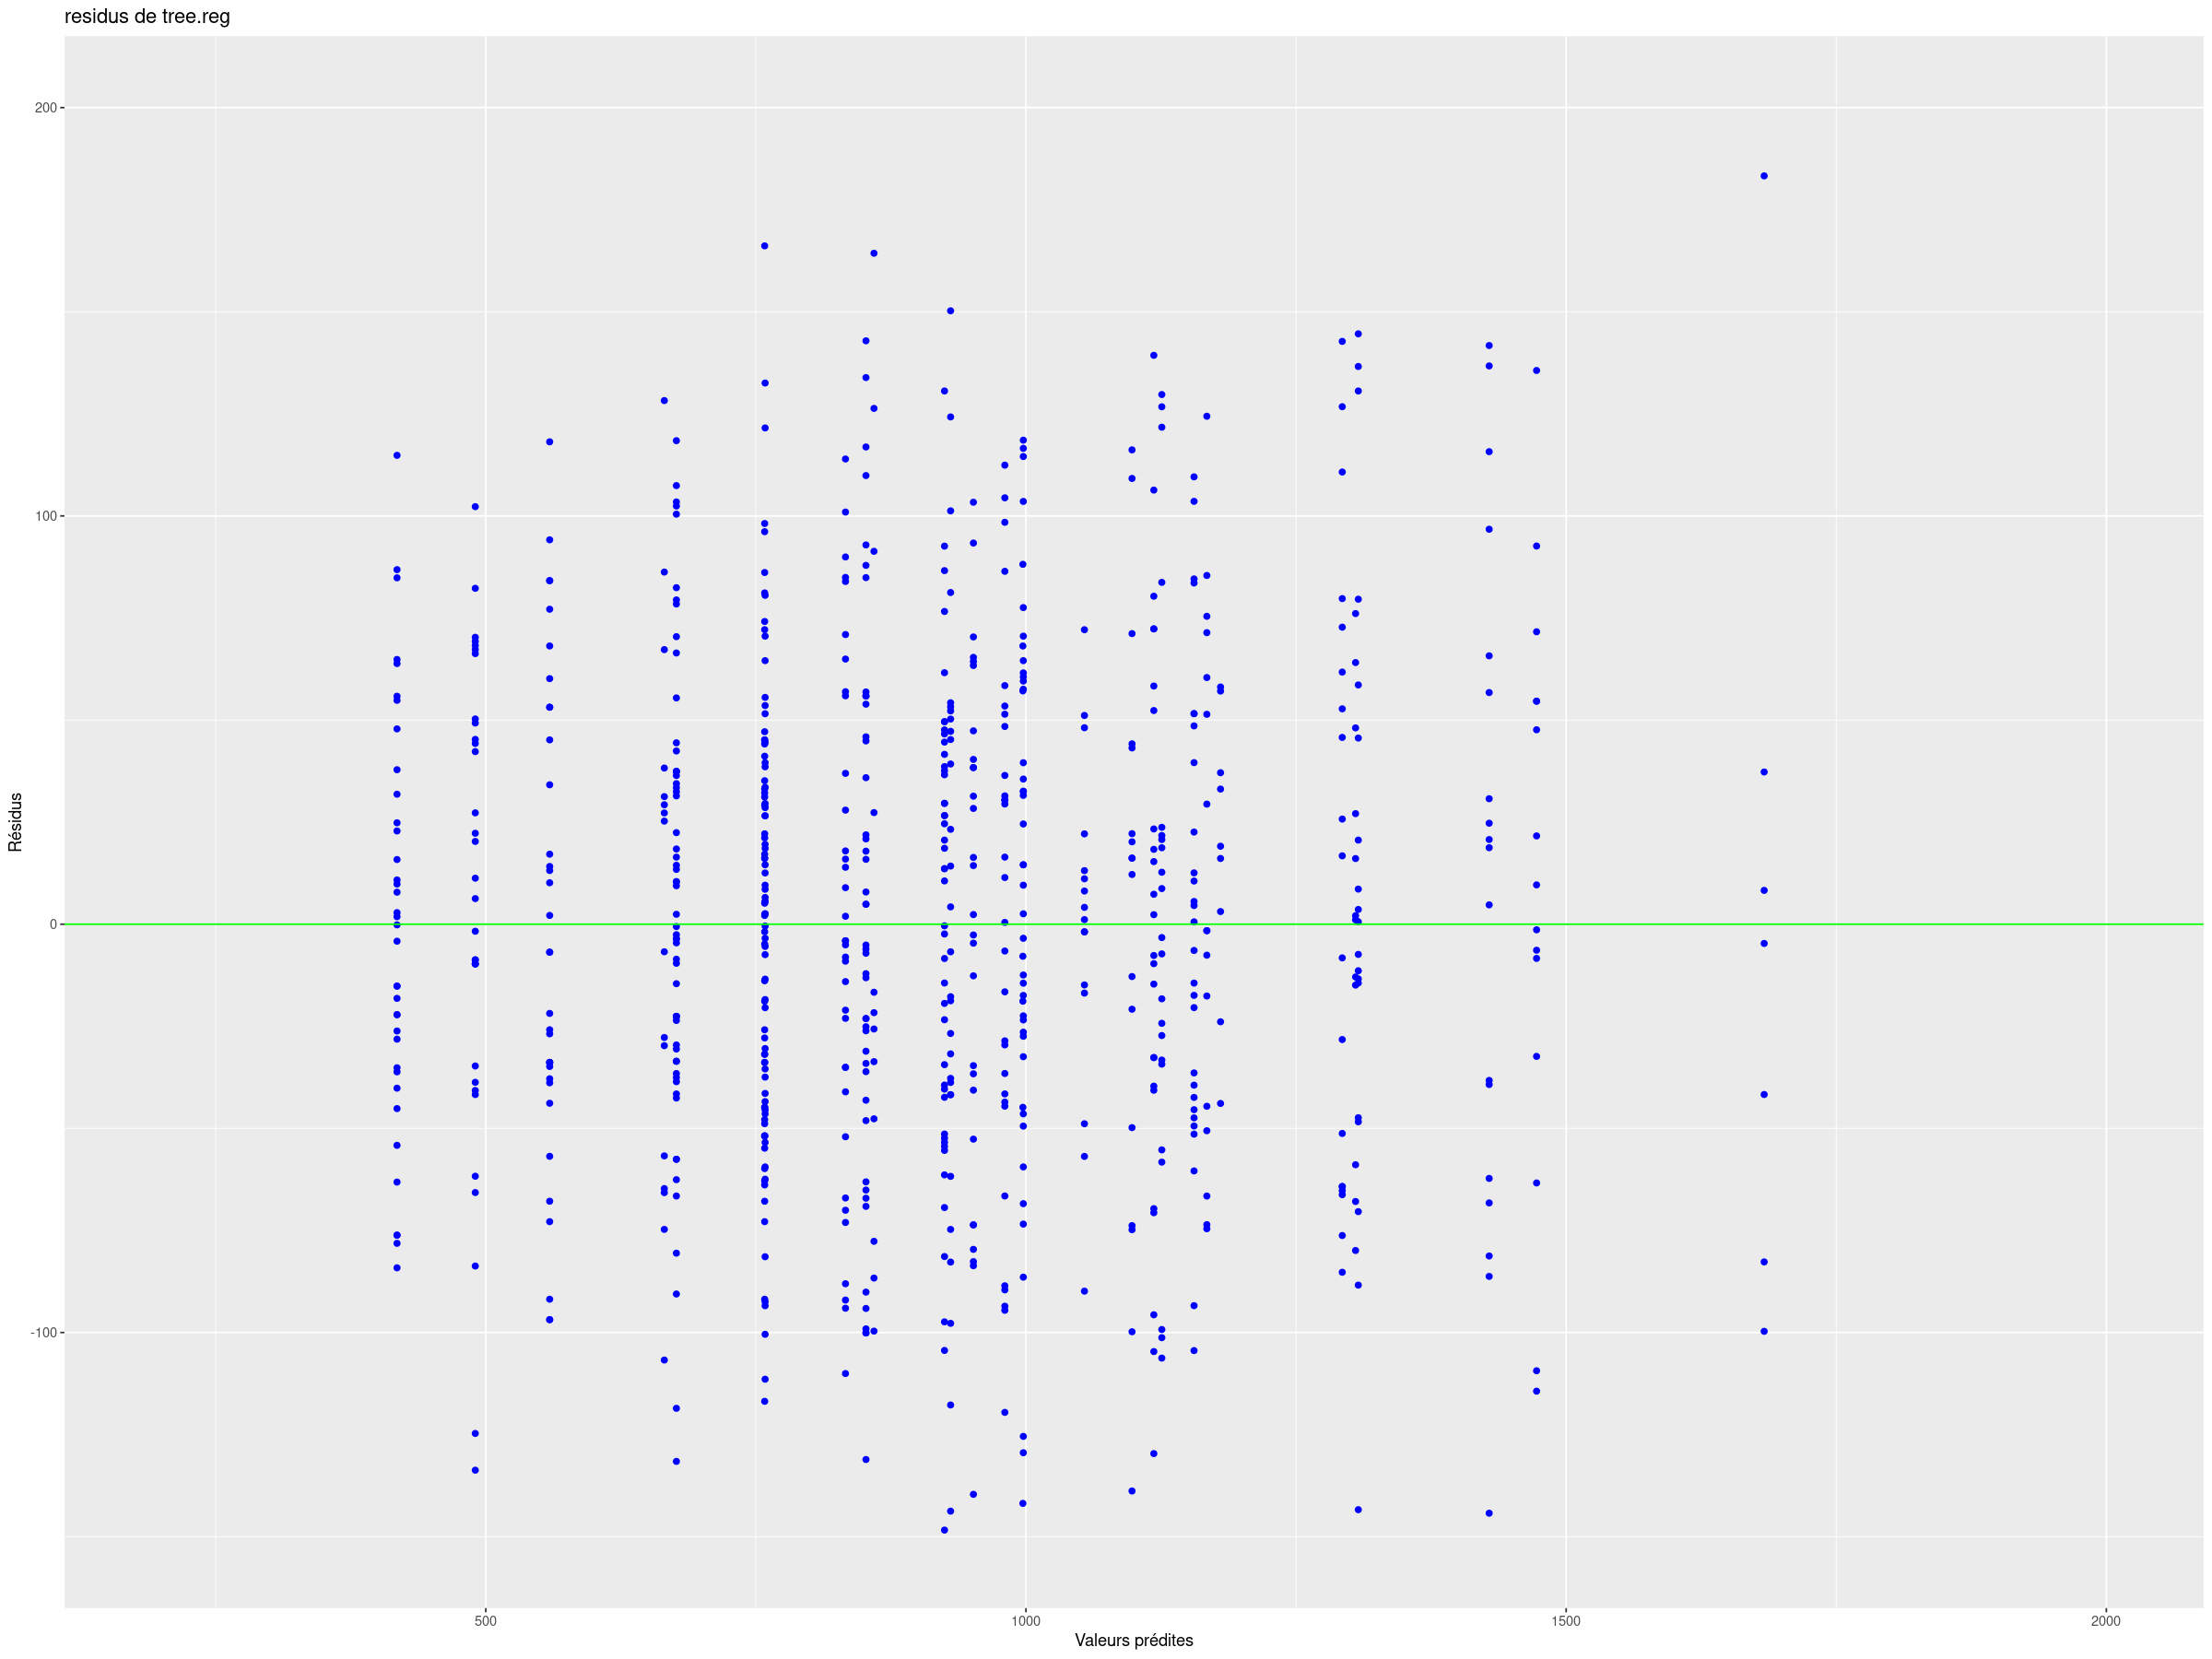

In [48]:
fit.tree=predict(tree.reg)
res.tree=fit.tree-datappr[,"Calories_Burned"]
gplot.res(fit.tree,res.tree,"residus de tree.reg")

Le graphe des résidus ci-dessus est très parlant, on voit clairement que notre arbre ne peut attribuer qu'un nombre fini de valeurs alors que la variable Calories_Burned est continue. On comprends donc pourquoi la MSE était plus grande, toutes les valeurs comprises dans un certain intervalle auront la même prédiction, ainsi même si le modèle est très bon l'erreur sera nécessairement plus grande puisqu'il est très difficile de prédire exactement la bonne valeur.

## Forêt aléatoire

### Régression

In [49]:
library(randomForest)
library(e1071)

randomForest 4.7-1.2

Type rfNews() to see new features/changes/bug fixes.


Attachement du package : ‘randomForest’


L'objet suivant est masqué depuis ‘package:gridExtra’:

    combine


L'objet suivant est masqué depuis ‘package:dplyr’:

    combine


L'objet suivant est masqué depuis ‘package:ggplot2’:

    margin




In [50]:
rf.reg=randomForest(Calories_Burned~., data=datappr,xtest=datestr[,-8],ytest=datestr[,"Calories_Burned"],
   ntree=500,do.trace=50,importance=TRUE)

     |      Out-of-bag   |       Test set    |
Tree |      MSE  %Var(y) |      MSE  %Var(y) |
  50 |     5038     6.69 |     3426     4.90 |
 100 |     4524     6.01 |     3357     4.81 |
 150 |     4358     5.79 |     3317     4.75 |
 200 |     4338     5.76 |     3289     4.71 |
 250 |     4198     5.58 |     3245     4.65 |
 300 |     4095     5.44 |     3160     4.52 |
 350 |     4112     5.46 |     3201     4.58 |
 400 |     4056     5.39 |     3193     4.57 |
 450 |     4062     5.40 |     3167     4.53 |
 500 |     4018     5.34 |     3160     4.52 |



Parameter tuning of ‘randomForest’:

- sampling method: 10-fold cross validation 

- best parameters:
 mtry
   12

- best performance: 1961.358 



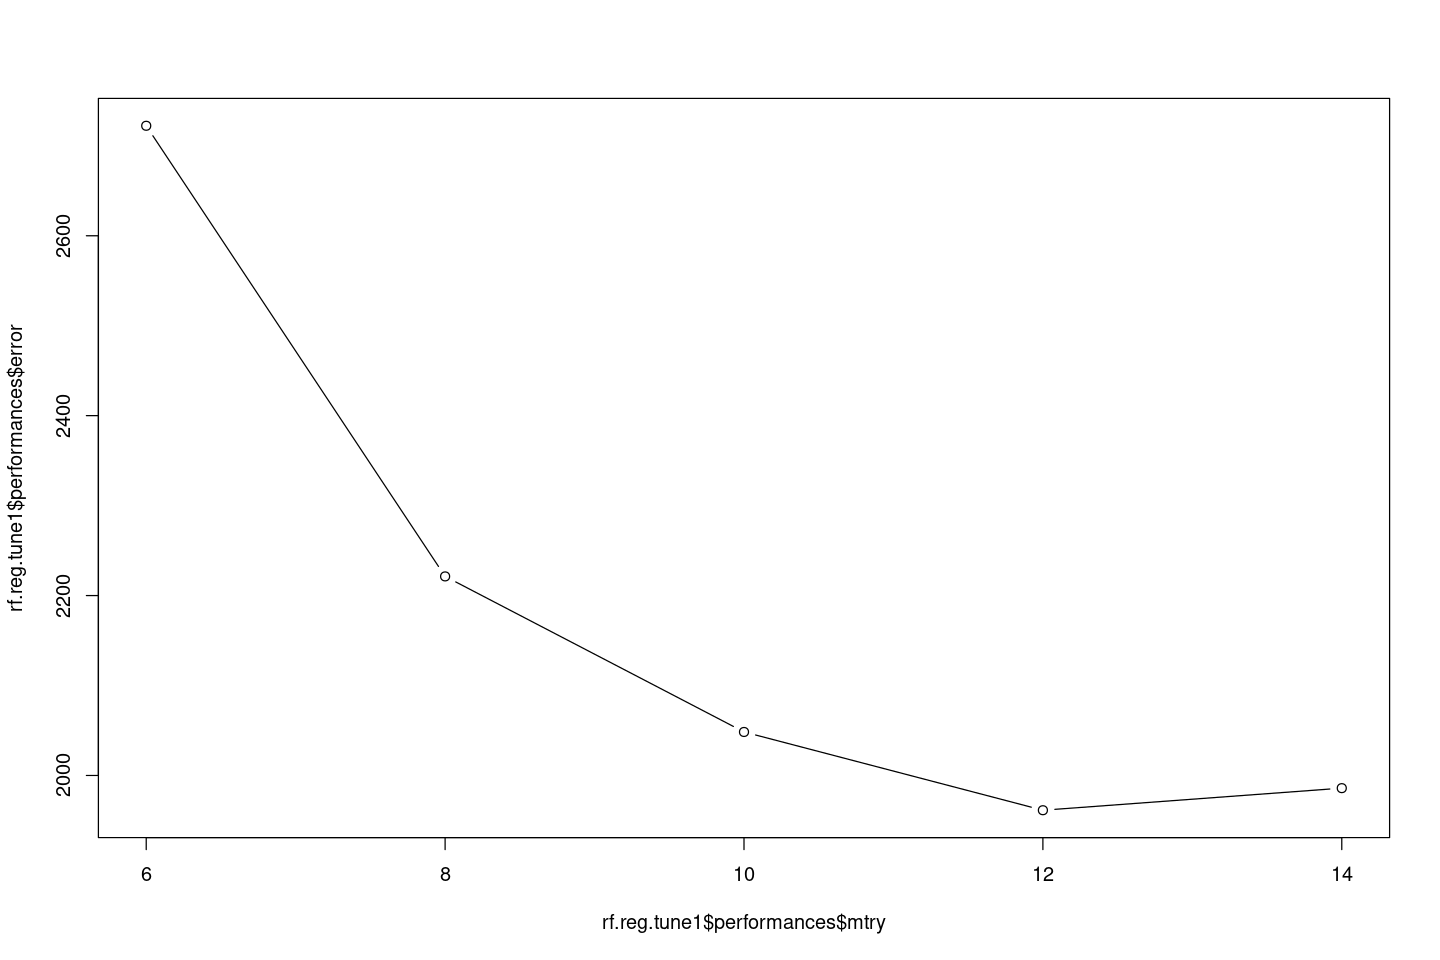

In [51]:
options(repr.plot.width = 12, repr.plot.height = 8)
rf.reg.tune1=tune.randomForest(Calories_Burned~., 
                              data = datappr,ntrees = 200, mtry = c(6,8,10,12,14),
                              maxit =200, linout = TRUE) 
print(rf.reg.tune1) 
plot(rf.reg.tune1$performances$mtry, rf.reg.tune1$performances$error, type = 'b')


Parameter tuning of ‘randomForest’:

- sampling method: 10-fold cross validation 

- best parameters:
 mtry
   12

- best performance: 1979.368 



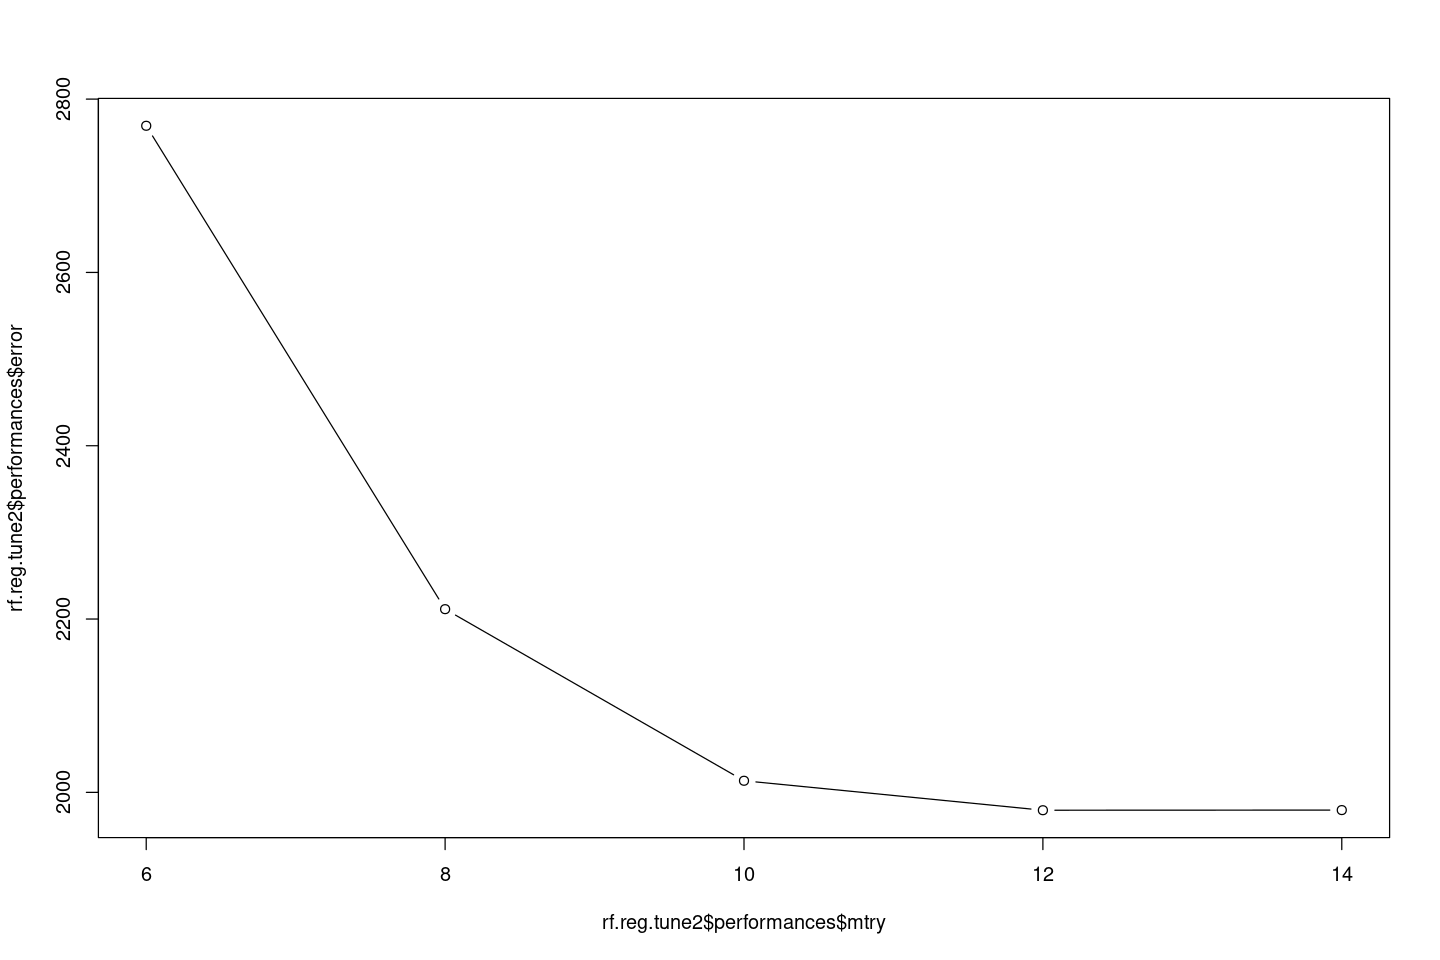

In [52]:
rf.reg.tune2=tune.randomForest(Calories_Burned~., 
                              data = datappr,ntrees = 300, mtry = c(6,8,10,12,14),
                              maxit =200, linout = TRUE) 
print(rf.reg.tune2) 
plot(rf.reg.tune2$performances$mtry, rf.reg.tune2$performances$error, type = 'b')



Parameter tuning of ‘randomForest’:

- sampling method: 10-fold cross validation 

- best parameters:
 mtry
   12

- best performance: 1997.682 



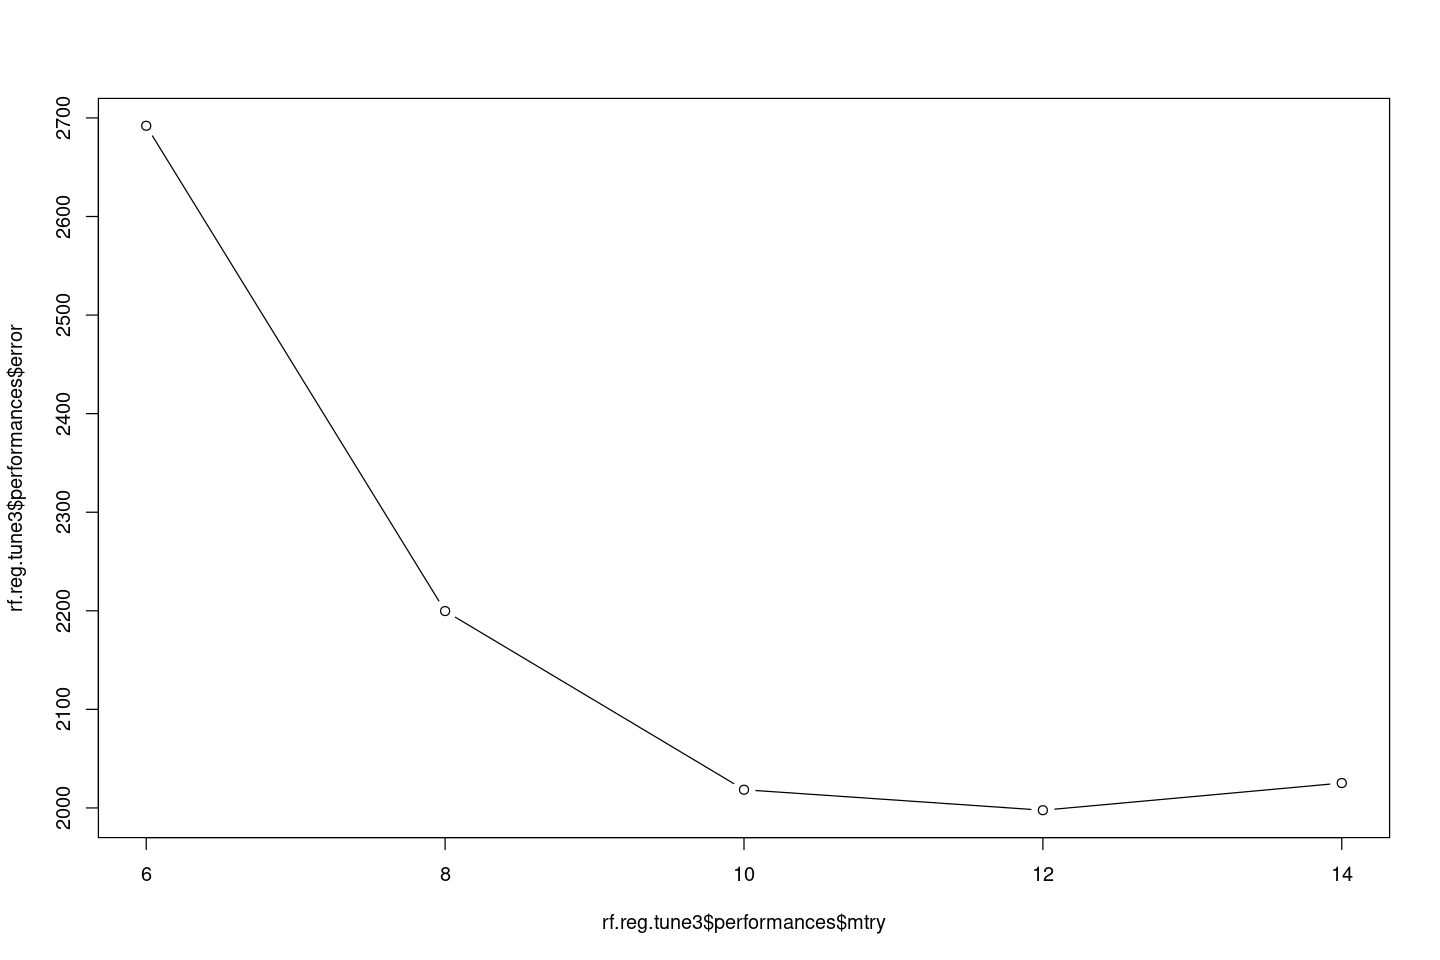

In [53]:
rf.reg.tune3=tune.randomForest(Calories_Burned~., 
                              data = datappr,ntrees = 400, mtry = c(6,8,10,12,14),
                              maxit =200, linout = TRUE) 
print(rf.reg.tune3) 
plot(rf.reg.tune3$performances$mtry, rf.reg.tune3$performances$error, type = 'b')


In [54]:
rf.reg=randomForest(Calories_Burned~., data=datappr,xtest=datestr[,-8],ytest=datestr[,"Calories_Burned"],
   ntree=300,do.trace=50,importance=TRUE, mtry=12)

     |      Out-of-bag   |       Test set    |
Tree |      MSE  %Var(y) |      MSE  %Var(y) |
  50 |     2172     2.89 |     1805     2.58 |
 100 |     1931     2.57 |     1787     2.56 |
 150 |     1914     2.54 |     1779     2.55 |
 200 |     1882     2.50 |     1740     2.49 |
 250 |     1871     2.49 |     1757     2.51 |
 300 |     1840     2.44 |     1748     2.50 |


Warning message:
“Removed 4 rows containing missing values (`geom_point()`).”


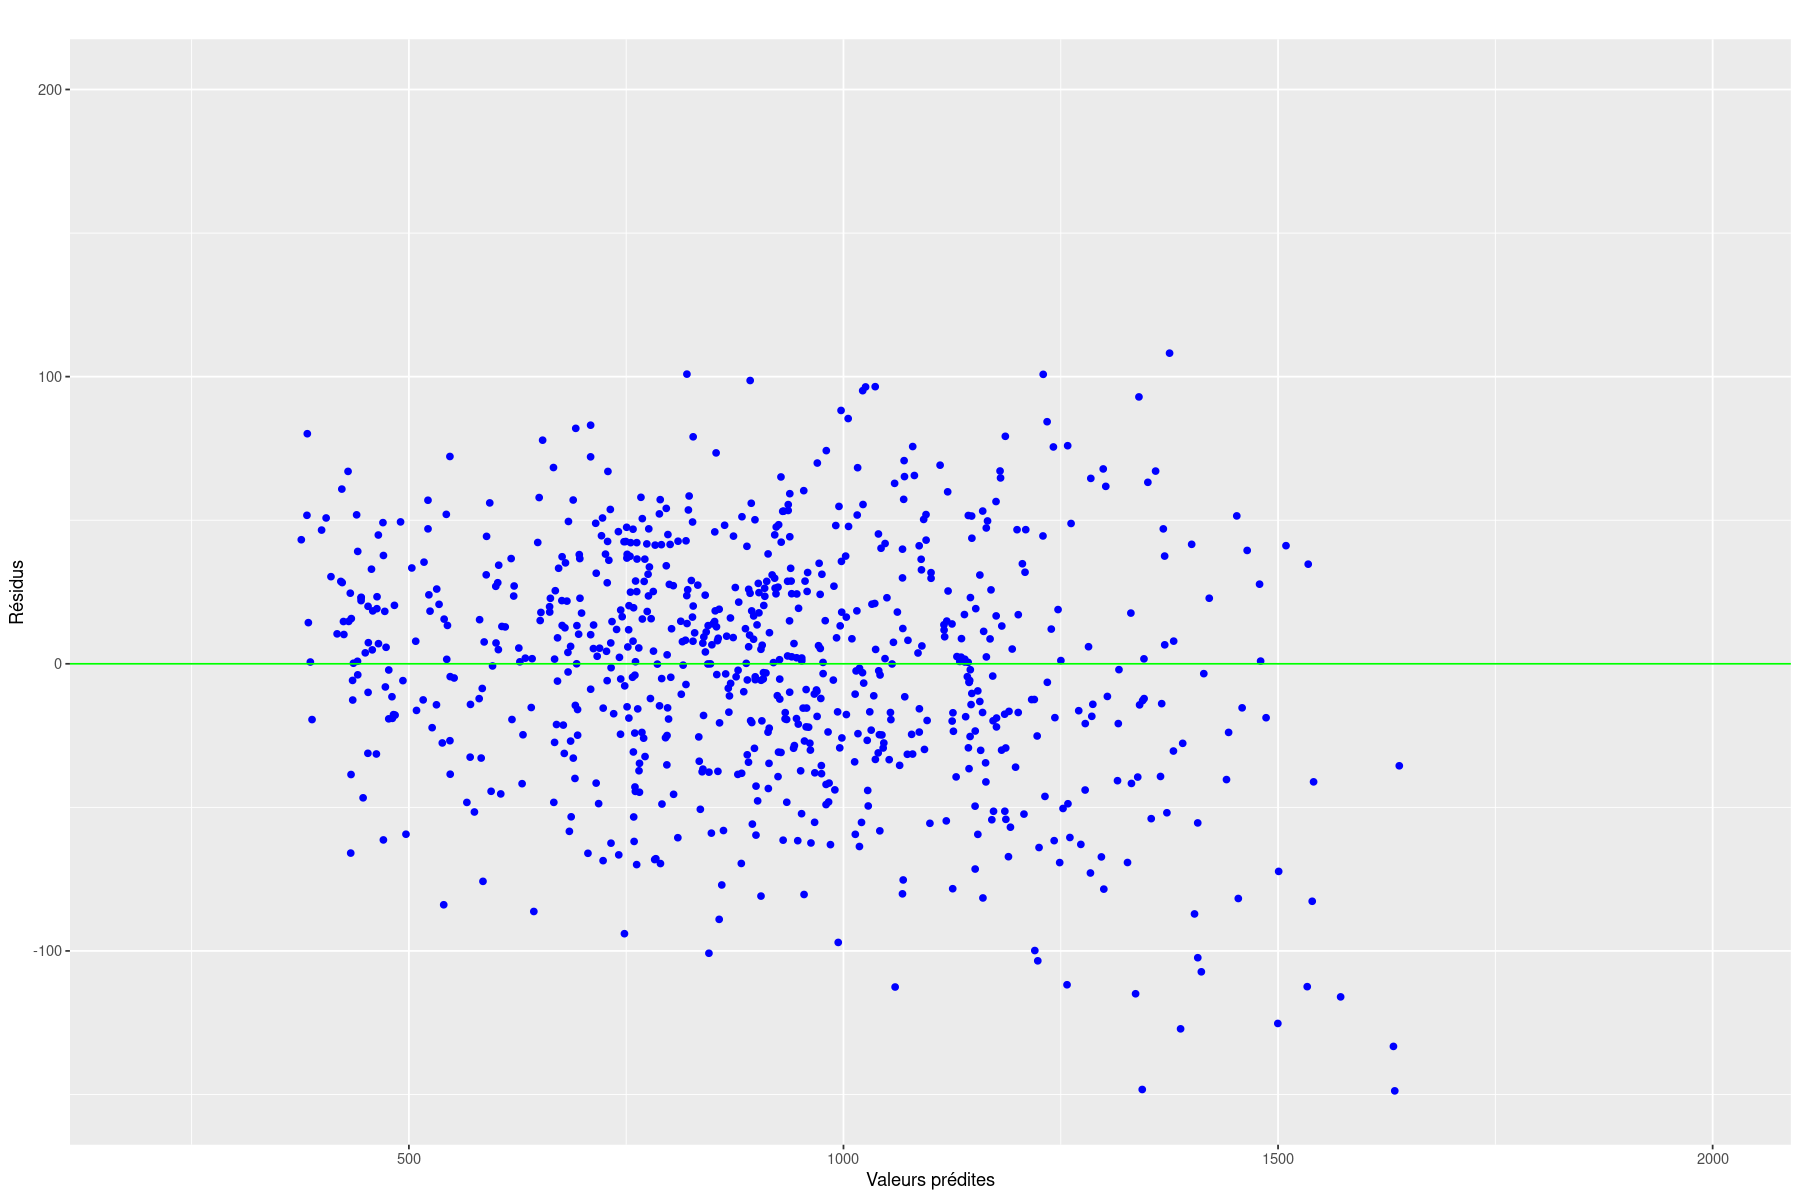

In [55]:
options(repr.plot.width = 15, repr.plot.height = 10)
fit.rfr=rf.reg$predicted
res.rfr=fit.rfr-datappr[,"Calories_Burned"]
gplot.res(fit.rfr,res.rfr,titre="")

In [56]:
sort(round(importance(rf.reg), 2)[,1], decreasing=TRUE)

Avg_BPM  Session_Duration               Age            Gender 
           121.82             70.35             53.23             29.04 
      Weight..kg.      Water_Intake        Height..m.    Fat_Percentage 
            12.97             12.44              9.32              9.21 
 Experience_Level               BMI Workout_Frequency       Resting_BPM 
             7.26              5.99              1.90              1.60 
     Workout_Type           Max_BPM 
             0.56             -2.64

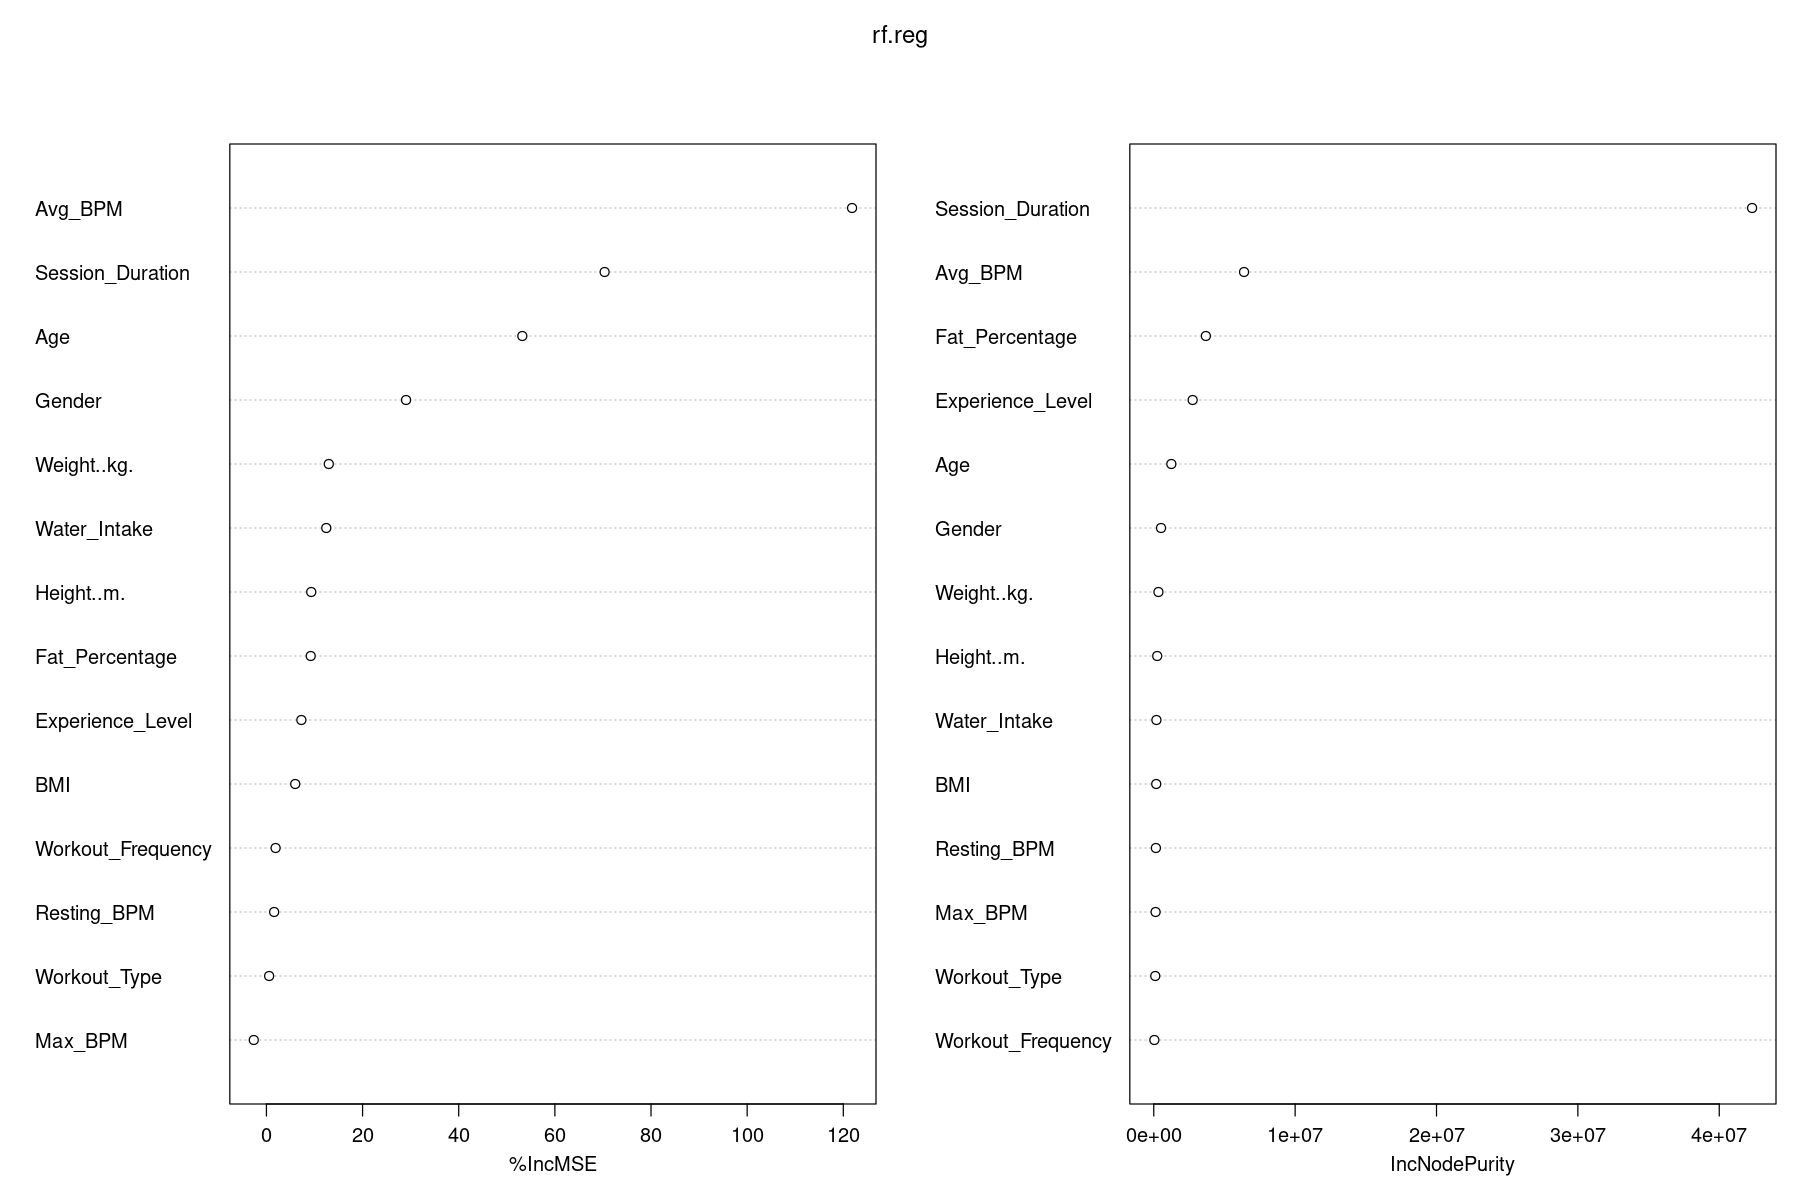

In [57]:
varImpPlot(rf.reg)

### Echantillon Test

In [58]:
# Forêts aléatoires
pred.rfr=rf.reg$test$predicted
# Erreur quadratique moyenne de prévision
sum((pred.rfr-datestr[,"Calories_Burned"])^2)/nrow(datestr)

table(pred.rfr>890,datestr[,"Calories_Burned"]>890)

[1] 1748.304

       
        FALSE TRUE
  FALSE    93    5
  TRUE      9   88

## Boosting

In [59]:

library(gbm)
boost.reg = gbm(Calories_Burned ~ ., data = datappr, distribution = "gaussian", n.trees = 1000, 
    cv.folds = 10, n.minobsinnode = 5, shrinkage = 0.03, verbose = FALSE)

Loaded gbm 2.2.2

This version of gbm is no longer under development. Consider transitioning to gbm3, https://github.com/gbm-developers/gbm3



ERROR: Error in checkForRemoteErrors(val): 10 nodes produced errors; first error: le chargement du package ou de l'espace de noms a échoué pour ‘gbm’ :
.onLoad a échoué dans loadNamespace() pour 'utils', détails :
  appel : system(paste(which, shQuote(names[i])), intern = TRUE, ignore.stderr = TRUE)
  erreur : popen impossible pour '/usr/bin/which 'uname' 2>/dev/null', cause probable : 'Ne peut allouer de la mémoire'


In [ ]:
best.iter=gbm.perf(boost.reg,method="cv")

In [ ]:

fit.boostr=boost.reg$fit
res.boostr=fit.boostr-datappr[,"Calories_Burned"]
mse.boostr <- mean(res.boostr^2)
print(mse.boostr)

### Echantillon Test

In [ ]:
pred.test <- predict(boost.reg, newdata = datestr, n.trees = best.iter)
res.test <- pred.test - datestr$Calories_Burned
mse.test <- mean(res.test^2)
print(mse.test)

## Réseau de neurones

In [ ]:
library(MASS)
library(nnet)

In [ ]:
nnet.reg=nnet(Calories_Burned~.,data=datappr,size=5,decay=1,linout=TRUE,maxit=2000) 

In [ ]:
RN_CV <- tune.nnet(Calories_Burned~.,data=datappr,size=3:9,decay=1:5)

print(RN_CV) 
plot(RN_CV$performances$size, RN_CV$performances$error, type = 'b')

In [ ]:
nnet.reg=nnet(Calories_Burned~.,data=datappr,size=7,decay=1,linout=TRUE,maxit=1000) 

In [ ]:
fit.nnetr=predict(nnet.reg,data=datappr)
res.nnetr=fit.nnetr-datappr[,"Calories_Burned"]
mse.nnetr <- mean(res.nnetr^2)
print(mse.nnetr)
gplot.res(fit.nnetr,res.nnetr,titre="")

In [ ]:
fit.nnetr=predict(nnet.reg,newdata=datestr)
res.nnetr=fit.nnetr-datestr[,"Calories_Burned"]
mse.nnetr <- mean(res.nnetr^2)
print(mse.nnetr)
gplot.res(fit.nnetr,res.nnetr,titre="")

## Comparaison des méthodes de régression

In [ ]:
# Matrice des variables explicatives pour le test
x_test <- model.matrix(Calories_Burned ~ . - 1, data = datestr)

# Prédiction sur l'échantillon de test
pred_lm_t <- predict(reg.lm, newdata = datestr)
pred_aic_t <- predict(reg.glm.aic, newdata = datestr)
pred_bic_t <- predict(reg.glm.bic, newdata = datestr)
pred_lasso_t <- predict(reg.lasso.cv, newx = x_test, s = "lambda.1se")
pred_ridge_t <- predict(regRidgeCV, newx = x_test, s = lambda_opt)
pred_svm_t <- predict(cv_radial, newdata= datestr)
pred_tree_t <- predict(tree.reg, newdata= datestr)
pred_rf_t <- rf.reg$test$predicted
pred_boost_t <- predict(boost.reg, newdata=datestr)
pred_rn_t <- predict(nnet.reg,newdata=datestr)

# Variable cible
y_test <- datestr$Calories_Burned
denom <- sum(y_test^2)  # La  moyenne de y_test est zéro

# Q2 sur test
Q2_lm <- 1 - sum((y_test - pred_lm_t)^2) / denom
Q2_aic <- 1 - sum((y_test - pred_aic_t)^2) / denom
Q2_bic <- 1 - sum((y_test - pred_bic_t)^2) / denom
Q2_lasso <- 1 - sum((y_test - pred_lasso_t)^2) / denom
Q2_ridge <- 1 - sum((y_test - pred_ridge_t)^2) / denom
Q2_svm <- 1 - sum((y_test - pred_svm_t)^2) / denom
Q2_tree <- 1 - sum((y_test - pred_tree_t)^2) / denom
Q2_rf <- 1 -  sum((y_test - pred_rf_t)^2) / denom
Q2_boost <- 1 - sum((y_test - pred_boost_t)^2) / denom
Q2_rn <- 1 - sum((y_test - pred_rn_t)^2) / denom

n <- length(y_test)

# MSE des modèles
mse.lm <- mean((pred_lm_t - y_test)^2)
mse.aic <- mean((pred_aic_t - y_test)^2)
mse.bic <- mean((pred_bic_t - y_test)^2)
mse.lasso <- mean((pred_lasso_t - y_test)^2)
mse.ridge <- mean((pred_ridge_t - y_test)^2)
mse.SVM <- mean((pred_svm_t - y_test)^2)
mse.tree <- mean((pred_tree_t - y_test)^2)
mse.rf <- mean((pred_rf_t - y_test)^2)
mse.boost <- mean((pred_boost_t - y_test)^2)
mse.rn <- mean((pred_rn_t - y_test)^2)

In [ ]:
results <- data.frame(
  Modèle = c("Régression LM", "AIC", "BIC", "Lasso", "Ridge", "SVM", "CART", "RF", "Boost", "RN"),
  Q2=  c(Q2_lm, Q2_aic, Q2_bic, Q2_lasso, Q2_ridge, Q2_svm, Q2_tree, Q2_rf, Q2_boost, Q2_rn),
  MSE = c(mse.lm, mse.aic, mse.bic, mse.lasso, mse.ridge, mse.SVM, mse.tree, mse.rf, mse.boost, mse.rn)
)

# Appliquer round uniquement aux colonnes numériques
results_rounded <- results
results_rounded[, 2:3] <- round(results[, 2:3], 5)

print(results_rounded)

# Prédiction du niveau d'expérience

## Séparation de la base en train/test

In [ ]:
library(fastDummies)
library(dplyr)

In [ ]:
Gym2 <- dummy_cols(Gym, select_columns = "Experience_Level", 
                  remove_first_dummy = FALSE, remove_selected_columns = TRUE)

In [ ]:
set.seed(140) # initialisation du générateur
# Extraction des échantillons
test.ratio <- .2   # part de l'échantillon test
npop <- nrow(Gym) # nombre de lignes dans les données
nvar <- ncol(Gym) # nombre de colonnes
# taille de l'échantillon test
ntest <- ceiling(npop * test.ratio) 
# indices de l'échantillon test
testi <- sample(1:npop, ntest)
# indices de l'échantillon d'apprentissage
appri <- setdiff(1:npop, testi) 

In [ ]:
# construction de l'échantillon d'apprentissage

datapprq0 <- Gym[appri,] 


datappr10 <- Gym2[appri, !(names(Gym2) %in% c("Experience_Level_2", "Experience_Level_3"))]
datappr20 <- Gym2[appri, !(names(Gym2) %in% c("Experience_Level_1", "Experience_Level_3"))]
datappr30 <- Gym2[appri, !(names(Gym2) %in% c("Experience_Level_1", "Experience_Level_2"))]
# construction de l'échantillon test

datestrq0 <- Gym[testi,]
datestr10 <- Gym2[testi,!(names(Gym2) %in% c("Experience_Level_2", "Experience_Level_3"))]
datestr20 <- Gym2[testi,!(names(Gym2) %in% c("Experience_Level_1", "Experience_Level_3"))]
datestr30 <- Gym2[testi,!(names(Gym2) %in% c("Experience_Level_1", "Experience_Level_2"))]

summary(datapprq0)

In [ ]:
datappr1=datappr10
datappr2=datappr20
datappr3=datappr30
datestr1=datestr10
datestr2=datestr20
datestr3=datestr30
datapprq=datapprq0
datestrq=datestrq0

datappr1[,-c(2,9,12,15)]=scale(datappr10[,-c(2,9,12,15)])
datestr1[,-c(2,9,12,15)]=scale(datestr10[,-c(2,9,12,15)],
                            center=sapply(datestr10[,-c(2,9,12,15)],mean), # on centre avec les moyennes de l'échantillon d'apprentissage
                            scale=sapply(datestr10[,-c(2,9,12,15)],sd))




datappr2[,-c(2,9,12,15)]=scale(datappr20[,-c(2,9,12,15)])

# on normalise l'échantillon test 

datestr2[,-c(2,9,12,15)]=scale(datestr20[,-c(2,9,12,15)],
                            center=sapply(datestr20[,-c(2,9,12,15)],mean), # on centre avec les moyennes de l'échantillon d'apprentissage
                            scale=sapply(datestr20[,-c(2,9,12,15)],sd))

datappr3[,-c(2,9,12,15)]=scale(datappr30[,-c(2,9,12,15)])

# on normalise l'échantillon test 
# à l'aide des caractéristiques de l'échantillon d'apprentissage
datestr3[,-c(2,9,12,15)]=scale(datestr30[,-c(2,9,12,15)],
                            center=sapply(datestr30[,-c(2,9,12,15)],mean), # on centre avec les moyennes de l'échantillon d'apprentissage
                            scale=sapply(datestr30[,-c(2,9,12,15)],sd))

datapprq[,-c(2,9,11,13)]=scale(datapprq0[,-c(2,9,11,13)])

# on normalise l'échantillon test 
# à l'aide des caractéristiques de l'échantillon d'apprentissage
datestrq[,-c(2,9,11,13)]=scale(datestrq0[,-c(2,9,11,13)],
                            center=sapply(datestrq0[,-c(2,9,11,13)],mean), # on centre avec les moyennes de l'échantillon d'apprentissage
                            scale=sapply(datestrq0[,-c(2,9,11,13)],sd))

summary(datapprq)
summary(datestrq)

## Modèle linéaire

### Regression logistique

#### Niveau 1 d'Expérience Level

In [ ]:
# estimation du modèle complet
log.lm1 <- glm(Experience_Level_1 ~. , data = datappr1, family = binomial)
summary(log.lm1)$coefficients

# significativité des paramètres
anova(log.lm1, test = "Chisq")

In [ ]:
log.lm.step1 <- step(log.lm1, direction = "backward")

In [ ]:
anova(log.lm.step1, test = "Chisq")

In [ ]:
preds1 <- log.lm1$fitted.values

preds_test1 <- predict(log.lm1, newdata = datestr1, type = "response")

conf_matrix1 <- table(Prediction = preds_test1 > 0.5,
                     Réalité = datestr1$Experience_Level_1)
accuracy_test <- sum(diag(conf_matrix1)) / sum(conf_matrix1)
cat("Matrice de confusion - Échantillon test (seuil 0.5)\n")
print(conf_matrix1)
cat(sprintf("Accuracy test= %.2f%%\n", accuracy_test * 100))

DEMANDER SUR QUOI FAIRE LA MATRICE DE VALIDATION

In [ ]:
Xb1_train_mat <- model.matrix(Experience_Level_1 ~ . , data = datappr1)[, -1]  # enlever l’intercept
Y1_train_vec <- datappr1$Experience_Level_1
cv_lasso <- cv.glmnet(Xb1_train_mat, Y1_train_vec, family = "binomial", alpha = 1)
coef_lasso <- coef(cv_lasso, s = "lambda.min")

as.matrix(coef_lasso)

# Convertir en data frame
df_coef <- as.data.frame(as.matrix(coef_lasso))
df_coef$Variable <- rownames(df_coef)
colnames(df_coef)[1] <- "Coefficient"

# Supprimer les coefficients nuls
df_coef <- subset(df_coef, Coefficient != 0)
ggplot(df_coef, aes(x = reorder(Variable, Coefficient), y = Coefficient)) +
  geom_bar(stat = "identity") +
  coord_flip() +
  labs(title = "Coefficients du modèle Lasso (niveau 1)",
       x = "Variables",
       y = "Coefficient") +
  theme_minimal()


#### Niveau 2 d'Expérience Level

In [ ]:
# estimation du modèle complet
log.lm2 <- glm(Experience_Level_2 ~. , data = datappr2, family = binomial)
summary(log.lm2)$coefficients

# significativité des paramètres
anova(log.lm2, test = "Chisq")

In [ ]:
log.lm.step2 <- step(log.lm2, direction = "backward")

In [ ]:
anova(log.lm.step2, test = "Chisq")

In [ ]:
preds_test2 <- predict(log.lm2 , newdata = datestr2, type = "response")

conf_matrix2 <- table(Prediction = preds_test2 > 0.5,
                     Réalité = datestr2$Experience_Level_2)
accuracy_test <- sum(diag(conf_matrix2)) / sum(conf_matrix2)
cat("Matrice de confusion - Échantillon test (seuil 0.5)\n")
print(conf_matrix2)
cat(sprintf("Accuracy test= %.2f%%\n", accuracy_test * 100))

In [ ]:
Xb2_train_mat <- model.matrix(Experience_Level_2 ~ . , data = datappr2)[, -1]  # enlever l’intercept
Y2_train_vec <- datappr2$Experience_Level_2
cv_lasso2 <- cv.glmnet(Xb2_train_mat, Y2_train_vec, family = "binomial", alpha = 1)
coef_lasso2 <- coef(cv_lasso2, s = "lambda.min")

as.matrix(coef_lasso2)

# Convertir en data frame
df_coef2 <- as.data.frame(as.matrix(coef_lasso2))
df_coef2$Variable <- rownames(df_coef2)
colnames(df_coef2)[1] <- "Coefficient"

# Supprimer les coefficients nuls
df_coef2 <- subset(df_coef2, Coefficient != 0)
ggplot(df_coef2, aes(x = reorder(Variable, Coefficient), y = Coefficient)) +
  geom_bar(stat = "identity") +
  coord_flip() +
  labs(title = "Coefficients du modèle Lasso (niveau 2)",
       x = "Variables",
       y = "Coefficient") +
  theme_minimal()

#### Niveau 3 d'Experience Level

In [ ]:

install.packages("brglm")
library(brglm)
# Ajustement avec la méthode de biais réduits pour gérer la séparation
log.lm3_br <- brglm(Experience_Level_3 ~ ., data = datappr3, family = binomial)
summary(log.lm3_br)

log.lm3 <- glm(Experience_Level_3 ~ ., data = datappr3, family = binomial)
log.lm3 <- glm(Experience_Level_3 ~ ., data = datappr3, family = binomial)
log.lm.step3 <- step(log.lm3, direction = "backward")

In [ ]:
log.lm.step3 <- step(log.lm3, direction = "backward")

In [ ]:
preds_test3 <- predict(log.lm3, newdata = datestr3, type = "response")

conf_matrix3 <- table(Prediction = preds_test3 > 0.5,
                     Réalité = datestr3$Experience_Level_3)
accuracy_test <- sum(diag(conf_matrix3)) / sum(conf_matrix3)
cat("Matrice de confusion - Échantillon test (seuil 0.5)\n")
print(conf_matrix3)
cat(sprintf("Accuracy test= %.2f%%\n", accuracy_test * 100))

In [ ]:
Xb3_train_mat <- model.matrix(Experience_Level_3 ~ . , data = datappr3)[, -1]  # enlever l’intercept
Y3_train_vec <- datappr3$Experience_Level_3
cv_lasso3 <- cv.glmnet(Xb3_train_mat, Y3_train_vec, family = "binomial", alpha = 1)
coef_lasso3 <- coef(cv_lasso3, s = "lambda.min")

as.matrix(coef_lasso3)

# Convertir en data frame
df_coef3 <- as.data.frame(as.matrix(coef_lasso3))
df_coef3$Variable <- rownames(df_coef3)
colnames(df_coef3)[1] <- "Coefficient"

# Supprimer les coefficients nuls
#df_coef3 <- subset(df_coef3, Coefficient != 0)
ggplot(df_coef3, aes(x = reorder(Variable, Coefficient), y = Coefficient)) +
  geom_bar(stat = "identity") +
  coord_flip() +
  labs(title = "Coefficients du modèle Lasso (niveau 3)",
       x = "Variables",
       y = "Coefficient") +
  theme_minimal()

#### Comparaison des trois niveaux d'expérience

In [ ]:
extract_coef_df <- function(data, response_var, level_label) {
  X_mat <- model.matrix(as.formula(paste(response_var, "~ .")), data = data)[, -1]
  Y_vec <- data[[response_var]]
  cv_lasso <- cv.glmnet(X_mat, Y_vec, family = "binomial", alpha = 1)
  coef_lasso <- coef(cv_lasso, s = "lambda.min")
  
  df <- as.data.frame(as.matrix(coef_lasso))
  df$Variable <- rownames(df)
  colnames(df)[1] <- "Coefficient"
  df$Level <- level_label
  return(df)
}


df_coef1 <- extract_coef_df(datappr1, "Experience_Level_1", "Niveau 1")
df_coef2 <- extract_coef_df(datappr2, "Experience_Level_2", "Niveau 2")
df_coef3 <- extract_coef_df(datappr3, "Experience_Level_3", "Niveau 3")

# Combiner en un seul data frame
df_all <- rbind(df_coef1, df_coef2, df_coef3)

# Pour éviter que la variable 'Variable' soit réordonnée différemment dans chaque facette, on fixe un ordre global :
library(dplyr)
var_order <- df_all %>%
  group_by(Variable) %>%
  summarize(med_coef = median(Coefficient)) %>%
  arrange(med_coef) %>%
  pull(Variable)

df_all$Variable <- factor(df_all$Variable, levels = var_order)

# Plot avec facettes côte à côte
ggplot(df_all, aes(x = Variable, y = Coefficient, fill = Level)) +
  geom_bar(stat = "identity") +
  coord_flip() +
  facet_wrap(~ Level, scales = "free_y") +  # un graphique par niveau, échelles y indépendantes
  labs(title = "Coefficients du modèle Lasso par niveau d'expérience",
       x = "Variables",
       y = "Coefficient") +
  theme_minimal() +
  theme(legend.position = "none")


In [ ]:
pred1 <- predict(log.lm1, type = "response")
pred2 <- predict(log.lm2, type = "response")
pred3 <- predict(log.lm3, type = "response")

# Les vraies classes
true1 <- datappr1$Experience_Level_1
true2 <- datappr2$Experience_Level_2
true3 <- datappr3$Experience_Level_3

# Calcul des objets ROC
roc1 <- roc(true1, pred1)
roc2 <- roc(true2, pred2)
roc3 <- roc(true3, pred3)

# Tracer les 3 courbes ROC sur un même graphique
plot(roc1, col = "blue", lwd = 2, main = "Courbes ROC des 3 niveaux d'expérience")
plot(roc2, col = "red", lwd = 2, add = TRUE)
plot(roc3, col = "green", lwd = 2, add = TRUE)

legend("bottomright",
       legend = c("Niveau 1", "Niveau 2", "Niveau 3"),
       col = c("blue", "red", "green"),
       lwd = 2)

## SVR/SVM

In [ ]:
svm.dis.tune = tune.svm(Experience_Level ~ ., data = datapprq, cost = c(1,1.25,1.5,1.75,2.25,2.5,3), 
    gamma = seq(0.01, 0.1, by = 0.02))
print(svm.dis.tune) 

In [ ]:
best_cost <- svm.dis.tune$best.parameters$cost
best_gamma <- svm.dis.tune$best.parameters$gamma
# Entraînement du modèle final avec ces paramètres
final_model <- svm(
  Experience_Level ~ ., 
  data = datapprq,
  kernel = "polynomial",     
  cost = best_cost,
  gamma = best_gamma
)

final_model2 <- svm(
  Experience_Level ~ ., 
  data = datapprq,
  kernel = "linear",     
  cost = best_cost,
  gamma = best_gamma
)

final_model3 <- svm(
  Experience_Level ~ ., 
  data = datapprq,
  kernel = "radial",     
  cost = best_cost,
  gamma = best_gamma,
  probability = TRUE
)

#svm.reg.tune = tune.svm(Calories_Burned~., data = datappr, kernel = c("linear","polynomial", "radial"), cost=svm.reg.tune$best.parameters$cost, gamma = svm.reg.tune$best.parameters$gamma)
#best_ker <- svm.reg.tune$best.parameters$kernel
# Prédiction sur le jeu de test
y_pred <- predict(final_model, newdata = datestrq)
y_pred2 <- predict(final_model2, newdata = datestrq)
y_pred3 <- predict(final_model3, newdata = datestrq)
plot(datestrq$Experience_Level, y_pred,
     xlab = "Vraies valeurs",
     ylab = "Prédictions SVM",
     main = "Prédictions vs Réel avec un kernel polynomial")

plot(datestrq$Experience_Level, y_pred2,
     xlab = "Vraies valeurs",
     ylab = "Prédictions SVM",
     main = "Prédictions vs Réel avec un kernel linéaire")

plot(datestrq$Experience_Level, y_pred3,
     xlab = "Vraies valeurs",
     ylab = "Prédictions SVM",
     main = "Prédictions vs Réel avec un kernel radial")



## Arbre optimal CART

In [ ]:
tree.dis=rpart(Experience_Level~.,data=datapprq, method = "class",parms=list(split="information"),cp=0.001)

rpart.plot(tree.dis) 


In [ ]:
xmat = xpred.rpart(tree.dis)

xerr=datapprq$Experience_Level != xmat

CVerr=apply(xerr, 2, sum)/nrow(xerr)
CVerr

In [ ]:
tree.dis=rpart(Experience_Level~.,data=datapprq,parms=list(split="information"),cp=as.numeric(attributes(which.min(CVerr))$names))
rpart.plot(tree.dis,type=4, box.palette = "Blues")

## Forêt aléatoire

In [ ]:
rf.dis=randomForest(Experience_Level~.,data=datapprq ,xtest=datestrq[,-11],ytest=datestrq[,
   "Experience_Level"],ntree=500,do.trace=50,importance=TRUE)
rf.dis$importance

In [ ]:
rf.dis.tune1=tune.randomForest(Experience_Level~., 
                              data = datapprq,ntrees = 200, mtry = c(2,4,6,8,10),
                              maxit =200, linout = TRUE) 
print(rf.dis.tune1)
plot(rf.dis.tune1$performances$mtry, rf.dis.tune1$performances$error, type = 'b')

In [ ]:
rf.dis.tune2=tune.randomForest(Experience_Level~., 
                              data = datapprq,ntrees = 300, mtry = c(2,4,6,8,10),
                              maxit =200, linout = TRUE) 
print(rf.dis.tune2)
plot(rf.dis.tune2$performances$mtry, rf.dis.tune2$performances$error, type = 'b')

In [ ]:
rf.dis.tune3=tune.randomForest(Experience_Level~., 
                              data = datapprq,ntrees = 400, mtry = c(2,4,6,8,10),
                              maxit =200, linout = TRUE) 
print(rf.dis.tune3)
plot(rf.dis.tune3$performances$mtry, rf.dis.tune3$performances$error, type = 'b')

In [ ]:
rf.dis=randomForest(Experience_Level~.,data=datapprq ,xtest=datestrq[,-11],ytest=datestrq[,
   "Experience_Level"],ntree=300,do.trace=50,importance=TRUE, mtry = 6)
rf.dis$importance

## Boosting

In [ ]:
datapprq2=datapprq
#datapprq2[,"Experience_Level"]=as.numeric(datapprq[,"Experience_Level"])-1

datapprq2$Experience_Level <- as.factor(datapprq$Experience_Level)
boost.dis=gbm(Experience_Level~.,data=datapprq2,distribution="multinomial",n.trees=500, cv.folds=10,
              n.minobsinnode = 5,shrinkage=0.03,verbose=FALSE)
plot(boost.dis$cv.error,type="l")

In [ ]:
# nombre optimal d'itérations 
best.ited=gbm.perf(boost.dis,method="cv")

## Réseaux de neurones

In [ ]:
# apprentissage
nnet.dis=nnet(Experience_Level~.,data=datapprq,size=5,decay=0) 

In [ ]:
plot(tune.nnet(Experience_Level~.,data=datapprq,size=c(3,4,5),decay=c(0,1,2),maxit=200,linout=FALSE))

In [ ]:
nnet.dis=nnet(Experience_Level~.,data=datapprq,size=5,decay=1) 

In [ ]:
pred.nnetq=predict(nnet.dis,newdata=datestrq) 

## Comparaison des méthodes de discimination

### Courbes ROC

In [ ]:
# Matrice des variables explicatives pour le test
x_test <- model.matrix(Experience_Level ~ . - 1, data = datestrq)

# Prédiction sur l'échantillon de test
pred_lg1_t <- predict(log.lm1, newdata = datestrq,type = "response" )
pred_lg2_t <- predict(log.lm2, newdata = datestrq, type = "response")
pred_lg3_t <- predict(log.lm3, newdata = datestrq, type = "response")
pred_svmq_t <- predict(final_model3, newdata = datestrq, probability = TRUE)
prob_svm_t <- attr(pred_svmq_t, "probabilities")
pred_treeq_t <- predict(tree.dis, newdata = datestrq,type = "prob")
pred_rfq_t <- rf.dis$test$votes
pred_boostq_t <- predict(boost.dis, newdata=datestrq,type = "response")
pred_rnq_t <- predict(nnet.dis,newdata=datestrq, type = "raw")

pred_boostq_t <- as.data.frame(pred_boostq_t)
colnames(pred_boostq_t) <- c("1", "2", "3") 

In [ ]:



true_labels <- datestrq$Experience_Level

y_true_bin <- ifelse(true_labels == "1", 1, 0)

# Récupérer les probabilités des méthodes pour la classe 1 (adapter noms objets)
probas_logit <- pred_lg1_t               # vecteur, probas classe 1 (logistic regression)
probas_boost<- pred_boostq_t[, "1"]    # data frame ou matrix
probas_tree <- pred_treeq_t[, "1"]
probas_rf <- pred_rfq_t[, "1"]
probas_svm <- prob_svm_t[, "1"]
probas_nn <- pred_rnq_t[, "1"]


# Générer objets prediction pour ROCR
pred_logit <- prediction(probas_logit, y_true_bin)
pred_boost <- prediction(probas_boost, y_true_bin)
pred_tree <- prediction(probas_tree, y_true_bin)
pred_rf<- prediction(probas_rf, y_true_bin)
pred_svm <- prediction(probas_svm, y_true_bin)
pred_nn <- prediction(probas_nn, y_true_bin)



# Calculer performance (TPR vs FPR)
perf_logit <- performance(pred_logit, "tpr", "fpr")
perf_boost <- performance(pred_boost, "tpr", "fpr")
perf_tree <- performance(pred_tree, "tpr", "fpr")
perf_rf <- performance(pred_rf, "tpr", "fpr")
perf_svm <- performance(pred_svm, "tpr", "fpr")
perf_nn <- performance(pred_nn, "tpr", "fpr")


# Tracer les courbes ROC superposées
plot(perf_logit, col="blue", lwd=2, main="ROC Classe 1 - Comparaison méthodes")
plot(perf_boost, col="orange", lwd=2, lty=2, add=TRUE)
plot(perf_tree, col="green", lwd=2, lty=3, add=TRUE)
plot(perf_rf, col="red", lwd=2, lty=4, add=TRUE)
plot(perf_svm, col="purple", lwd=2, lty=5, add=TRUE)
plot(perf_nn, col="brown", lwd=2, lty=6, add=TRUE)


auc_lg1 <- performance(pred_logit, measure = "auc")@y.values[[1]]
auc_boost <- performance(pred_boost, measure = "auc")@y.values[[1]]
auc_tree <- performance(pred_tree, measure = "auc")@y.values[[1]]
auc_rf <- performance(pred_rf, measure = "auc")@y.values[[1]]
auc_svm <- performance(pred_svm, measure = "auc")@y.values[[1]]
auc_nn <- performance(pred_nn, measure = "auc")@y.values[[1]]


# Légende avec AUC
legend("bottomright", legend = c(
  paste0("LogReg (AUC=", round(auc_lg1,3), ")"),
  paste0("Boosting (AUC=", round(auc_boost,3), ")"),
  paste0("Tree (AUC=", round(auc_tree,3), ")"),
  paste0("RandomForest (AUC=", round(auc_rf,3), ")"),
  paste0("SVM (AUC=", round(auc_svm,3), ")"),
  paste0("Réseau de Neurones (AUC=", round(auc_nn,3), ")")
), 
       col = c("blue", "red", "green", "purple", "orange", "brown"),
lty = c(1,2,3,4,5,6), lwd=2, cex=0.8)


In [ ]:
y_true_bin2 <- ifelse(datestrq$Experience_Level == "2", 1, 0)

# Exemple (à remplacer par tes vrais objets)
# Logistic Regression (one-vs-all pour classe 2)
pred_lg2_t <- pred_lg2_t

# Boosting (probas pour classe 2)
pred_boost2 <- pred_boostq_t[, "2"]  # si pred_boostq_t est un data.frame avec colonnes "1","2","3"

# Decision Tree
pred_tree2 <- pred_treeq_t[, "2"]

# Random Forest
pred_rf2 <- pred_rfq_t[, "2"]

# SVM
pred_svm2 <- prob_svm_t[, "2"]

# Neural Net
pred_nn2 <- pred_rnq_t[, "2"]

# 3. Créer les objets prediction et performance ROCR pour chaque modèle
pred_lg2 <- prediction(pred_lg2_t, y_true_bin2)
perf_lg2 <- performance(pred_lg2, "tpr", "fpr")

pred_boost <- prediction(pred_boost2, y_true_bin2)
perf_boost <- performance(pred_boost, "tpr", "fpr")

pred_tree <- prediction(pred_tree2, y_true_bin2)
perf_tree <- performance(pred_tree, "tpr", "fpr")

pred_rf <- prediction(pred_rf2, y_true_bin2)
perf_rf <- performance(pred_rf, "tpr", "fpr")

pred_svm <- prediction(pred_svm2, y_true_bin2)
perf_svm <- performance(pred_svm, "tpr", "fpr")

pred_nn <- prediction(pred_nn2, y_true_bin2)
perf_nn <- performance(pred_nn, "tpr", "fpr")

# 4. Tracer toutes les courbes ROC sur le même graphique
plot(perf_lg2, col="blue", lwd=2, main="Courbes ROC - Classe 2", xlim=c(0,1), ylim=c(0,1))
plot(perf_boost, col="red", lwd=2, lty=2, add=TRUE)
plot(perf_tree, col="green", lwd=2, lty=3, add=TRUE)
plot(perf_rf, col="purple", lwd=2, lty=4, add=TRUE)
plot(perf_svm, col="orange", lwd=2, lty=5, add=TRUE)
plot(perf_nn, col="brown", lwd=2, lty=6, add=TRUE)

# 5. Ajouter une diagonale référence
abline(a=0, b=1, lty=2, col="gray")

# 6. Ajouter la légende avec AUCs
auc_lg2 <- performance(pred_lg2, measure = "auc")@y.values[[1]]
auc_boost <- performance(pred_boost, measure = "auc")@y.values[[1]]
auc_tree <- performance(pred_tree, measure = "auc")@y.values[[1]]
auc_rf <- performance(pred_rf, measure = "auc")@y.values[[1]]
auc_svm <- performance(pred_svm, measure = "auc")@y.values[[1]]
auc_nn <- performance(pred_nn, measure = "auc")@y.values[[1]]

legend("bottomright", legend = c(
  paste0("LogReg (AUC=", round(auc_lg2,3), ")"),
  paste0("Boosting (AUC=", round(auc_boost,3), ")"),
  paste0("Tree (AUC=", round(auc_tree,3), ")"),
  paste0("RandomForest (AUC=", round(auc_rf,3), ")"),
  paste0("SVM (AUC=", round(auc_svm,3), ")"),
  paste0("NeuralNet (AUC=", round(auc_nn,3), ")")
), col = c("blue", "red", "green", "purple", "orange", "brown"),
lty = c(1,2,3,4,5,6), lwd=2, cex=0.8)

In [ ]:
y_true_bin3 <- ifelse(datestrq$Experience_Level == "3", 1, 0)

# Récupération des scores/probas pour la classe 3
pred_lg3_t <- pred_lg3_t 
pred_boost3 <- pred_boostq_t[, "3"]
pred_tree3 <- pred_treeq_t[, "3"]
pred_rf3 <- pred_rfq_t[, "3"]
pred_svm3 <- prob_svm_t[, "3"]
pred_nn3 <- pred_rnq_t[, "3"]

# Création des objets prediction/performance pour ROCR
pred_lg3 <- prediction(pred_lg3_t, y_true_bin3)
perf_lg3 <- performance(pred_lg3, "tpr", "fpr")

pred_boost <- prediction(pred_boost3, y_true_bin3)
perf_boost <- performance(pred_boost, "tpr", "fpr")

pred_tree <- prediction(pred_tree3, y_true_bin3)
perf_tree <- performance(pred_tree, "tpr", "fpr")

pred_rf <- prediction(pred_rf3, y_true_bin3)
perf_rf <- performance(pred_rf, "tpr", "fpr")

pred_svm <- prediction(pred_svm3, y_true_bin3)
perf_svm <- performance(pred_svm, "tpr", "fpr")

pred_nn <- prediction(pred_nn3, y_true_bin3)
perf_nn <- performance(pred_nn, "tpr", "fpr")



# Tracer toutes les courbes ROC sur le même plot
plot(perf_lg3, col="blue", lwd=2, main="Courbes ROC - Classe 3", xlim=c(0,1), ylim=c(0,1))
plot(perf_boost, col="red", lwd=2, lty=2, add=TRUE)
plot(perf_tree, col="green", lwd=2, lty=3, add=TRUE)
plot(perf_rf, col="purple", lwd=2, lty=4, add=TRUE)
plot(perf_svm, col="orange", lwd=2, lty=5, add=TRUE)
plot(perf_nn, col="brown", lwd=2, lty=6, add=TRUE)


# Diagonale référence
abline(a=0, b=1, lty=2, col="gray")

# Calcul des AUCs
auc_lg3 <- performance(pred_lg3, measure = "auc")@y.values[[1]]
auc_boost <- performance(pred_boost, measure = "auc")@y.values[[1]]
auc_tree <- performance(pred_tree, measure = "auc")@y.values[[1]]
auc_rf <- performance(pred_rf, measure = "auc")@y.values[[1]]
auc_svm <- performance(pred_svm, measure = "auc")@y.values[[1]]
auc_nn <- performance(pred_nn, measure = "auc")@y.values[[1]]


# Légende avec AUC
legend("bottomright", legend = c(
  paste0("LogReg (AUC=", round(auc_lg3,3), ")"),
  paste0("Boosting (AUC=", round(auc_boost,3), ")"),
  paste0("Tree (AUC=", round(auc_tree,3), ")"),
  paste0("RandomForest (AUC=", round(auc_rf,3), ")"),
  paste0("SVM (AUC=", round(auc_svm,3), ")"),
  paste0("Réseau de Neurones (AUC=", round(auc_nn,3), ")")
), col = c("blue", "red", "green", "purple", "orange", "brown", "black"),
lty = c(1,2,3,4,5,6), lwd=2, cex=0.8)


In [ ]:

par(mfrow = c(1, 3), mar = c(4,4,3,1))  # 1 ligne, 3 colonnes

# Fonction pour tracer ROC pour une classe donnée
plot_roc_class <- function(class_label, color_list) {
  y_true_bin <- ifelse(datestrq$Experience_Level == class_label, 1, 0)
  
  # Prédictions probas pour la classe donnée (tu peux adapter si besoin)
  pred_lg <- prediction(predict(get(paste0("log.lm", class_label)), newdata = datestrq, type = "response"), y_true_bin)
  perf_lg <- performance(pred_lg, "tpr", "fpr")
  
  pred_boost <- prediction(pred_boostq_t[, class_label], y_true_bin)
  perf_boost <- performance(pred_boost, "tpr", "fpr")
  
  pred_tree <- prediction(pred_treeq_t[, class_label], y_true_bin)
  perf_tree <- performance(pred_tree, "tpr", "fpr")
  
  pred_rf <- prediction(pred_rfq_t[, class_label], y_true_bin)
  perf_rf <- performance(pred_rf, "tpr", "fpr")
  
  pred_svm <- prediction(prob_svm_t[, class_label], y_true_bin)
  perf_svm <- performance(pred_svm, "tpr", "fpr")
  
  pred_nn <- prediction(pred_rnq_t[, class_label], y_true_bin)
  perf_nn <- performance(pred_nn, "tpr", "fpr")
  
  plot(perf_lg, col = color_list[1], lwd = 2, main = paste("ROC - Classe", class_label), xlim = c(0,1), ylim = c(0,1))
  plot(perf_boost, col = color_list[2], lwd = 2, lty = 2, add = TRUE)
  plot(perf_tree, col = color_list[3], lwd = 2, lty = 3, add = TRUE)
  plot(perf_rf, col = color_list[4], lwd = 2, lty = 4, add = TRUE)
  plot(perf_svm, col = color_list[5], lwd = 2, lty = 5, add = TRUE)
  plot(perf_nn, col = color_list[6], lwd = 2, lty = 6, add = TRUE)
  
  abline(a = 0, b = 1, lty = 2, col = "gray")
  
  legend("bottomright", legend = c("LogReg", "Boost", "Tree", "RandomForest", "SVM", "NeuralNet"),
         col = color_list, lty = 1:6, lwd = 2, cex = 0.7, bty = "n")
}

# Palette de couleurs
colors <- c("blue", "red", "green", "purple", "orange", "brown")

# Affichage des 3 graphiques côte à côte
plot_roc_class("1", colors)
plot_roc_class("2", colors)
plot_roc_class("3", colors)

# Remettre par défaut
par(mfrow = c(1,1))

### Accuracy des modèles

In [ ]:
pred_lg1_t <- predict(log.lm1, newdata = datestrq)
pred_lg2_t <- predict(log.lm2, newdata = datestrq)
pred_lg3_t <- predict(log.lm3, newdata = datestrq)
pred_logit <- data.frame("1" = pred_lg1_t, "2" = pred_lg2_t, "3" = pred_lg3_t)

# Prédiction finale = classe avec la proba max
pred_class_logit <- apply(pred_logit, 1, function(x) which.max(x))
preb_svmq_t <- predict(final_model3, newdata = datestrq)
pred_treeq_t <- predict(tree.dis, newdata = datestrq,type = "class")
pred_rfq_t <- rf.dis$test$predicted
pred_boostq_t <- predict(boost.dis, newdata=datestrq, n.trees = 184,type = "response")
pred_rnq_t <- predict(nnet.dis,newdata=datestrq, type = "class")

# pour le boosting, il faut récuperer la deuxièeme colonne de la matrice (indice 1) qui contient les nombres d'individus par classes
pred_matrix <- pred_boostq_t [, , 1]
max_indices <- apply(pred_matrix, 1, which.max)
pred_boost <- colnames(pred_matrix)[max_indices]
pred_boost <- factor(pred_boost, levels = levels(datestrq$Experience_Level))


acc_logit <- mean(pred_class_logit == datestrq$Experience_Level)
acc_boost <- mean(pred_boost == datestrq$Experience_Level)
acc_tree  <- mean(pred_treeq_t == datestrq$Experience_Level)
acc_rf    <- mean(pred_rfq_t == datestrq$Experience_Level)
acc_svm   <- mean(pred_svmq_t == datestrq$Experience_Level)
acc_rn    <- mean(pred_rnq_t == datestrq$Experience_Level)
                       
acc_df <- data.frame(
  Model = c("Logistic Regression", "Boosting", "Decision Tree", "Random Forest", "SVM", "Réseau de Neurones"),
  Accuracy = c(acc_logit, acc_boost, acc_tree, acc_rf, acc_svm, acc_rn)
)
print(acc_df)